In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

dataPath = "datasets/Crime_Data_from_2020_to_Present_20240305.csv"
data = pd.read_csv('../crime-2020.csv')
data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

## We keep only interesting columns for our analysis

In [32]:
df = data[['DATE OCC', 'TIME OCC', 'AREA', 'Crm Cd','Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Weapon Used Cd']]
# Define new column names   
new_columns = ['date occ', 'time', 'area', 'crm_cd', 'vict_age', 'vict_sex', 'vict_descent', 'premis_cd', 'weapon']
# Assign the new column names to the DataFrame
df.columns = new_columns
df.head(2)

date occ  time  area  crm_cd  vict_age vict_sex vict_descent  \
0  03/01/2020 12:00:00 AM  2130     7     510         0        M            O   
1  02/08/2020 12:00:00 AM  1800     1     330        47        M            O   

   premis_cd  weapon  
0      101.0     NaN  
1      128.0     NaN

## Checking missing values in columns

In [33]:
def cat_stats(df):
    # df = data.copy()
    ds_cat_stats = pd.DataFrame(columns = ['column', 'values', 'values_count_incna', 'values_count_nona',
                                        'num_miss', 'pct_miss'])
    tmp = pd.DataFrame()

    for c in df.columns:
        tmp['column'] = [c]
        if isinstance(df[c].iloc[0], (int, float, complex)):
            values = df[c].fillna(-777).unique()
        else:
            values = df[c].fillna('NaN').unique()
        tmp['values'] = [values]
        tmp['values_count_incna'] = len(list(df[c].unique()))
        tmp['values_count_nona'] = int(df[c].nunique())
        tmp['num_miss'] = df[c].isnull().sum()
        tmp['pct_miss'] = (df[c].isnull().sum()/ len(df)).round(3)*100
        ds_cat_stats = pd.concat([ds_cat_stats, tmp])

    ds_cat_stats.sort_values(by = 'values_count_incna', inplace = True, ascending = True)

    # And set the index to Column Names
    ds_cat_stats.set_index('column', inplace = True)
    return ds_cat_stats

cat_stats(df)

/var/folders/zz/217zyxw90hlg93r9zynpgy6h0000gn/T/ipykernel_46850/2839513803.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ds_cat_stats = pd.concat([ds_cat_stats, tmp])


values  \
column                                                            
vict_sex                                   [M, X, F, NaN, H, -]   
area          [7, 1, 3, 9, 6, 18, 13, 19, 2, 10, 8, 20, 4, 2...   
vict_descent  [O, X, H, B, W, NaN, A, C, K, J, F, I, V, S, P...   
weapon        [-777.0, 400.0, 307.0, 500.0, 511.0, 301.0, 10...   
vict_age      [0, 47, 19, 28, 41, 25, 27, 24, 26, 8, 7, 13, ...   
crm_cd        [510, 330, 480, 343, 354, 624, 821, 812, 810, ...   
premis_cd     [101.0, 128.0, 502.0, 405.0, 102.0, 501.0, 248...   
time          [2130, 1800, 1700, 2037, 1200, 2300, 900, 1110...   
date occ      [03/01/2020 12:00:00 AM, 02/08/2020 12:00:00 A...   

             values_count_incna values_count_nona num_miss  pct_miss  
column                                                                
vict_sex                      6                 5   121035      13.3  
area                         21                21        0       0.0  
vict_descent                 21                20   121044      13.3  
weapon                       80                79   595460      65.4  
vict_age                    104               104        0       0.0  
crm_cd                      139               139        0       0.0  
premis_cd                   315               314       10       0.0  
time                       1439              1439        0       0.0  
date occ                   1525              1525        0       0.0

### Imputing wrong and missing values for Vict Sex and Vict Descent
We have a value 'X' for unknown values in both columns

In [34]:
descents = ["A", "B", "C", "D", "F", "G", "H", "I", "J", "K", "L", "O","P", "S", "U", "V", "W", "Z"]
df.loc[~df['vict_descent'].isin(descents), 'vict_descent'] = np.nan
df['vict_descent'] = df['vict_descent'].fillna('X')

sex_list = ['F', 'M']
df.loc[~df['vict_sex'].isin(sex_list), 'vict_sex'] = np.nan
df['vict_sex'] = df['vict_sex'].fillna('X')

cat_stats(df)

/var/folders/zz/217zyxw90hlg93r9zynpgy6h0000gn/T/ipykernel_46850/2414267582.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vict_descent'] = df['vict_descent'].fillna('X')
/var/folders/zz/217zyxw90hlg93r9zynpgy6h0000gn/T/ipykernel_46850/2414267582.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vict_sex'] = df['vict_sex'].fillna('X')
/var/folders/zz/217zyxw90hlg93r9zynpgy6h0000gn/T/ipykernel_46850/2839513803.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA e

values  \
column                                                            
vict_sex                                              [M, X, F]   
vict_descent  [O, X, H, B, W, A, C, K, J, F, I, V, S, P, Z, ...   
area          [7, 1, 3, 9, 6, 18, 13, 19, 2, 10, 8, 20, 4, 2...   
weapon        [-777.0, 400.0, 307.0, 500.0, 511.0, 301.0, 10...   
vict_age      [0, 47, 19, 28, 41, 25, 27, 24, 26, 8, 7, 13, ...   
crm_cd        [510, 330, 480, 343, 354, 624, 821, 812, 810, ...   
premis_cd     [101.0, 128.0, 502.0, 405.0, 102.0, 501.0, 248...   
time          [2130, 1800, 1700, 2037, 1200, 2300, 900, 1110...   
date occ      [03/01/2020 12:00:00 AM, 02/08/2020 12:00:00 A...   

             values_count_incna values_count_nona num_miss  pct_miss  
column                                                                
vict_sex                      3                 3        0       0.0  
vict_descent                 19                19        0       0.0  
area                         21                21        0       0.0  
weapon                       80                79   595460      65.4  
vict_age                    104               104        0       0.0  
crm_cd                      139               139        0       0.0  
premis_cd                   315               314       10       0.0  
time                       1439              1439        0       0.0  
date occ                   1525              1525        0       0.0

## Plotting histogram for Victim Age
First we plot the complete data, then we plot only valid Victim Age ( values > 0 )

Percentage of ilogical values in vict_age column:
25.23%


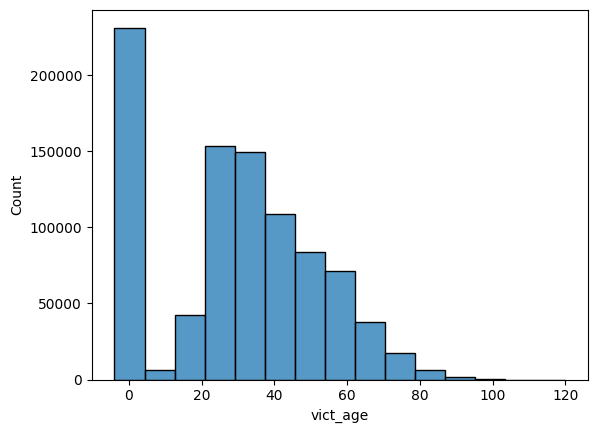

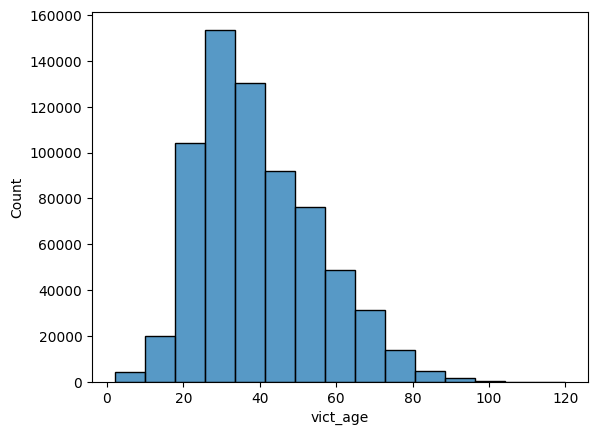

In [35]:
# Calculate percentage of ilogical age values ( < 1 )
wrong_values = df.loc[df['vict_age'] < 1, 'vict_age'].count() / df['vict_age'].count() * 100
print("Percentage of ilogical values in vict_age column:")
print('{:2.2f}%'.format(wrong_values))
df_invalid_age = df[df['vict_age'] <= 0].copy()
df_complete = df.copy()
df = df[df['vict_age'] > 0]

# Create a histogram
sns.histplot(data=df_complete, x='vict_age', bins=15, kde=False)
plt.show()

# Create a histogram
sns.histplot(data=df, x='vict_age', bins=15, kde=False)
plt.show()

# Definition of functions for filtering and plotting

In [74]:
cat_cols = ['vict_sex', 'vict_descent','premis_cd', 'crm_cd', 'area', 'weapon']
cols_to_filter = ['premis_cd', 'crm_cd', 'vict_descent', 'vict_sex', 'weapon']

def filterPercent(data, cols, percent):
    for col in cols:
        value_counts = data[col].value_counts()
        # Step 2: Calculate cumulative percentage
        cumulative_perc = value_counts.cumsum() / value_counts.sum() * 100
        # Identify the characters that make up the first 80% of the data
        chars_to_keep = cumulative_perc[cumulative_perc <= percent].index.tolist()
        if cumulative_perc[cumulative_perc > percent].index.size > 0:
            first_char_over_perc = cumulative_perc[cumulative_perc > percent].index[0]
            chars_to_keep.append(first_char_over_perc)
        # Step 3: Filter the DataFrame
        data = data[data[col].isin(chars_to_keep)]
    return data

def doBarplot(data):
    for col in data.columns:
        category_order = data[col].value_counts().index
        sns.countplot(y=col, data=data, order=category_order)
        plt.show()

def doBarplotWithHue(data, normalize=False, filterPercentage = 0):
    data_complete = data.copy()
    for col1 in data.columns:
        # print(col1)
        fig, axs = plt.subplots(3, 2, figsize=(20, 20))  # Creates a 2x2 grid of subplots
        axs = axs.flatten()  # Flatten the array to make iteration easier
        cols = [x for x in data.columns if x != col1]
        for ax, col2 in zip(axs, cols):
            if filterPercentage > 0:
                data = data_complete.copy()
                cols_being_filtered = [x for x in cols_to_filter if x in [col1, col2]]
                data = filterPercent(data, cols_being_filtered, filterPercentage)
            data_grouped = (data
                .groupby(col1)[col2]
                .value_counts(normalize=normalize)
                .mul(100)
                .round(2)
                .unstack()
                )
            data_grouped.plot.bar(stacked = True,
                        ax = ax,
                        width = 0.65,
                        edgecolor = "black")
            ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
            ax.set_title(f"Distribution of {col1} by {col2}")
            
            if normalize:
                ax.set_ylabel("Percent")
            else:
                ax.set_ylabel("Counts")
        fig.tight_layout()

def plotByCrmCD(data, clm):
    clm_crm_counts = df.groupby(clm)['crm_cd'].count().reset_index()
    colormap = cm.viridis(np.linspace(0, 1, len(clm_crm_counts[clm])))
    
    # Sort the areas for better visualization (optional)
    clm_crm_counts = clm_crm_counts.sort_values('crm_cd', ascending=False)
    
    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(clm_crm_counts[clm].astype(str), clm_crm_counts['crm_cd'], color=colormap)
    plt.xlabel(clm)
    plt.ylabel('Count of Crime Codes')
    plt.title(f'Count of Crime Codes by {clm}')
    plt.xticks(rotation=45)  # Rotate the x labels for better readability
    plt.show()

def plotBarsByAreaAndGroupedValue(data, clm):
    np.random.seed(0)  
    colors = np.random.rand(len(data[f'{clm}'].unique()), 3)  
    
    clmns_counts_by_area = data.groupby(['area', f'{clm}']).size().unstack(fill_value=0)

    clmns_counts_by_area.plot(kind='bar', color=colors, figsize=(10, 6))
    plt.xlabel('Area')
    plt.ylabel('Count')
    plt.title('Gender Counts by Area')
    plt.xticks(rotation=45)
    plt.legend(title='Gender')
    plt.show()
    
def doBoxplotVsAge(data):
    for col in cat_cols:
        sns.boxplot(x=col, y='vict_age', data=data, orient='v')
        plt.show()

def plotFrecuency(data, filterPercentage = 0):
    fig = plt.figure(figsize=(15,10))
    iax = 1
    data_complete = data.copy()
    for col in cat_cols:
        if filterPercentage > 0:
            data = data_complete.copy()
            data = filterPercent(data, [col], filterPercentage)
        if iax <= 3:
            ax1 = fig.add_subplot(2, 3, iax)
            category_order = data[col].value_counts().index
            sns.countplot(y=col, data=data, order=category_order, ax=ax1, orient='h')

            ax2 = fig.add_subplot(2, 3, iax+3)
            sns.boxplot(y=col, x='vict_age', data=data, orient='h', ax=ax2)
        iax += 1
        if iax > 3:
            fig = plt.figure(figsize=(18,10))
            iax = 1

def plotHeatmaps(data, normalize=False, filterPercentage=0):
    data_complete = data.copy()
    for col1 in data.columns:
        fig, axs = plt.subplots(3, 2, figsize=(20, 20))  # Creates a 2x2 grid of subplots
        axs = axs.flatten()  # Flatten the array to make iteration easier
        cols = [x for x in data.columns if x != col1]
        for ax, col2 in zip(axs, cols):
            if filterPercentage > 0:
                data = data_complete.copy()
                data = filterPercent(data, [x for x in cols_to_filter if x in [col1, col2]], filterPercentage)
            data_grouped = (data
                .groupby(col1)[col2]
                .value_counts(normalize=normalize)
                .mul(100)
                .round(2)
                .unstack().T
                )
            
            if normalize:
                sns.heatmap(data_grouped, ax=ax, vmin=0, vmax=100)
                color_bar = ax.collections[0].colorbar
                color_bar.set_label('Percent')
            else:
                sns.heatmap(data_grouped, ax=ax)
                color_bar = ax.collections[0].colorbar
                color_bar.set_label('Counts')

# Barplots and Boxplots
- Barplot was created for each categorical column
- Boxplot was created for each categorical column vs 'Victim Age' numerical column

### Frecuency plots BEFORE filtering categorical values with too little frecuency

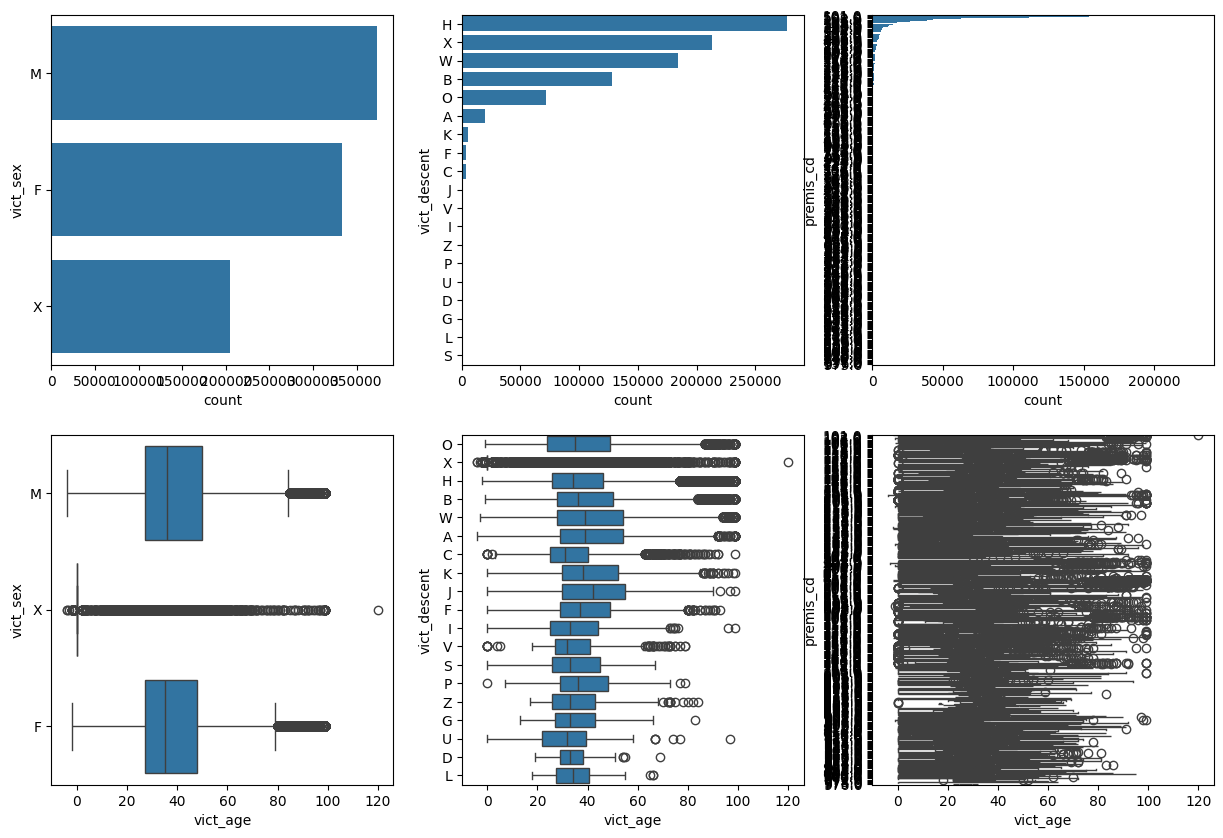

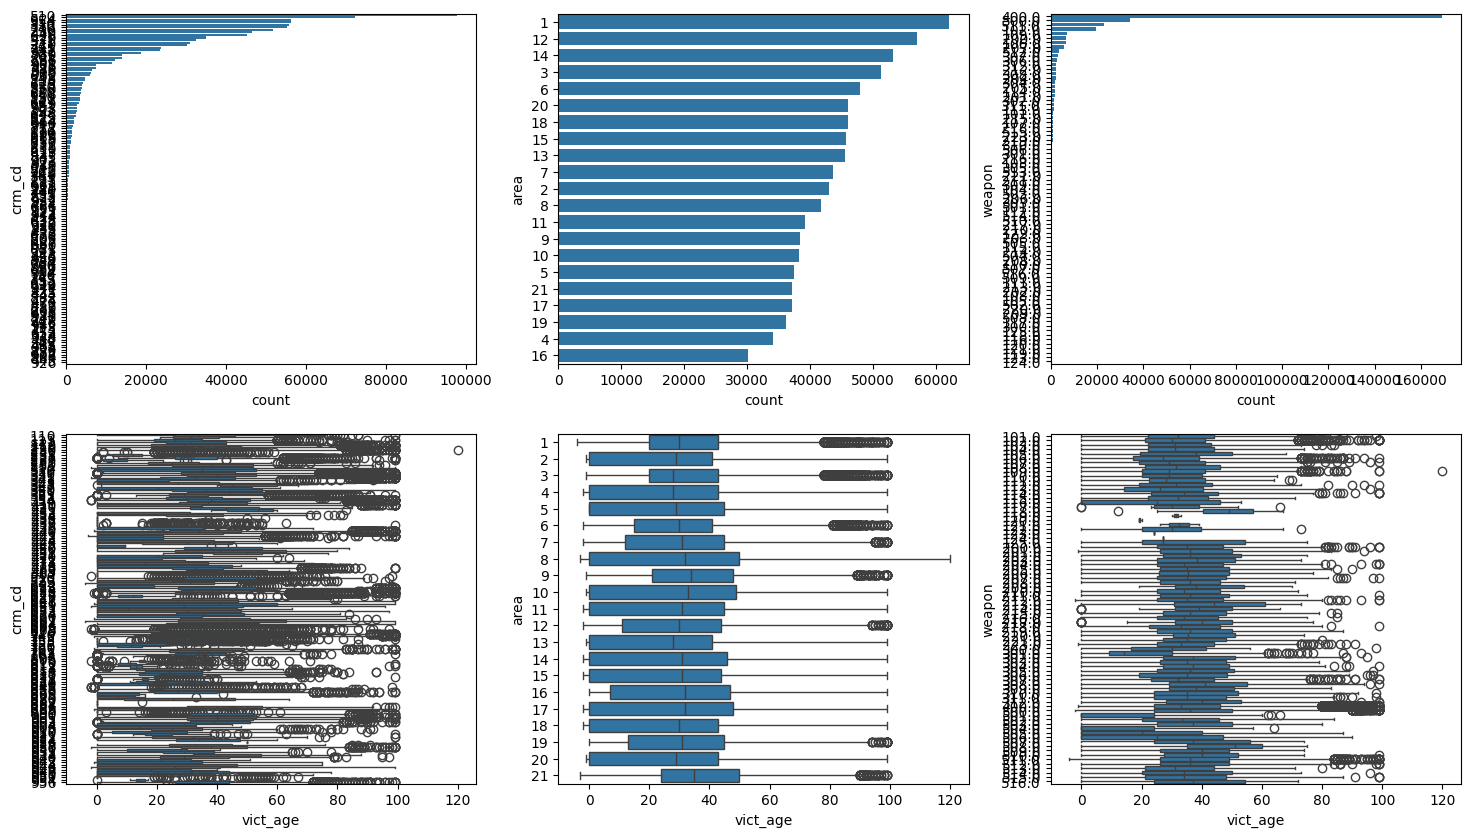

<Figure size 1800x1000 with 0 Axes>

In [37]:
plotFrecuency(df_complete[cat_cols + ['vict_age']])

### Frecuency plots AFTER filtering categorical values with too little frecuency

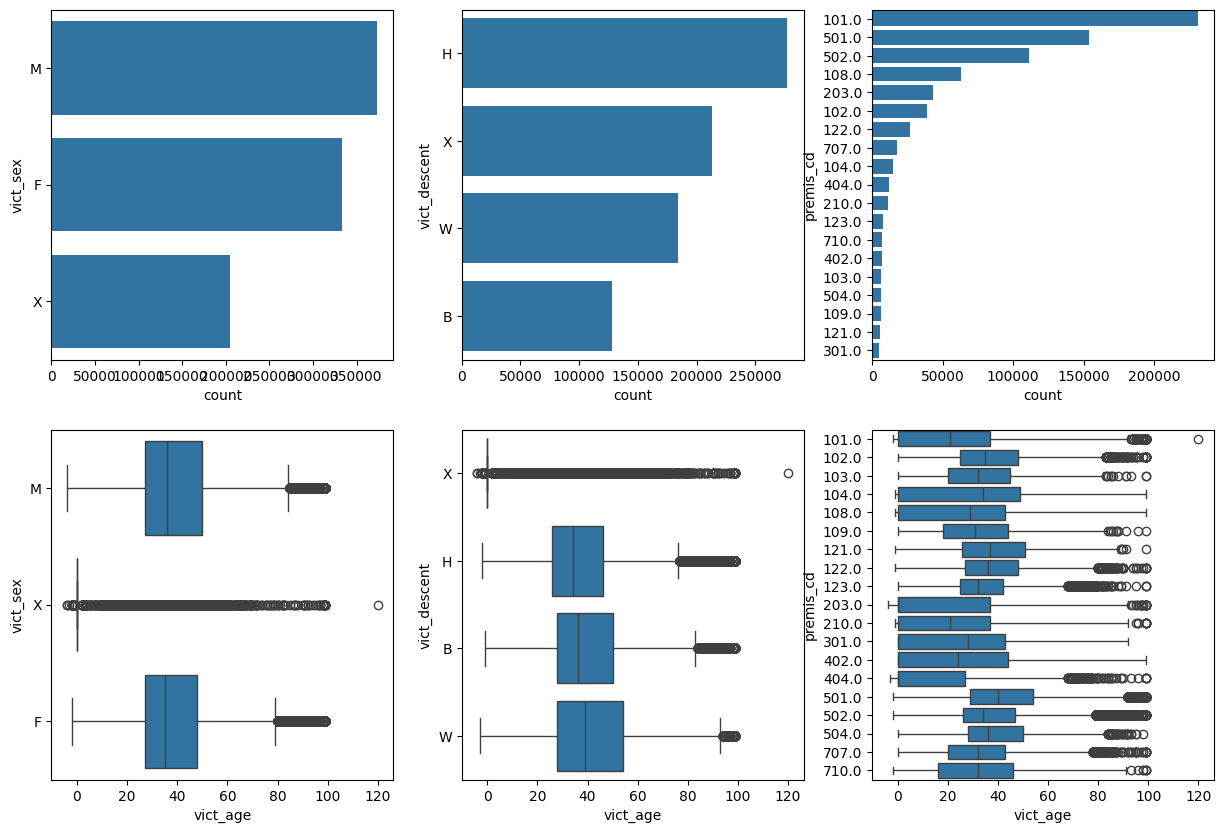

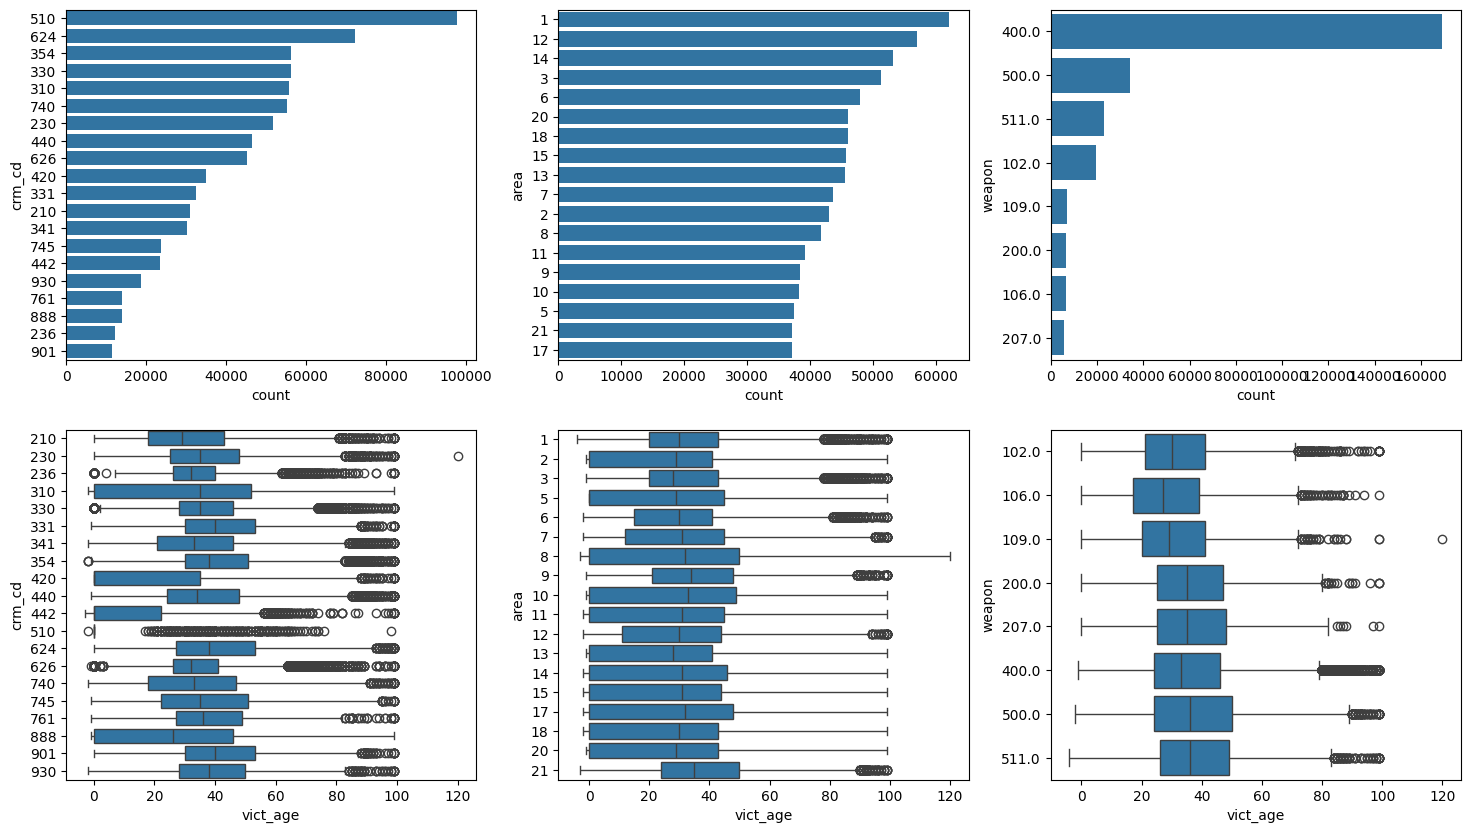

<Figure size 1800x1000 with 0 Axes>

In [38]:
plotFrecuency(df_complete[cat_cols + ['vict_age']], filterPercentage=85)

### Frecuency plots AFTER filtering rows with Vict Age < 1  (Invalid / Unknown Vict Age)

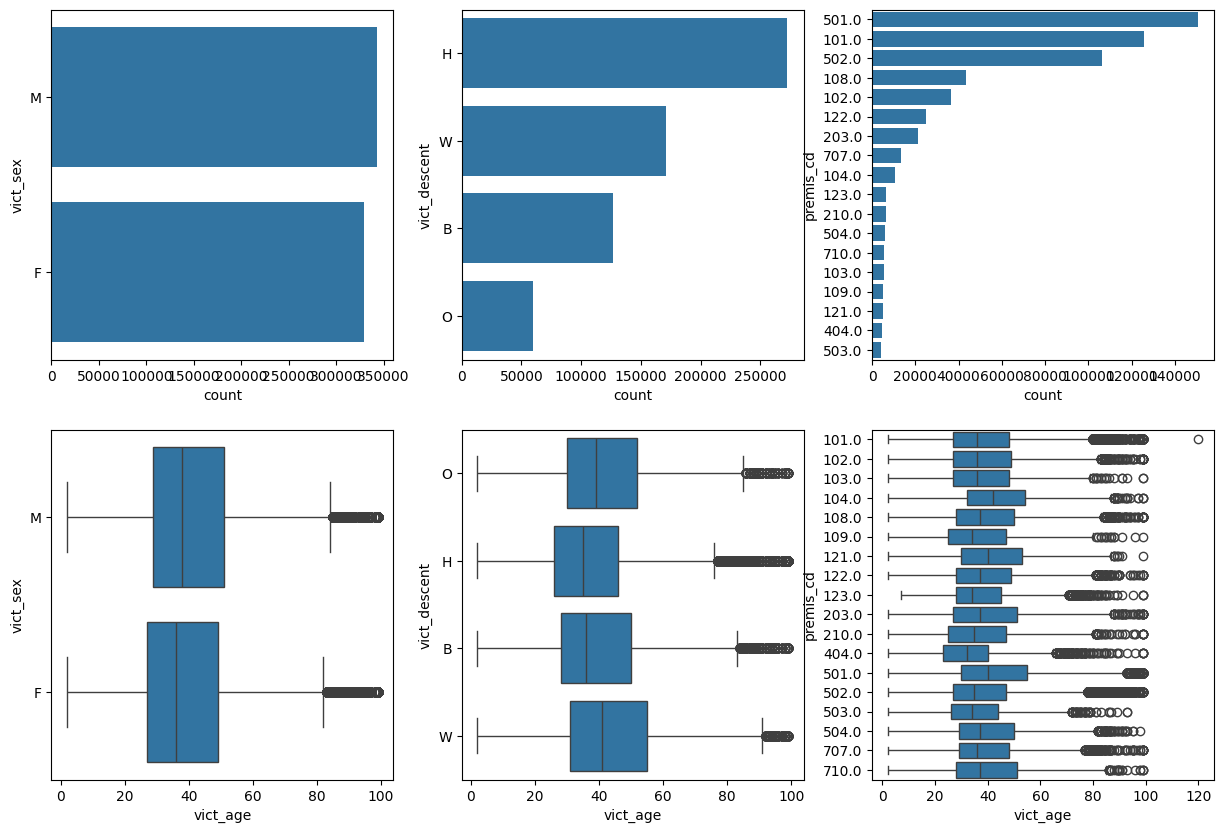

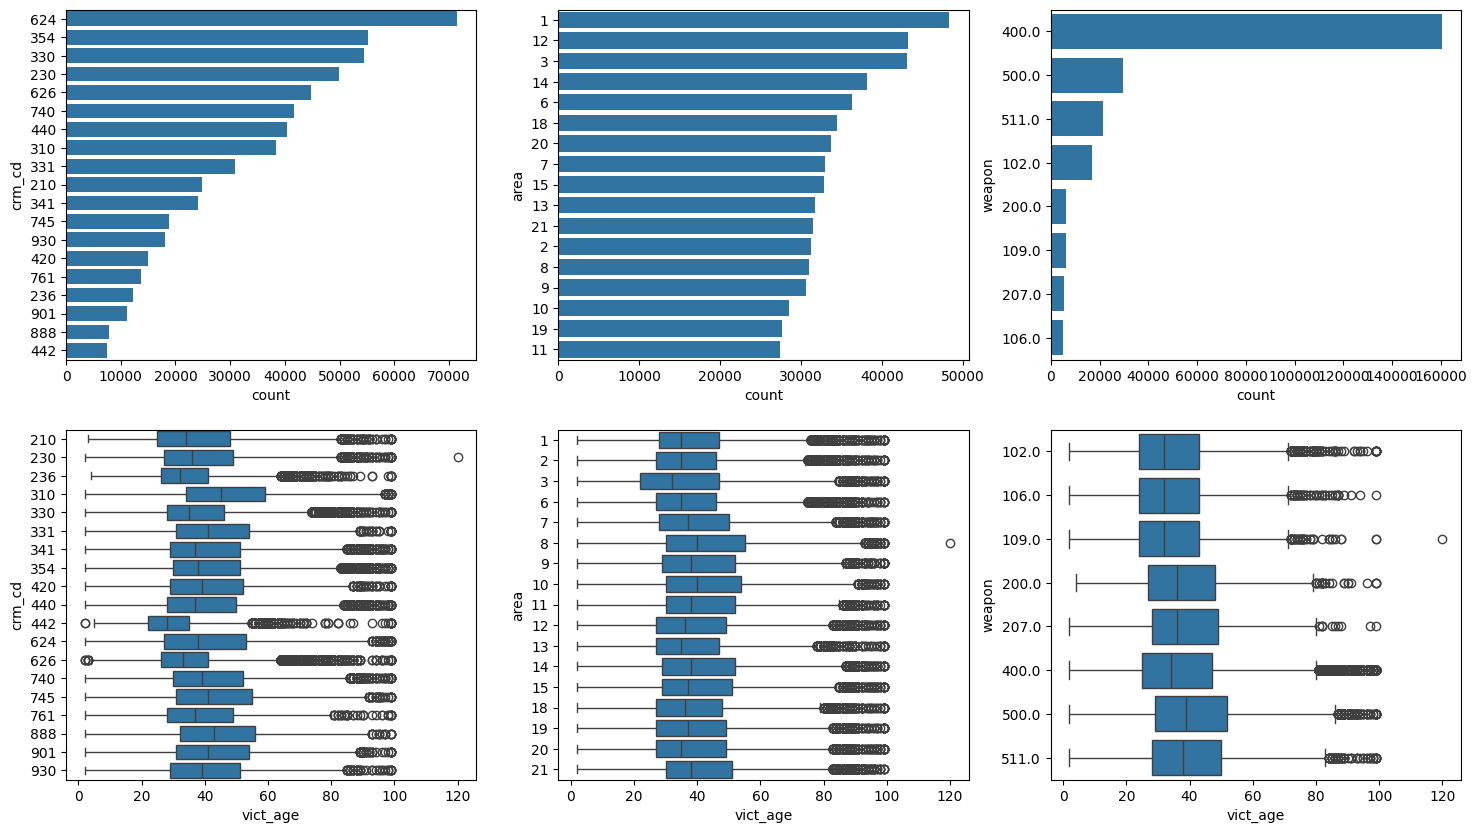

<Figure size 1800x1000 with 0 Axes>

In [39]:
# df = filterPercent(df, [ 'premis_cd', 'crm_cd'], 90)
plotFrecuency(df[cat_cols + ['vict_age']], filterPercentage=85)

### Frecuency plots of data with invalid or unknown Vict Age

/var/folders/zz/217zyxw90hlg93r9zynpgy6h0000gn/T/ipykernel_46850/2839513803.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ds_cat_stats = pd.concat([ds_cat_stats, tmp])


values  \
column                                                            
vict_sex                                              [M, X, F]   
vict_age                                    [0, -2, -1, -3, -4]   
vict_descent      [O, X, H, W, B, A, K, V, U, C, S, P, F, J, I]   
area          [7, 10, 4, 21, 14, 2, 6, 1, 15, 18, 11, 19, 5,...   
weapon        [-777.0, 500.0, 511.0, 223.0, 400.0, 311.0, 10...   
crm_cd        [510, 668, 420, 310, 341, 946, 331, 745, 845, ...   
premis_cd     [101.0, 203.0, 108.0, 102.0, 726.0, 729.0, 707...   
time          [2130, 130, 630, 1300, 1600, 1200, 430, 2015, ...   
date occ      [03/01/2020 12:00:00 AM, 11/01/2020 12:00:00 A...   

             values_count_incna values_count_nona num_miss  pct_miss  
column                                                                
vict_sex                      3                 3        0       0.0  
vict_age                      5                 5        0       0.0  
vict_descent                 15                15        0       0.0  
area                         21                21        0       0.0  
weapon                       73                72   204339      88.9  
crm_cd                      134               134        0       0.0  
premis_cd                   292               291        9       0.0  
time                       1439              1439        0       0.0  
date occ                   1525              1525        0       0.0

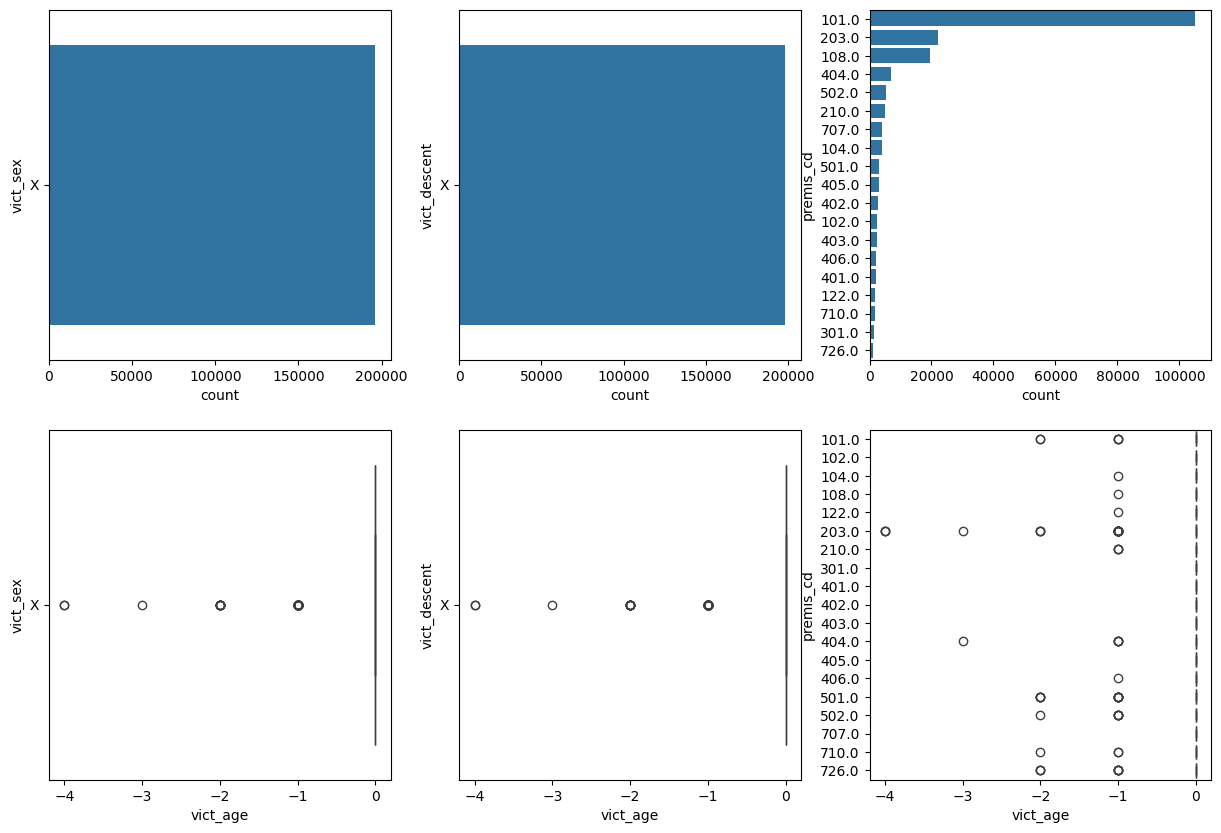

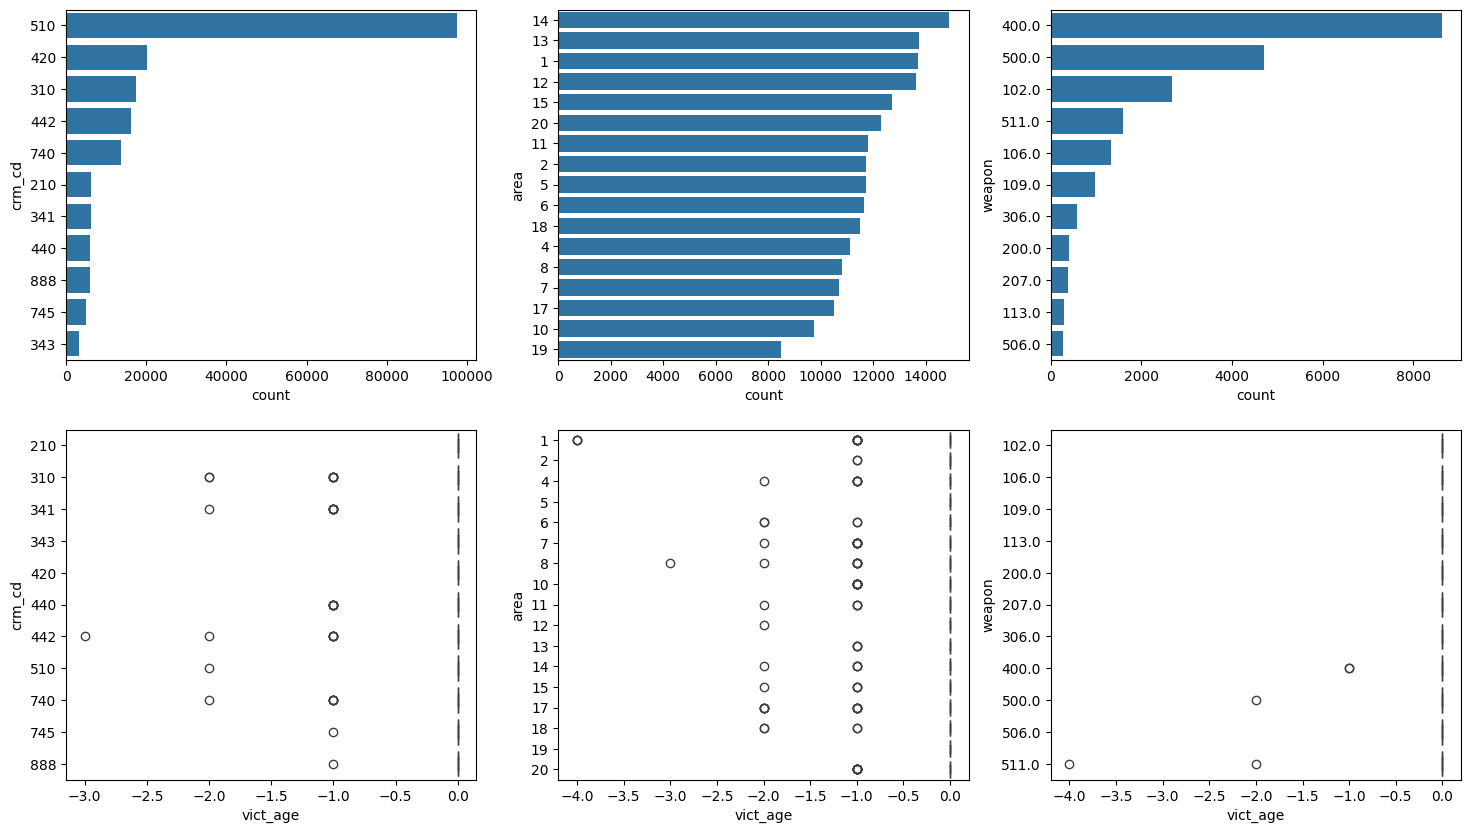

<Figure size 1800x1000 with 0 Axes>

In [40]:
plotFrecuency(df_invalid_age[cat_cols + ['vict_age']], filterPercentage=85)
cat_stats(df_invalid_age)

### Stacked barplots for each categorical feature vs other categorical features
The y-axis is the number of ocurrencies for each combination.

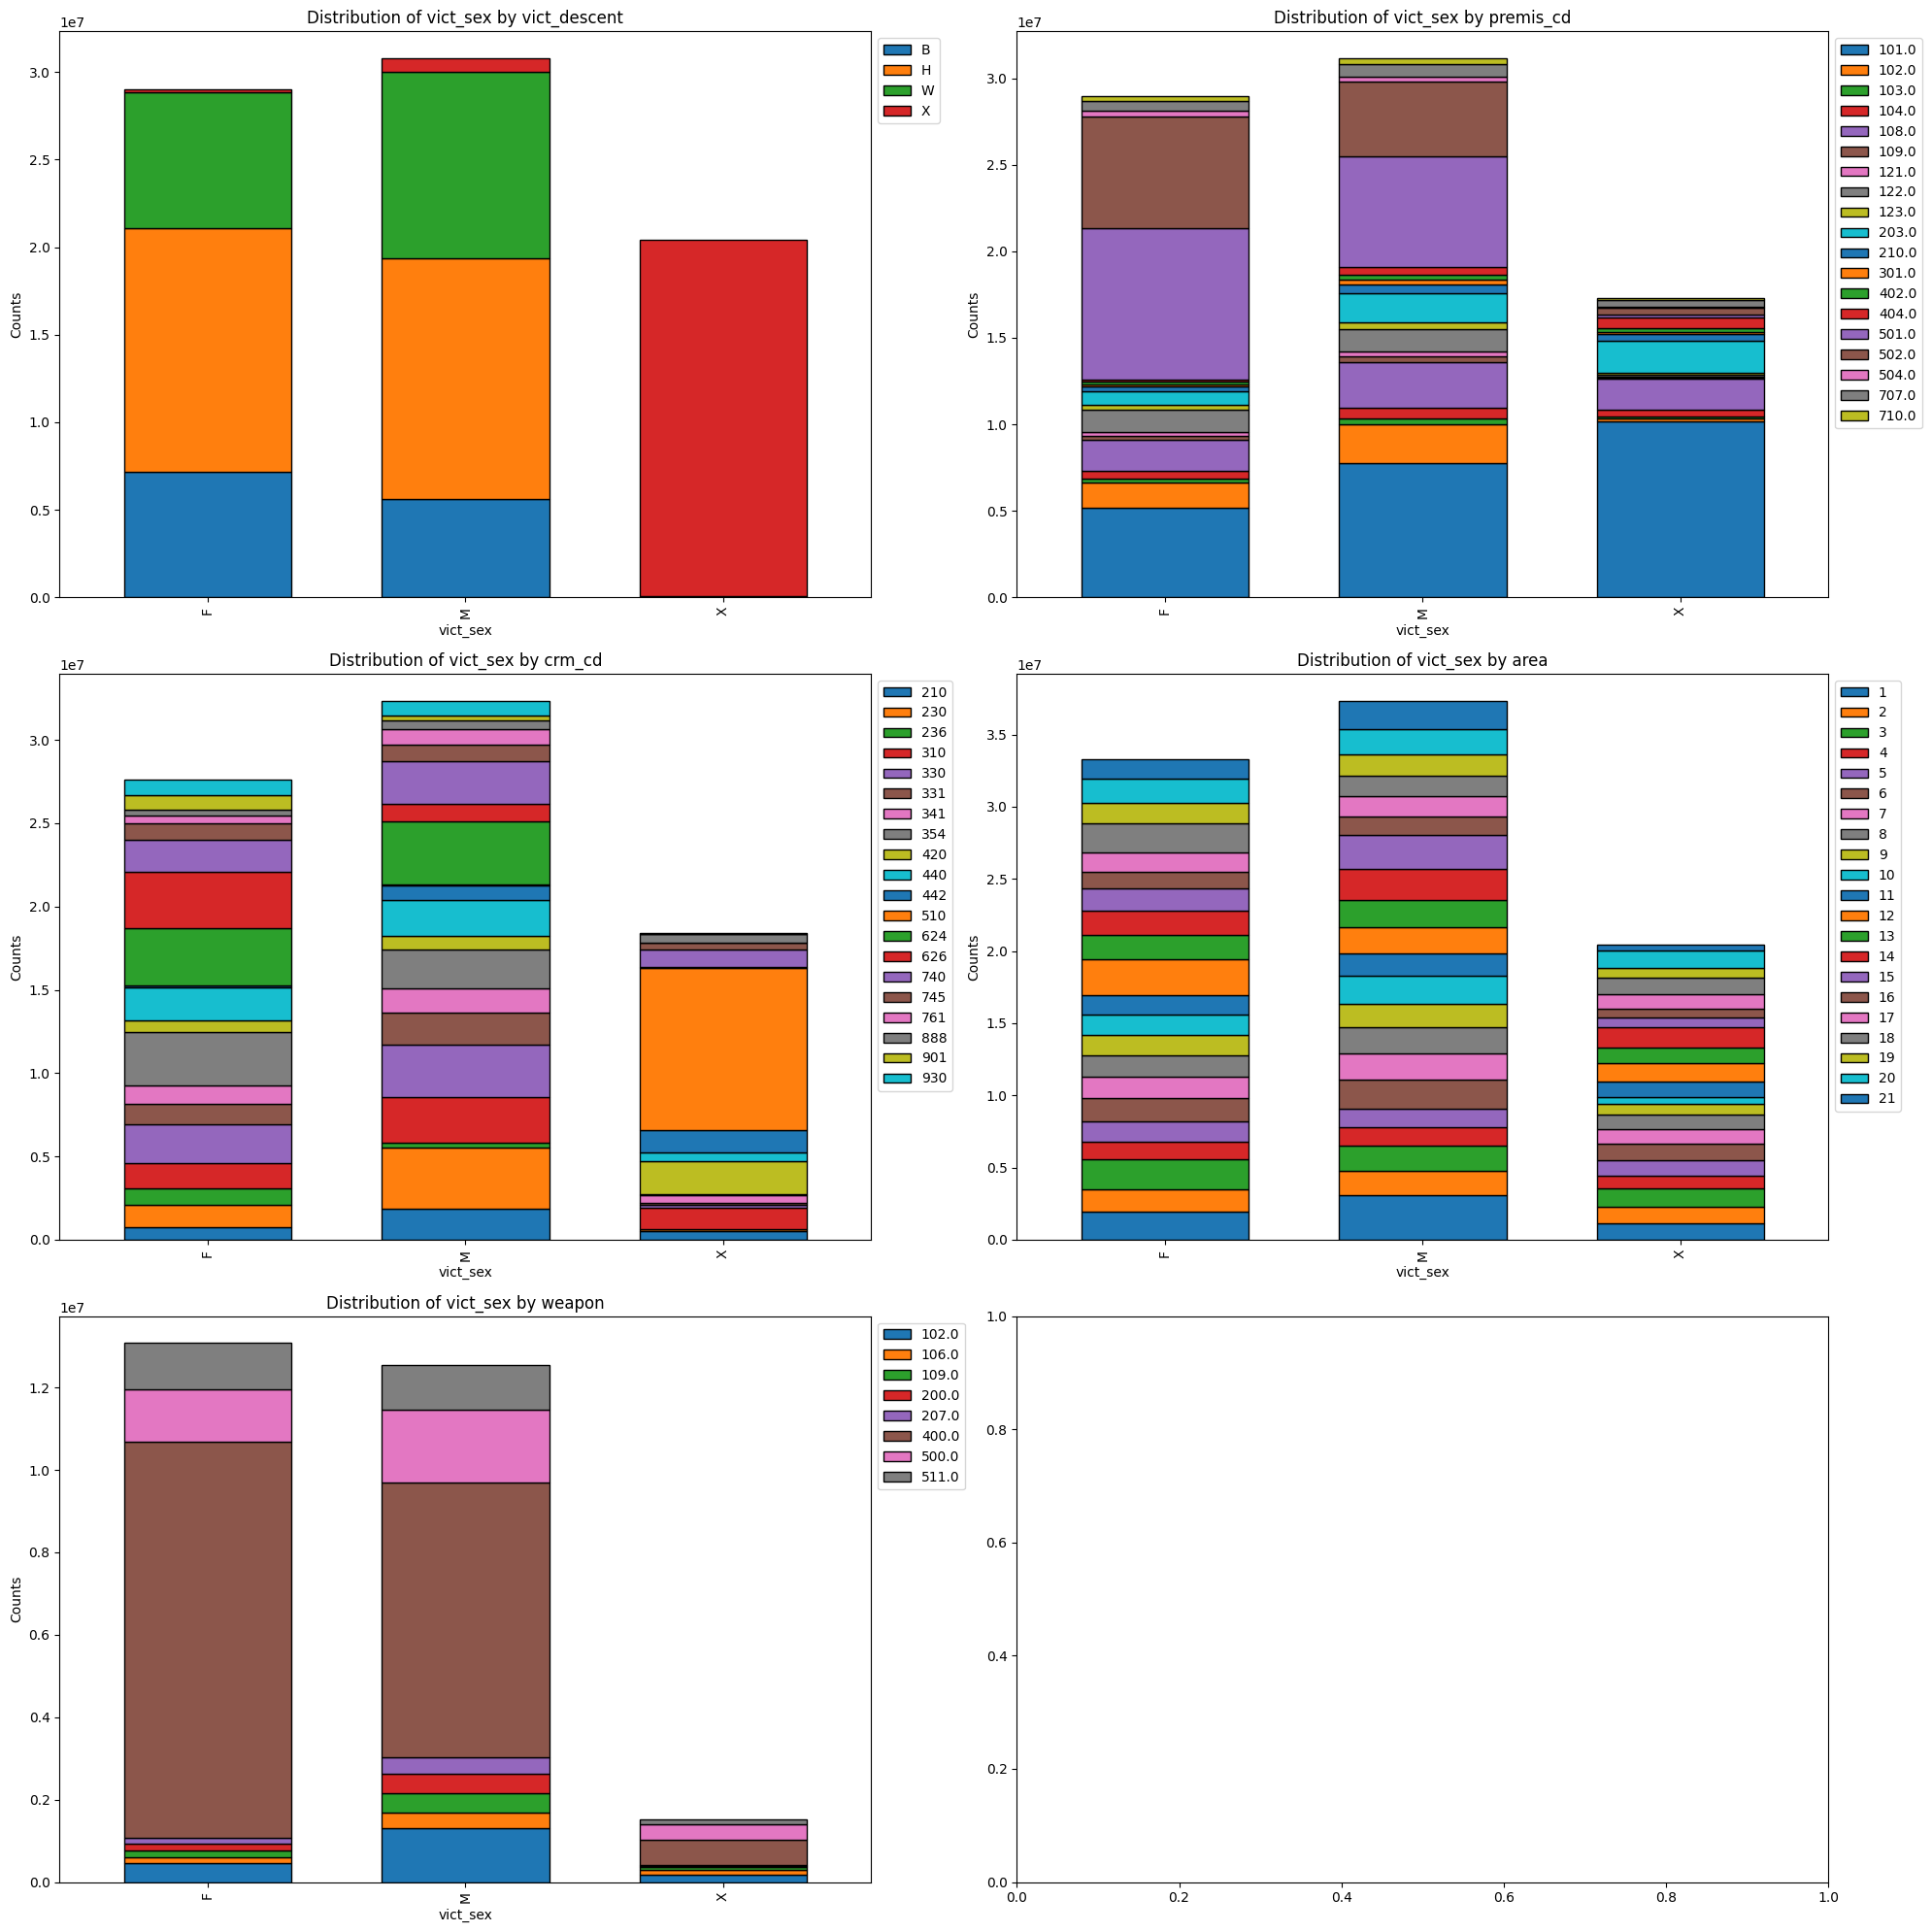

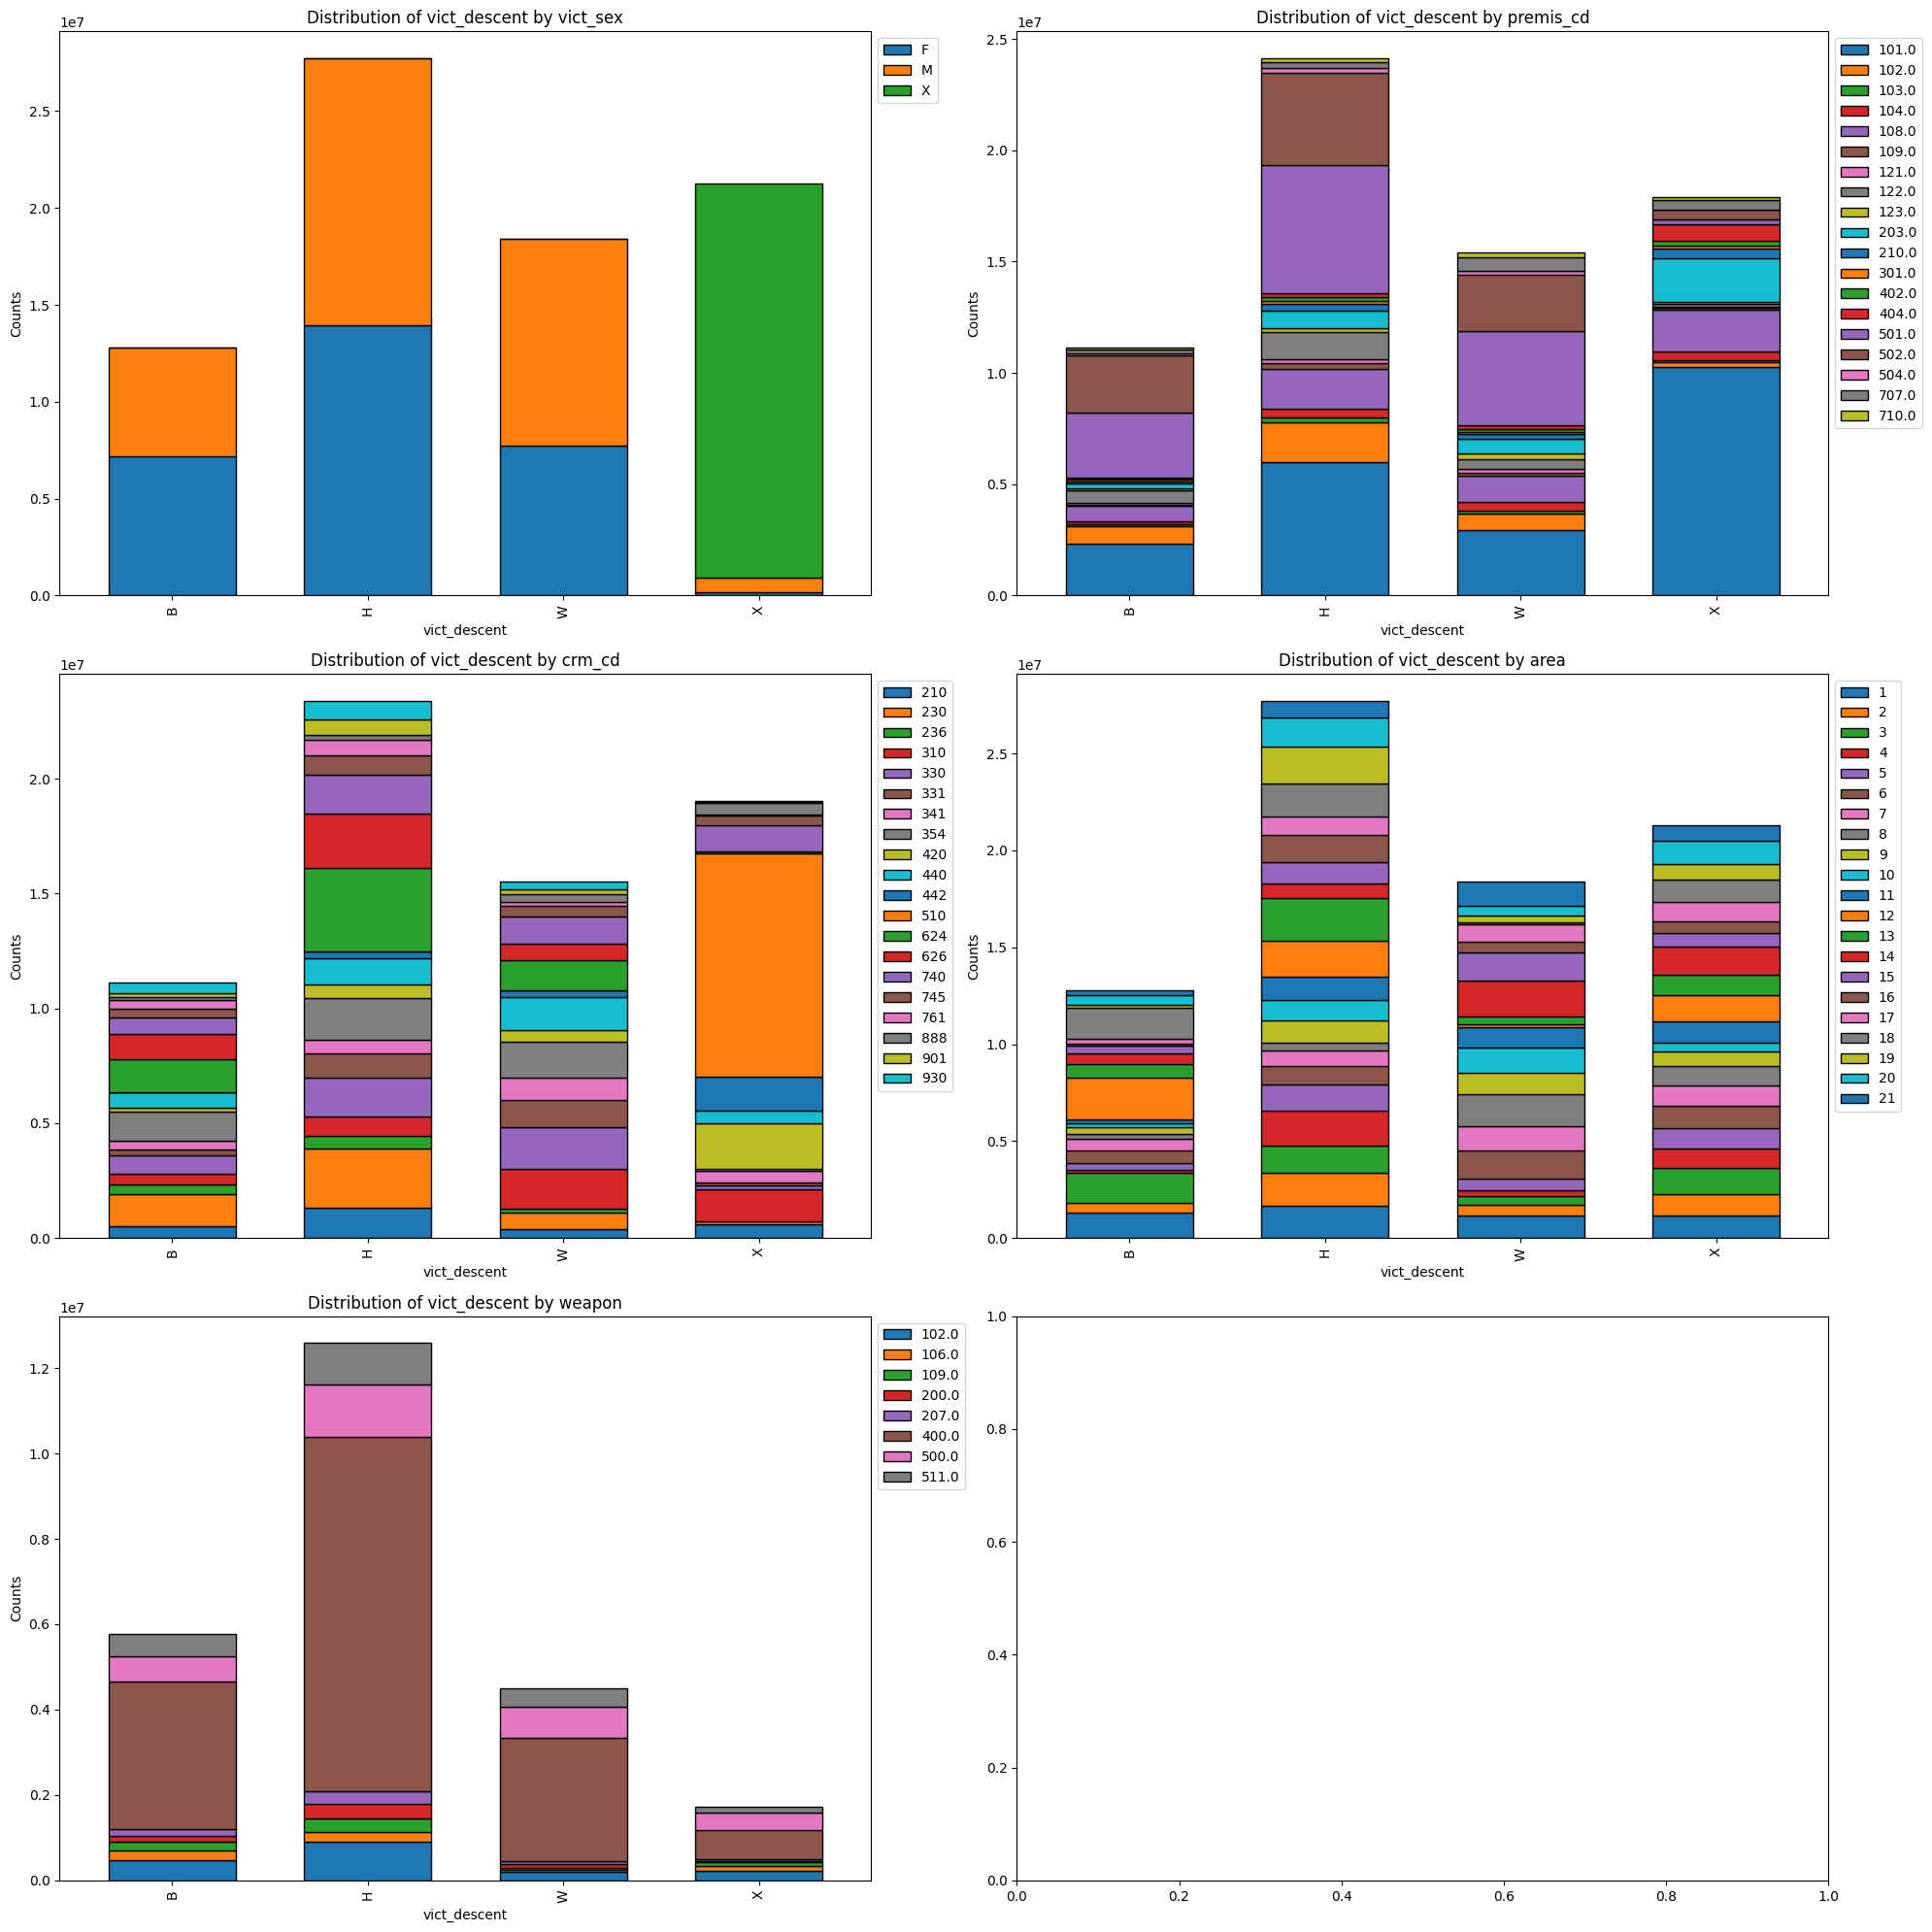

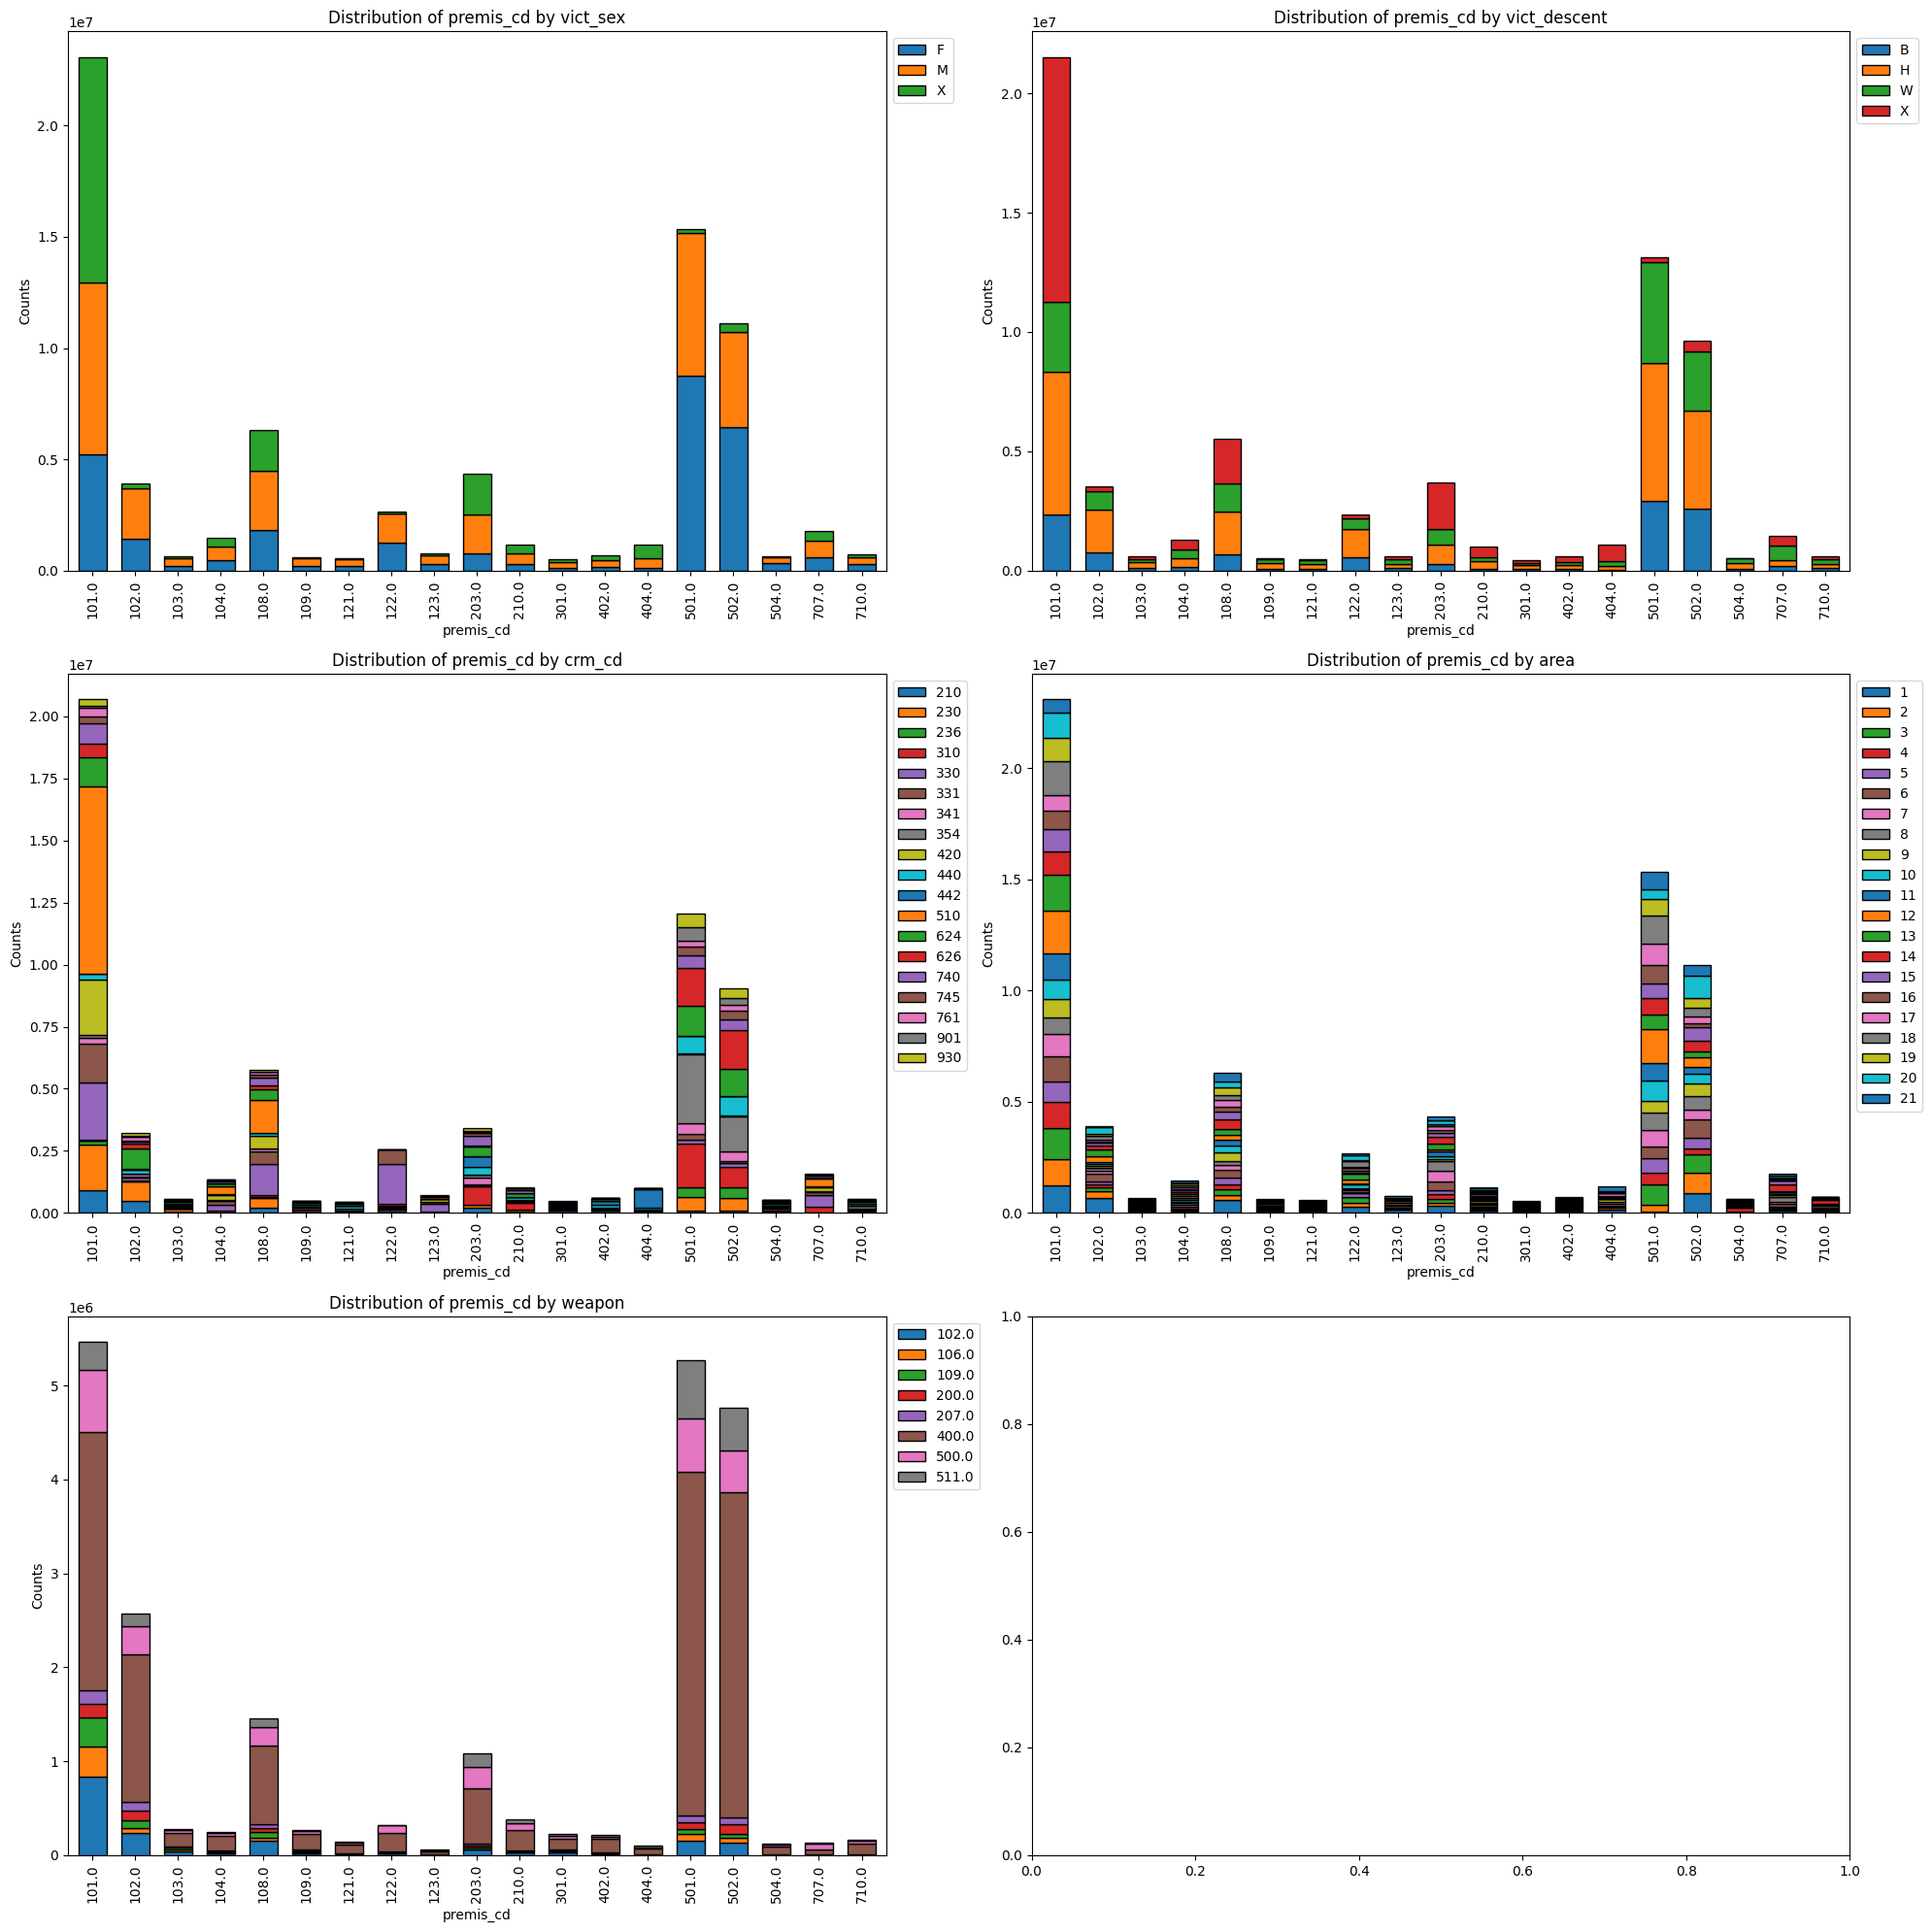

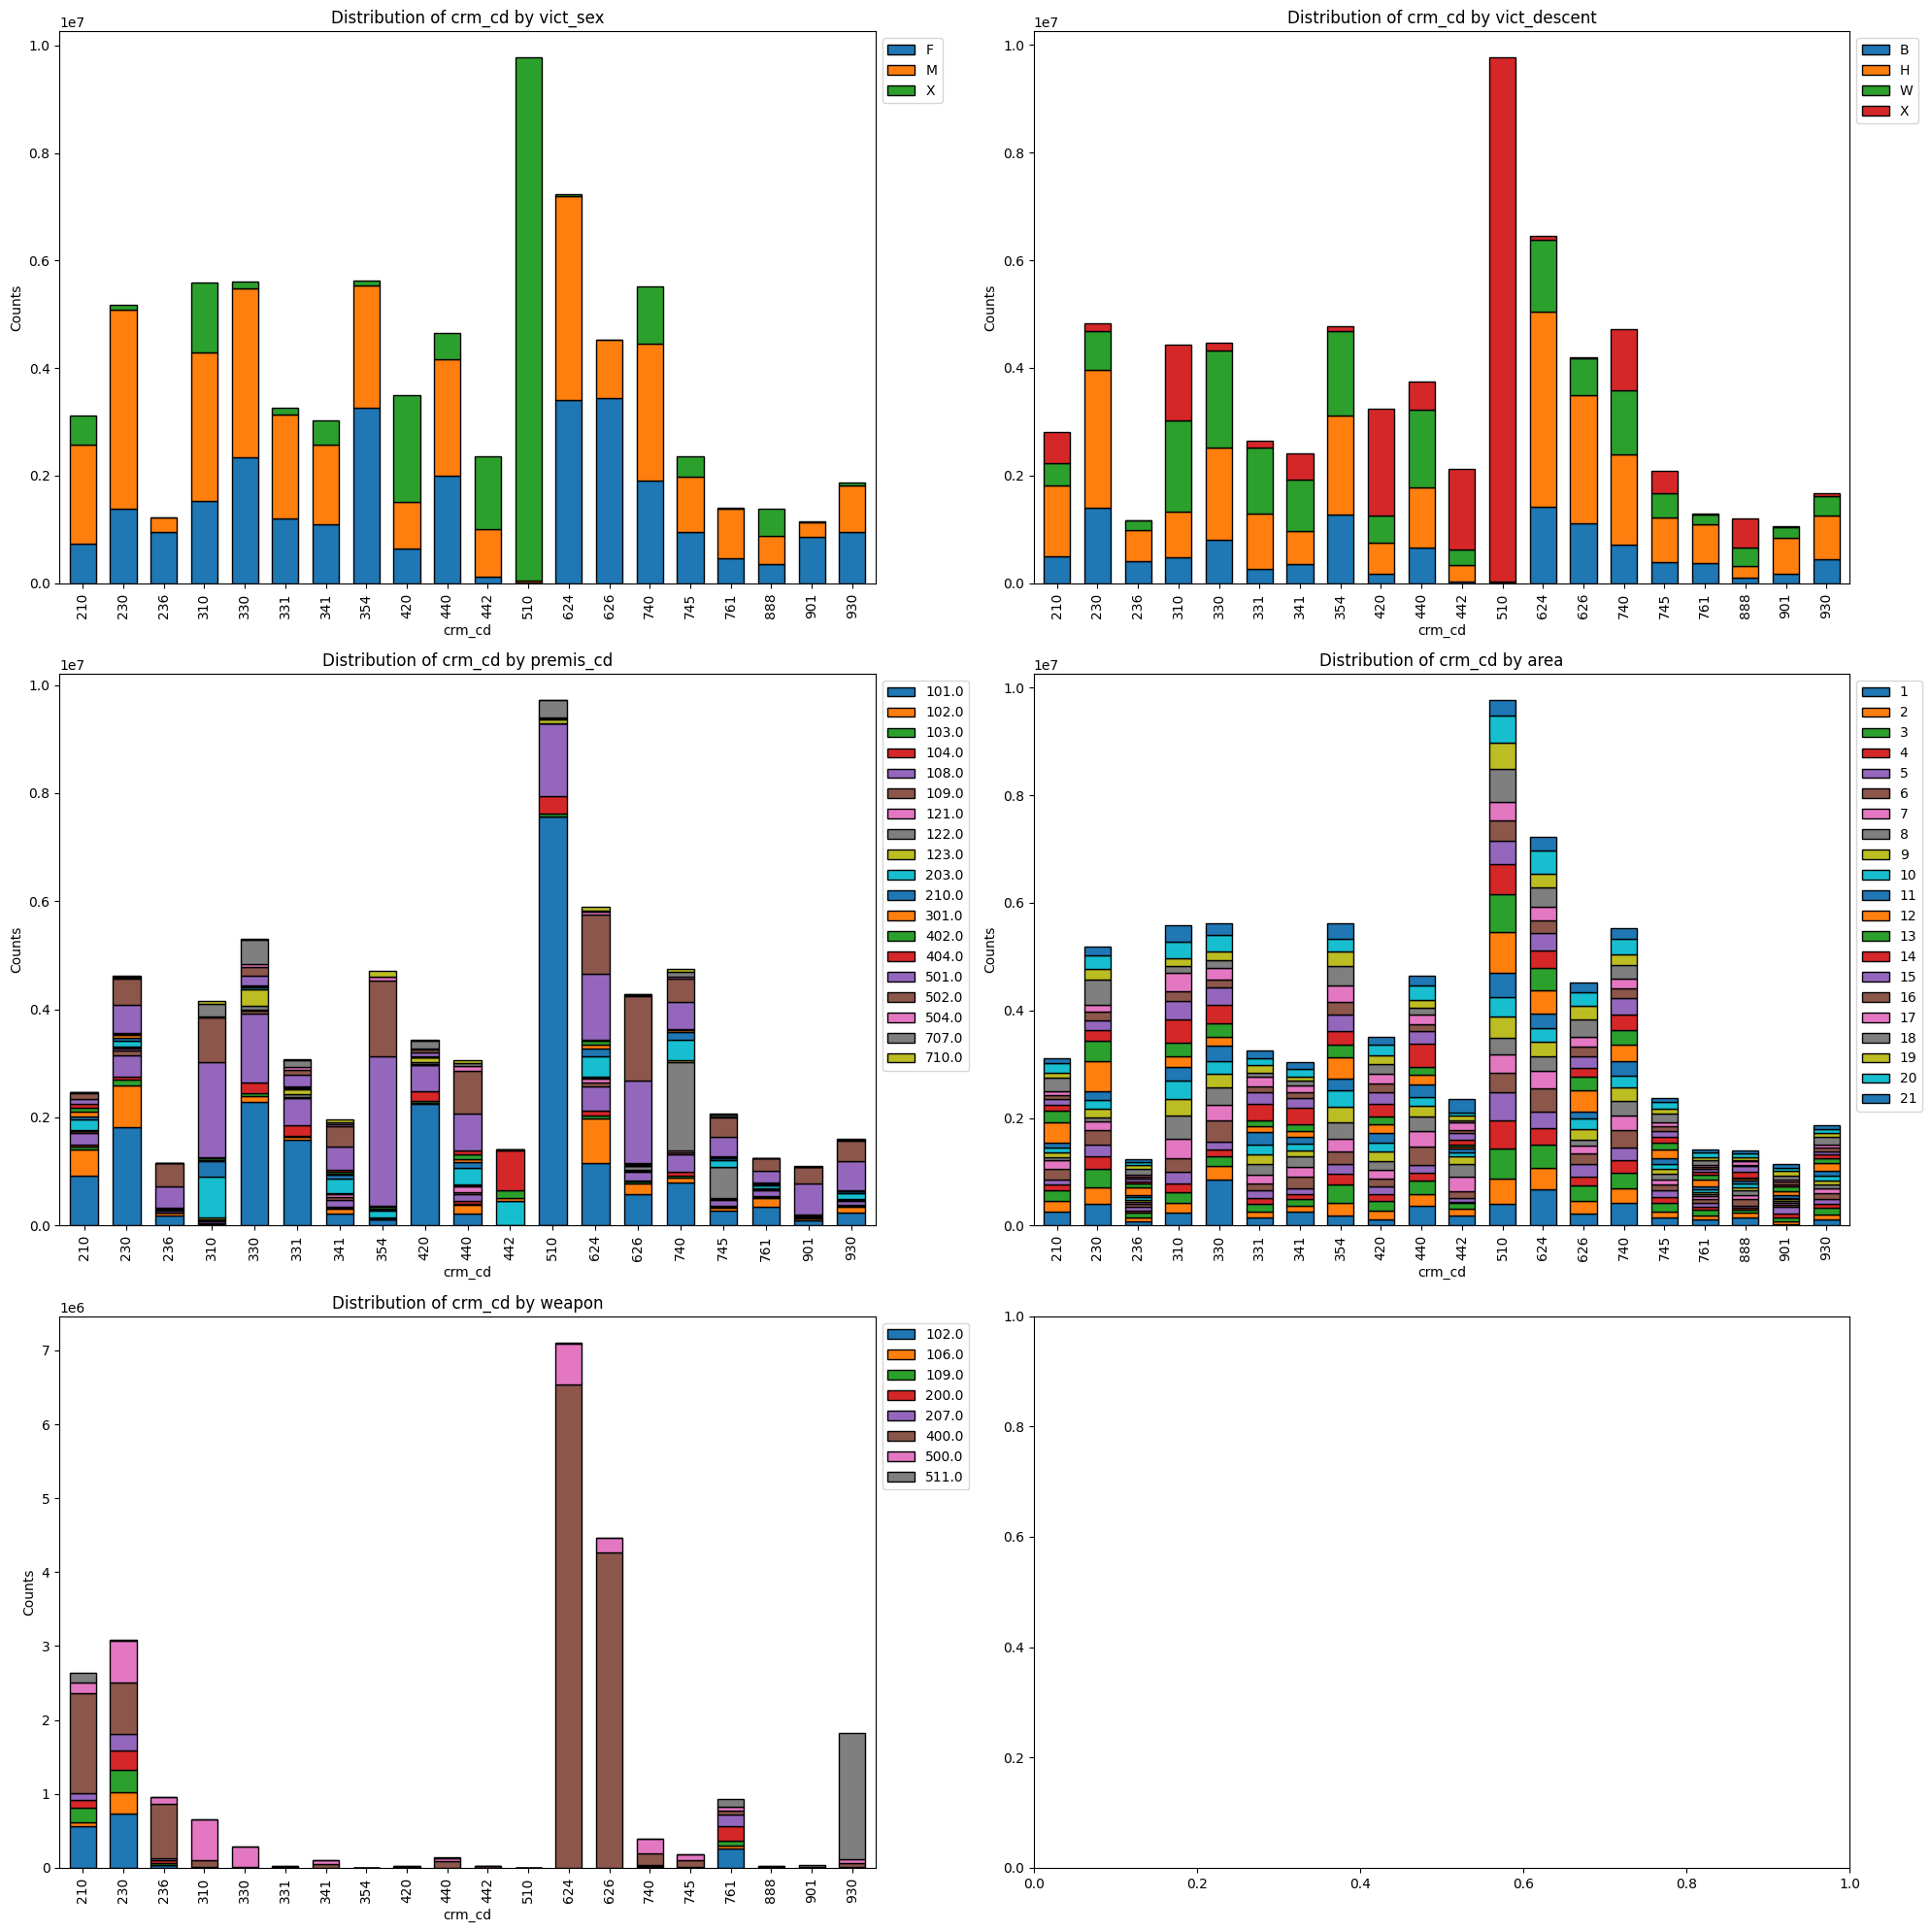

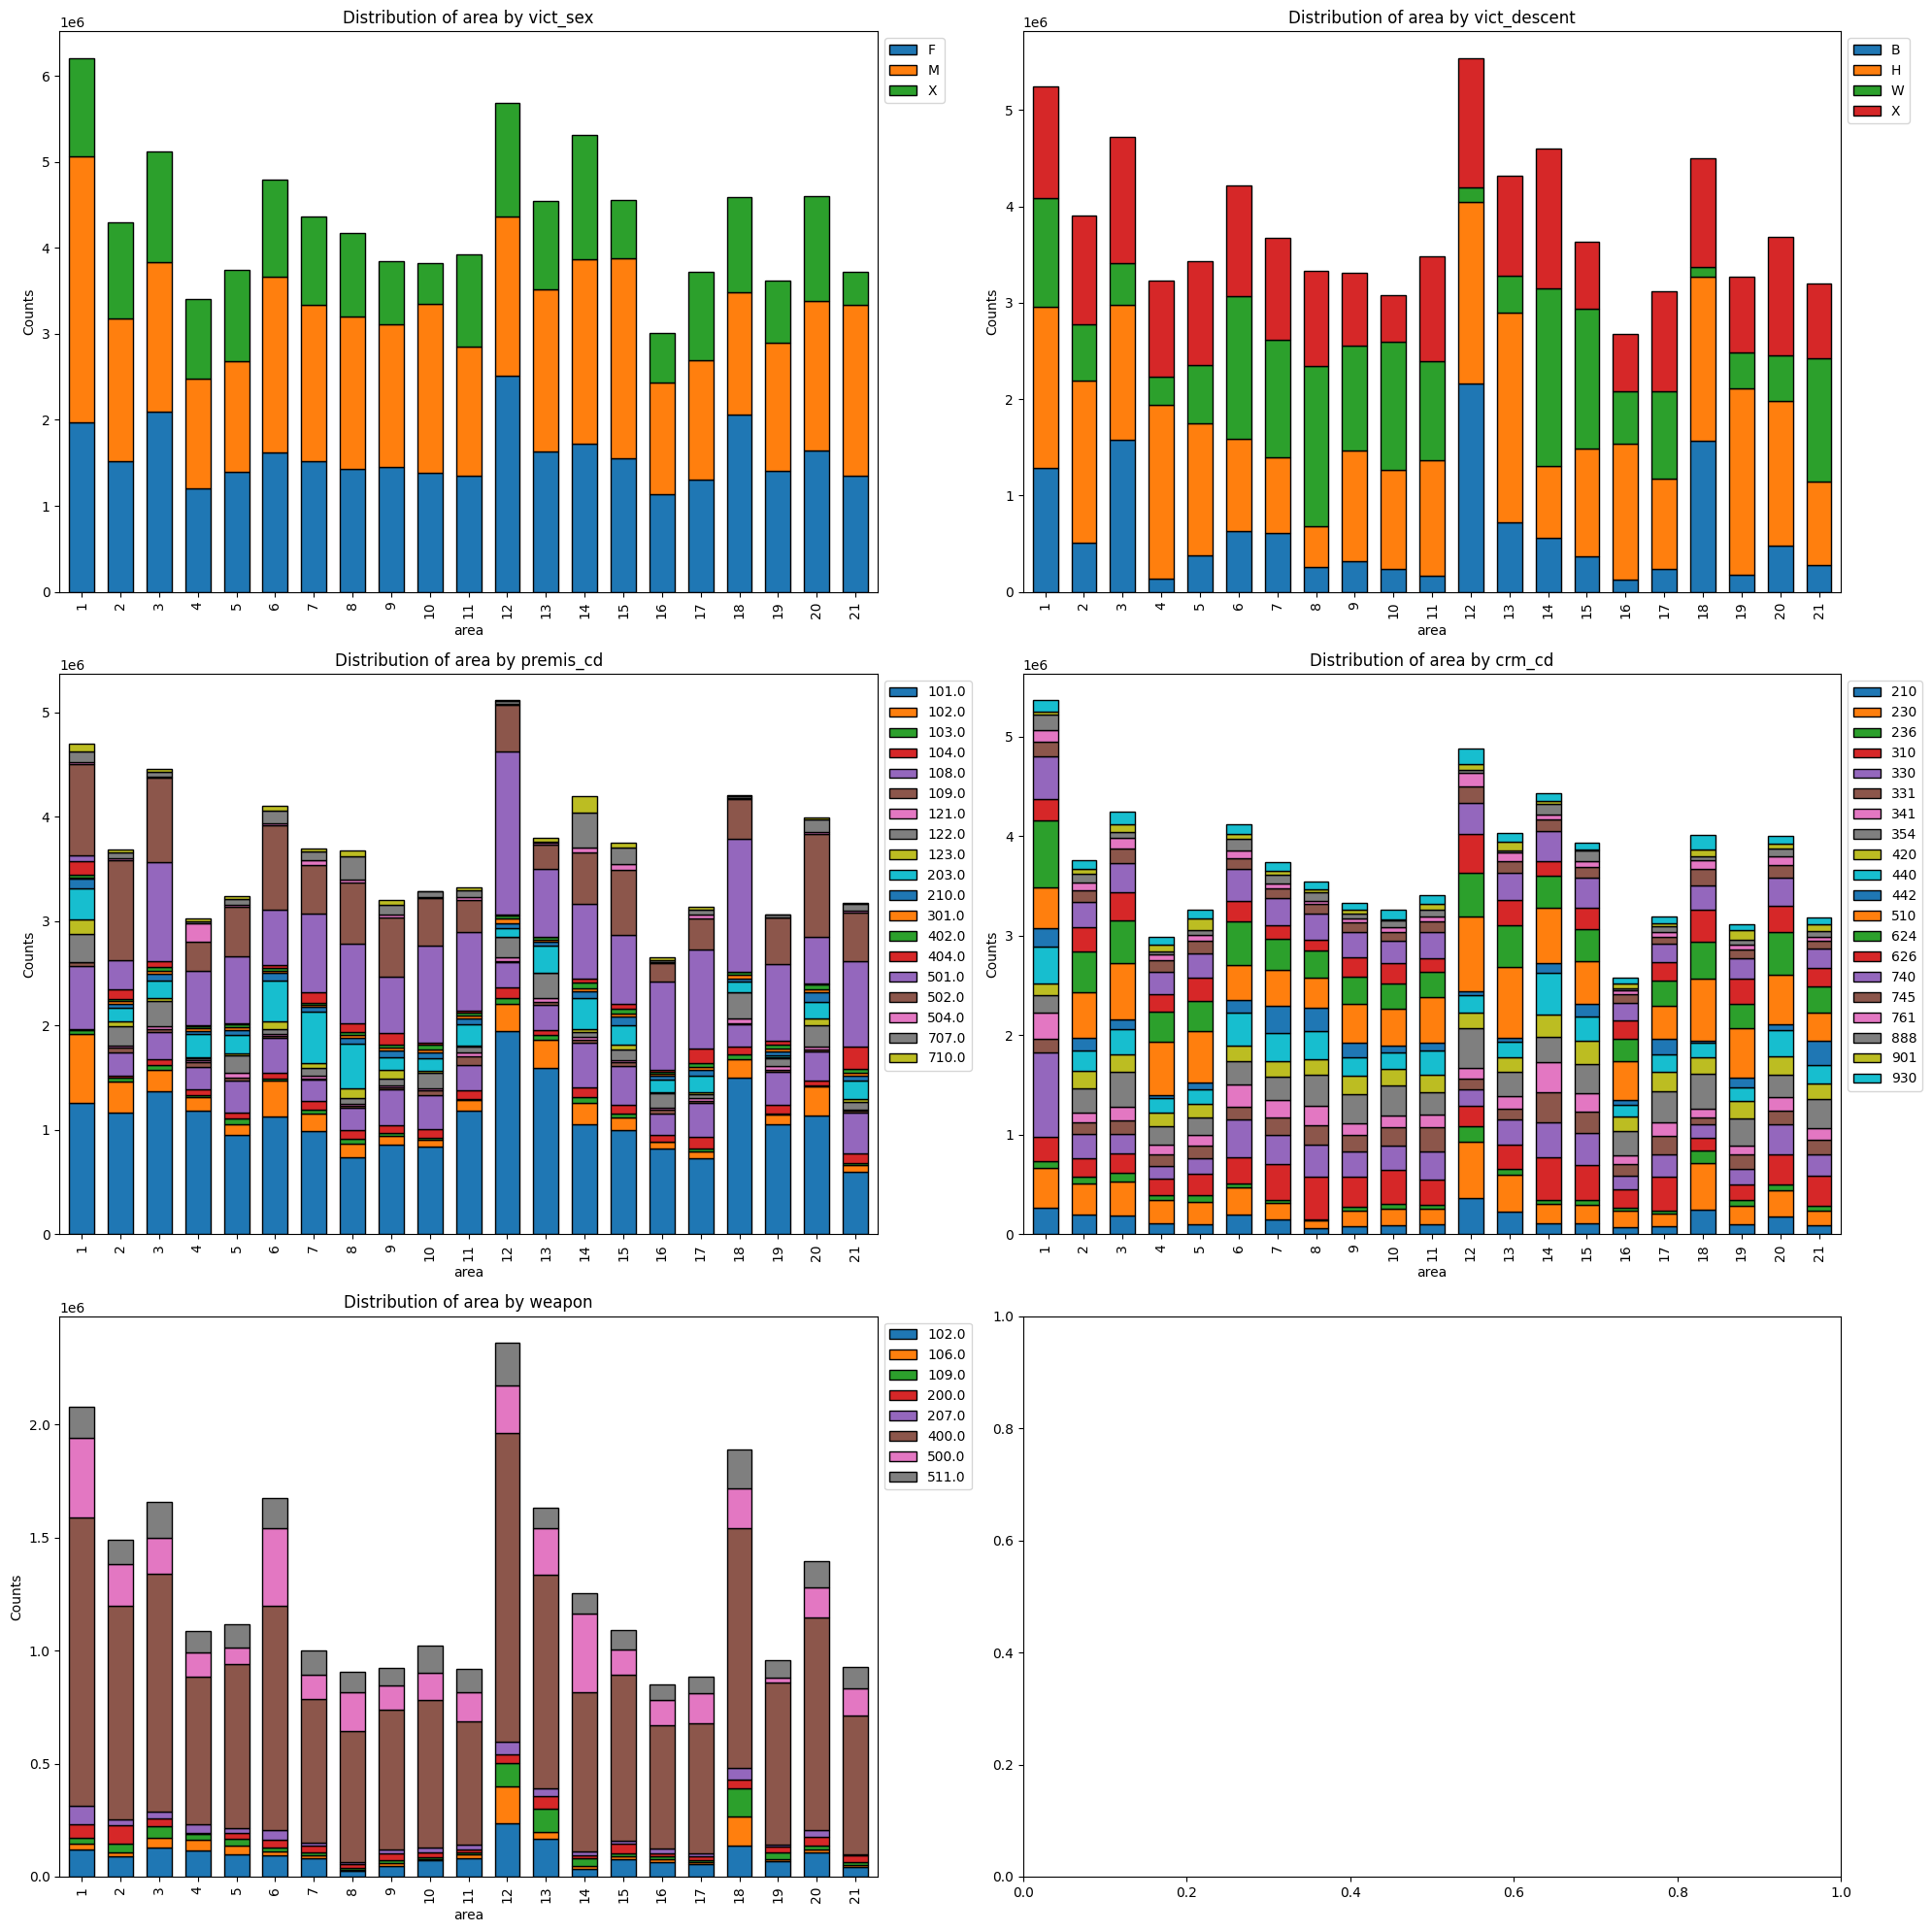

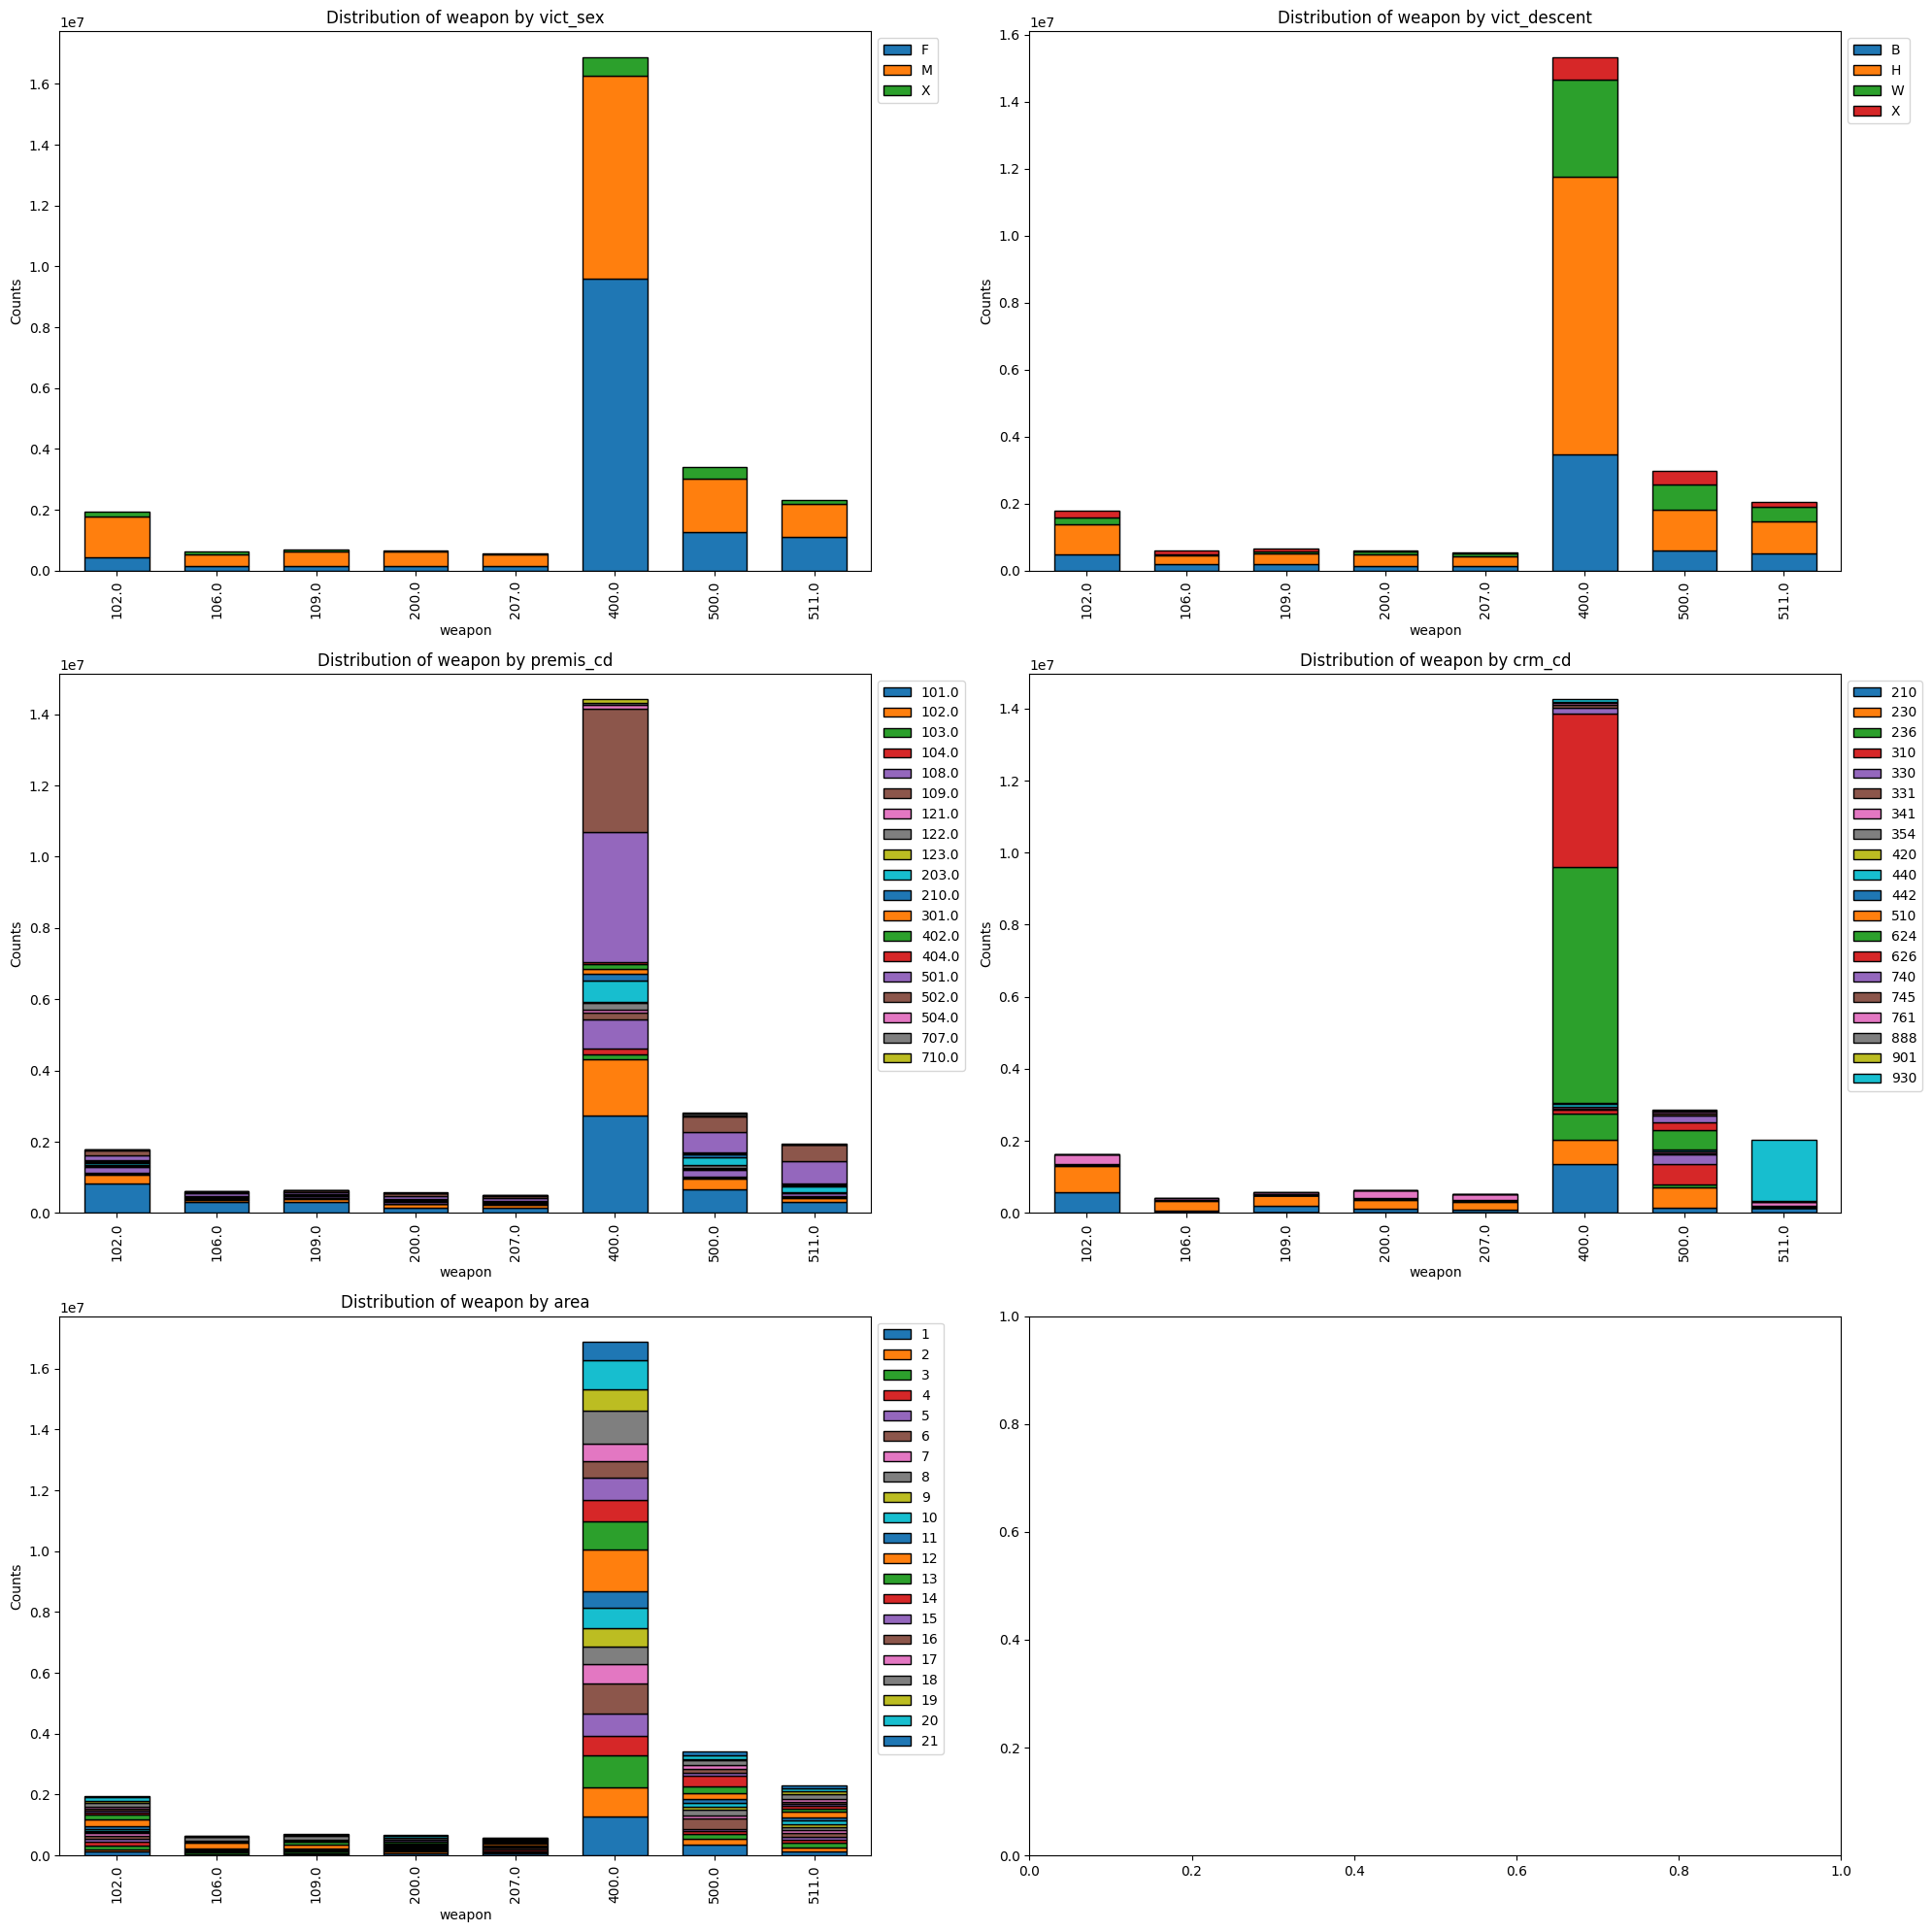

In [41]:
doBarplotWithHue(data=df_complete[cat_cols], normalize=False, filterPercentage=85)

### Stacked barplots for each categorical feature vs other categorical features (Normalized)
The y-axis is the percentage of each combination for the feature in x-axis.

In [42]:
df['date occ'] = pd.to_datetime(df['date occ'], format='%m/%d/%Y %I:%M:%S %p')
df['date'] = df['date occ'].dt.strftime('%d')
df['month'] = df['date occ'].dt.strftime('%m')
df['year'] = df['date occ'].dt.strftime('%Y')
df['time'] = df['date occ'].dt.strftime('%I:%M:%S %p')
df.columns

Index(['date occ', 'time', 'area', 'crm_cd', 'vict_age', 'vict_sex',
       'vict_descent', 'premis_cd', 'weapon', 'date', 'month', 'year'],
      dtype='object')

# Plot of Crime codes by month

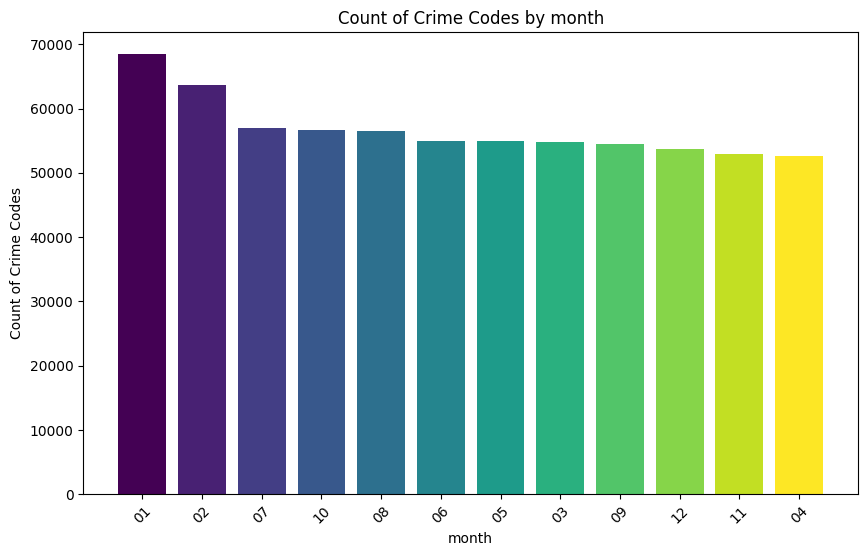

In [45]:
plotByCrmCD(df_complete, 'month');

# Plot of Crime codes by Area

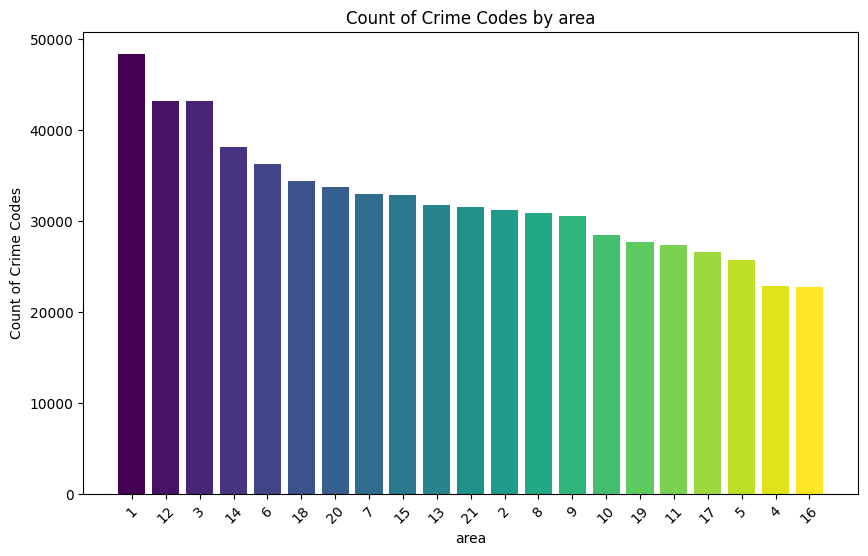

In [46]:
plotByCrmCD(df_complete, 'area');

# Plot of Victim genders grouped by Area

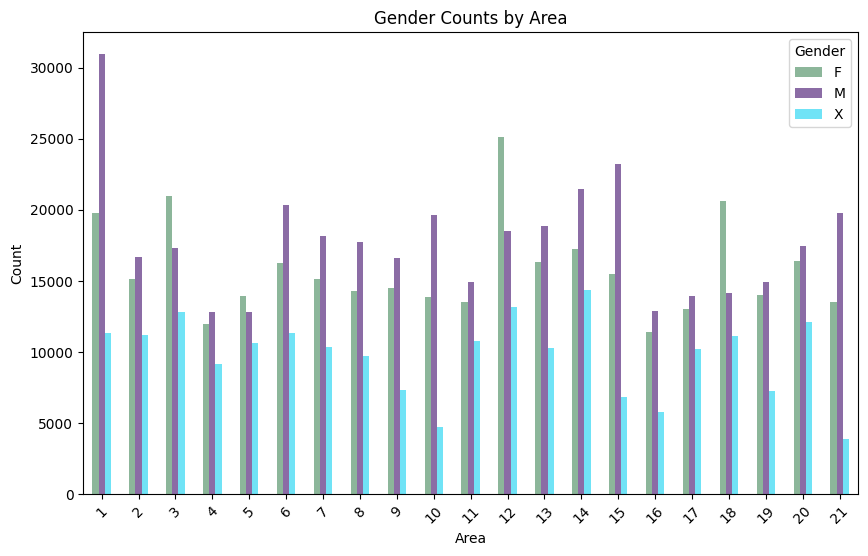

In [75]:
plotBarsByAreaAndGroupedValue(df_complete, 'vict_sex')

# Plot of Victim descent [White, African American and Hispanic] grouped by Area

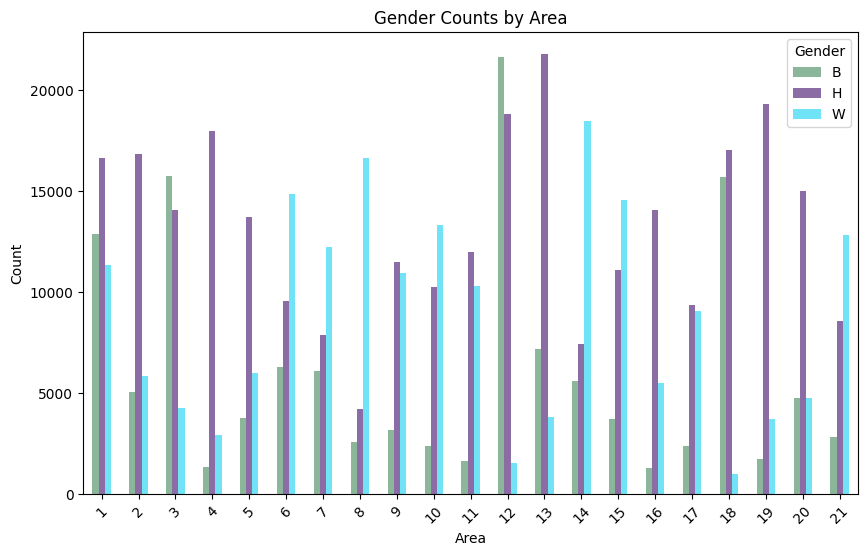

In [76]:
df_filtered = df_complete[df_complete['vict_descent'].isin(['B','W','H'])]
plotBarsByAreaAndGroupedValue(df_filtered, 'vict_descent')

# Plot of Top 20 Crime codes with their counts

<Figure size 1200x600 with 0 Axes>

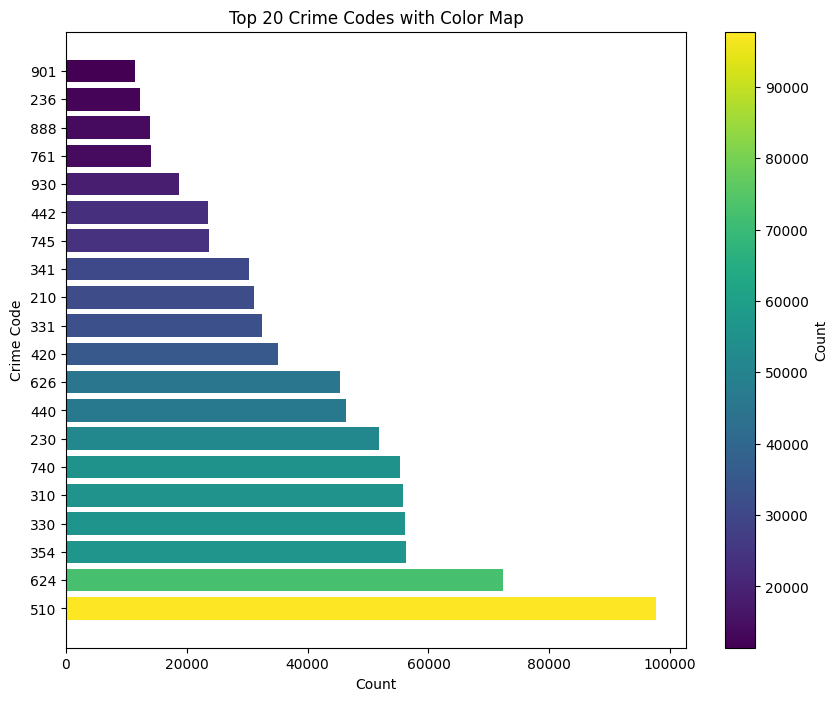

In [86]:
crime_code_counts = df_complete['crm_cd'].value_counts().sort_index()
plt.figure(figsize=(12, 6))

top_n = 20
crime_code_counts_top_n = crime_code_counts.nlargest(top_n)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Generate a range of colors using a colormap
# Normalize the crime_code_counts values between 0 and 1 to map to the colormap
norm = plt.Normalize(crime_code_counts_top_n.min(), crime_code_counts_top_n.max())
colors = cm.viridis(norm(crime_code_counts_top_n.values))

# Create the horizontal bar plot
bars = ax.barh(crime_code_counts_top_n.index.astype(str), crime_code_counts_top_n.values, color=colors)

# Add a colorbar to the plot to show the mapping from counts to colors
sm = cm.ScalarMappable(cmap=cm.viridis, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Count')

# Set labels and title
ax.set_xlabel('Count')
ax.set_ylabel('Crime Code')
ax.set_title('Top 20 Crime Codes with Color Map')

plt.show()

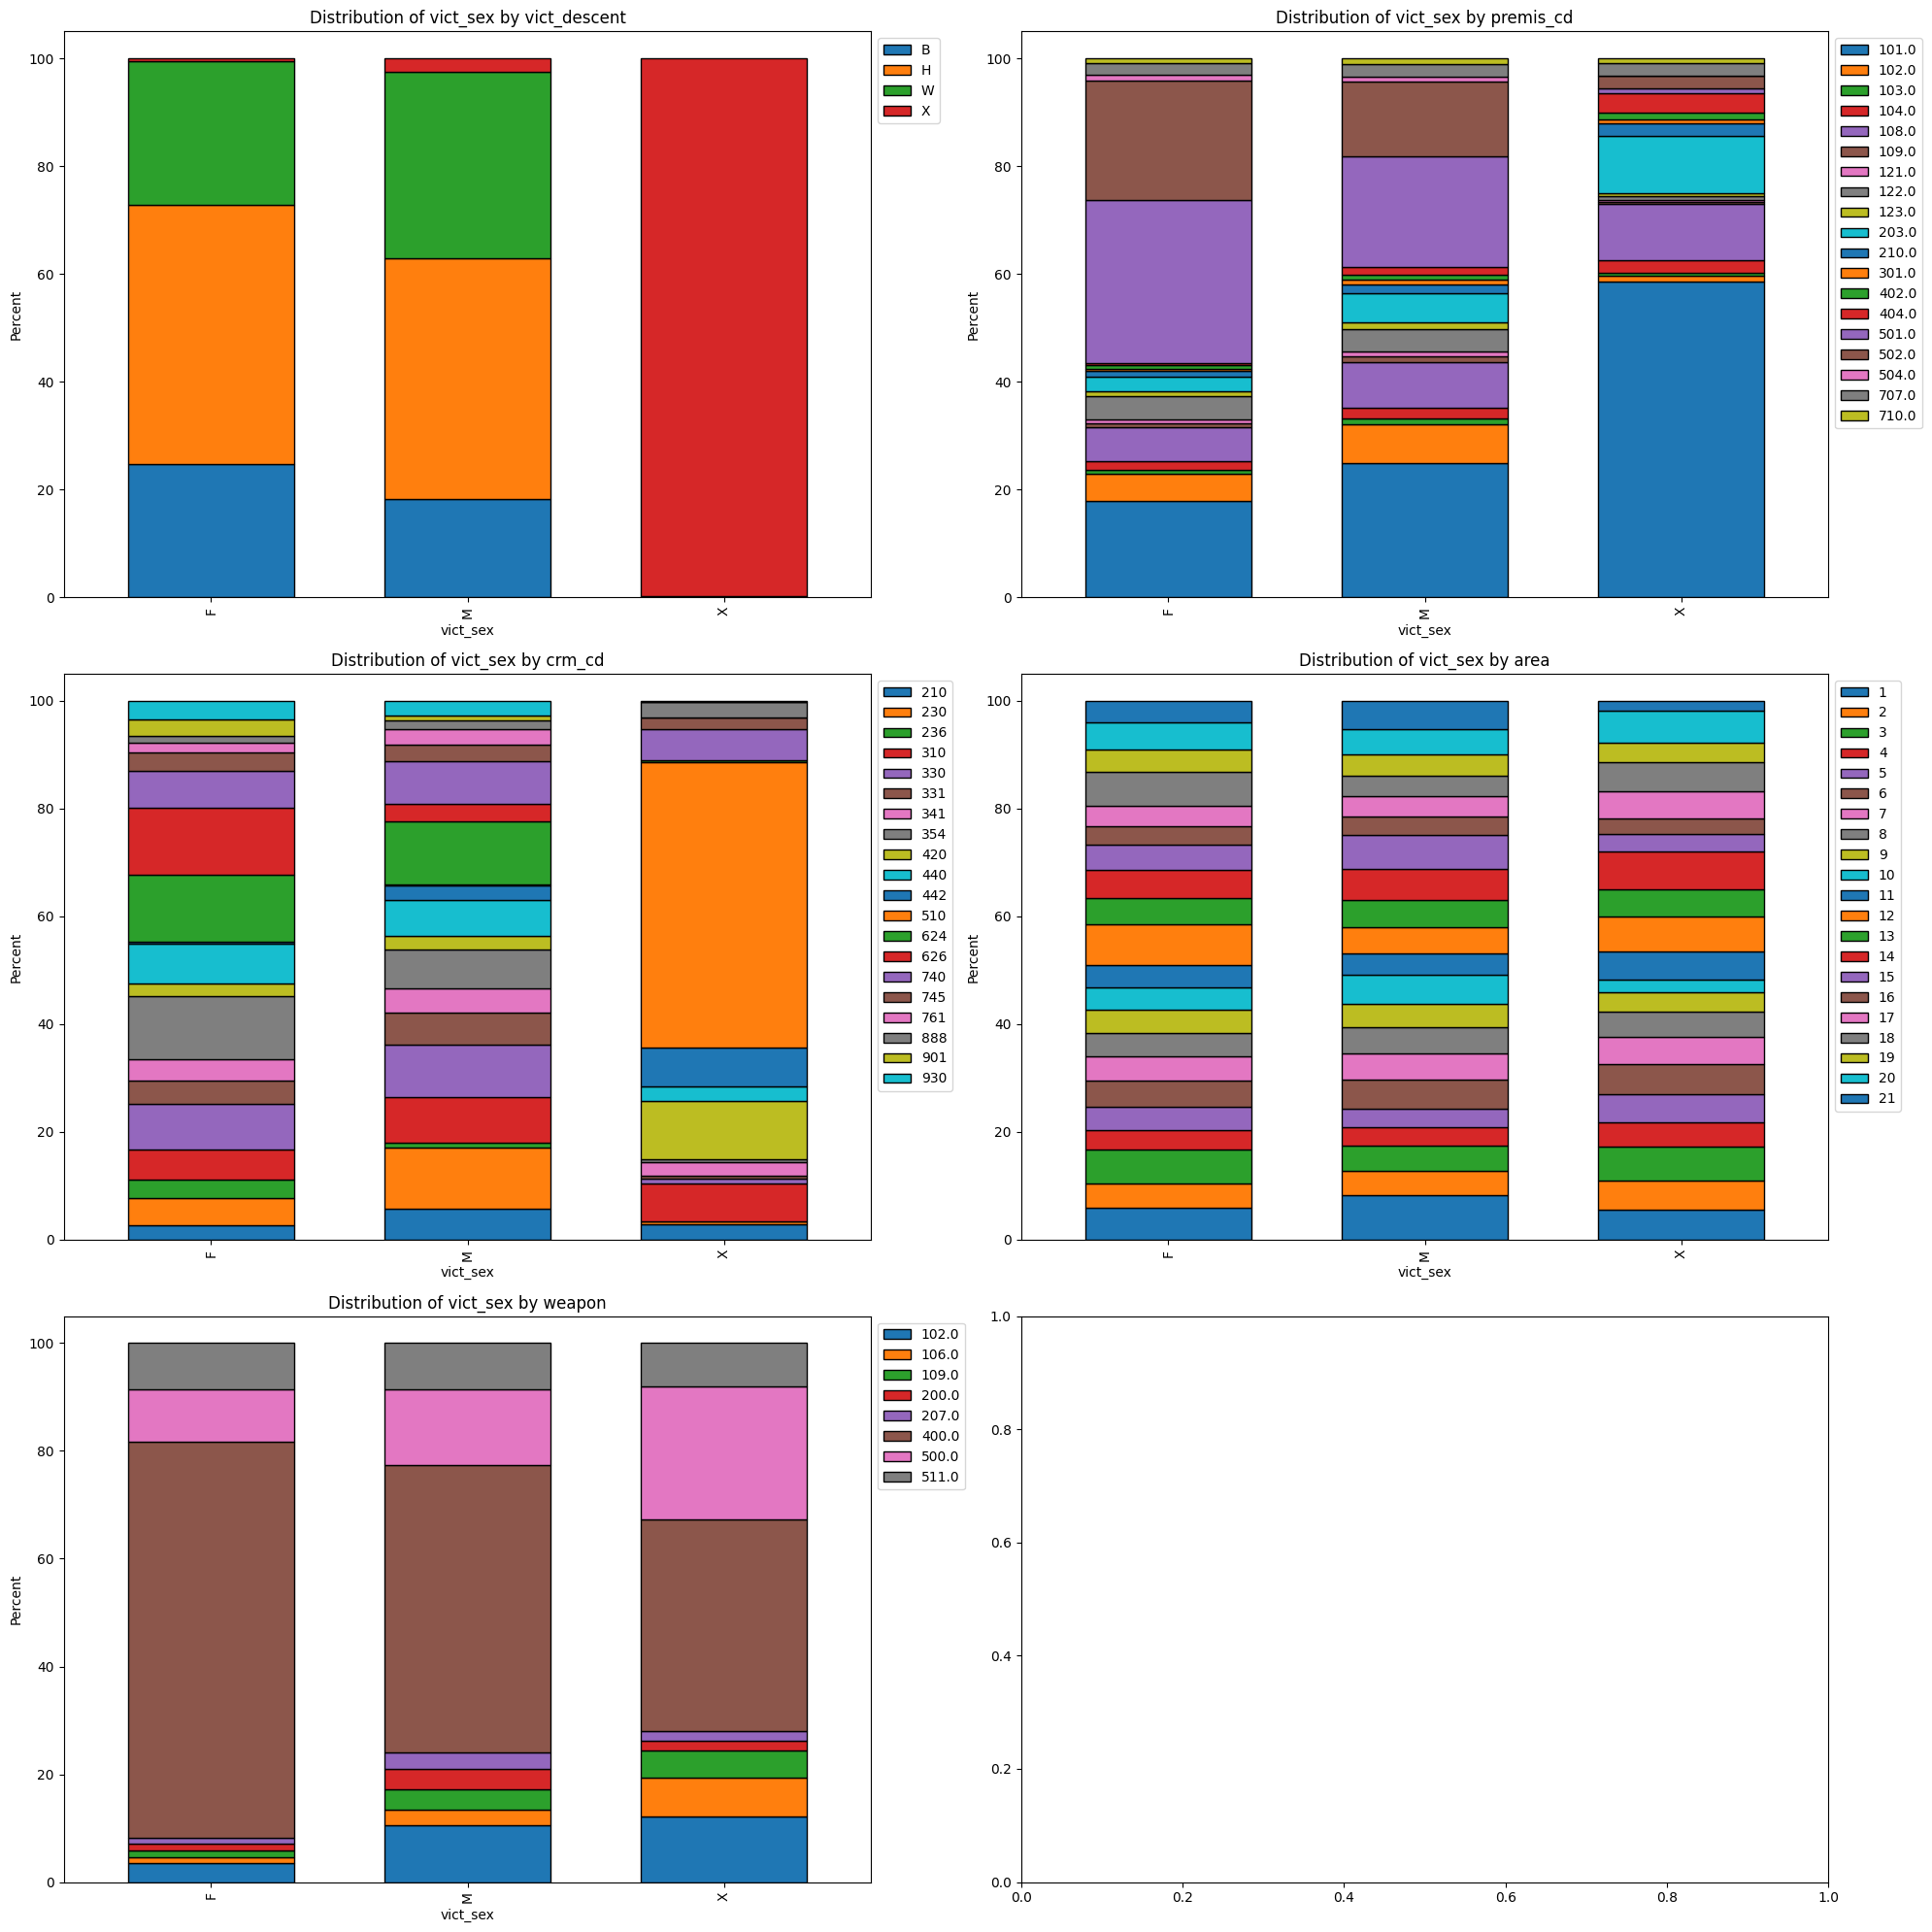

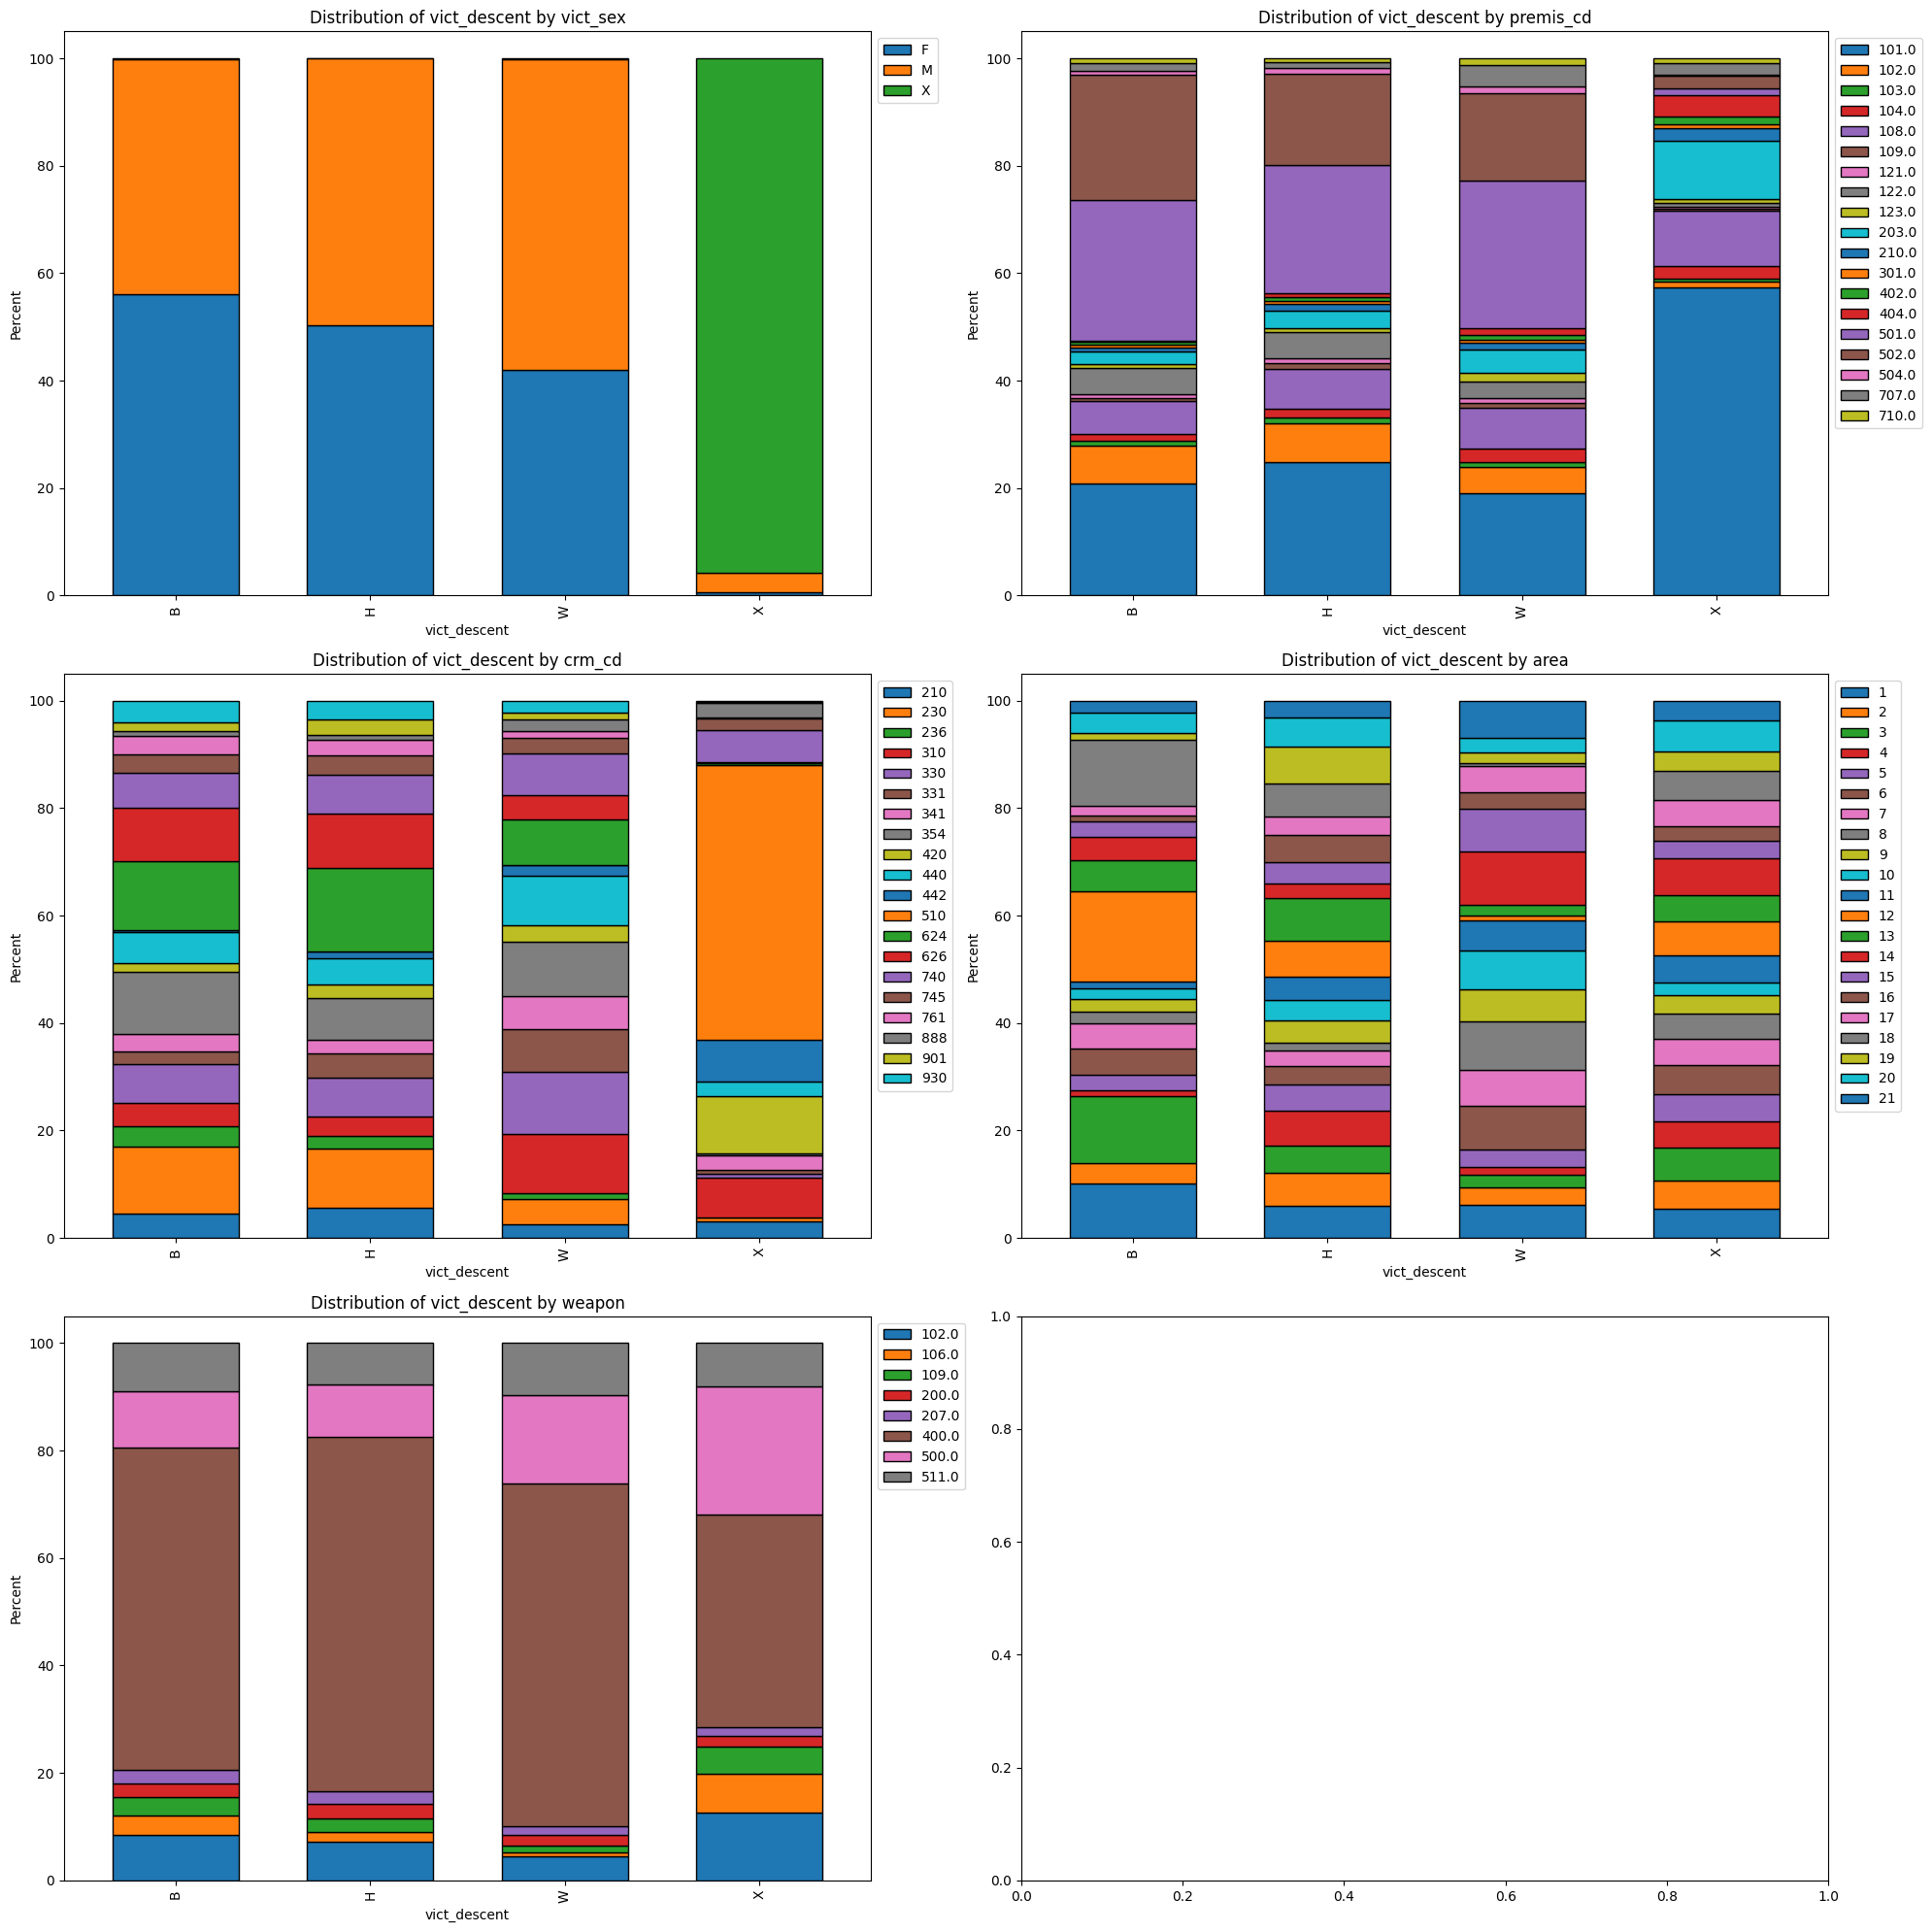

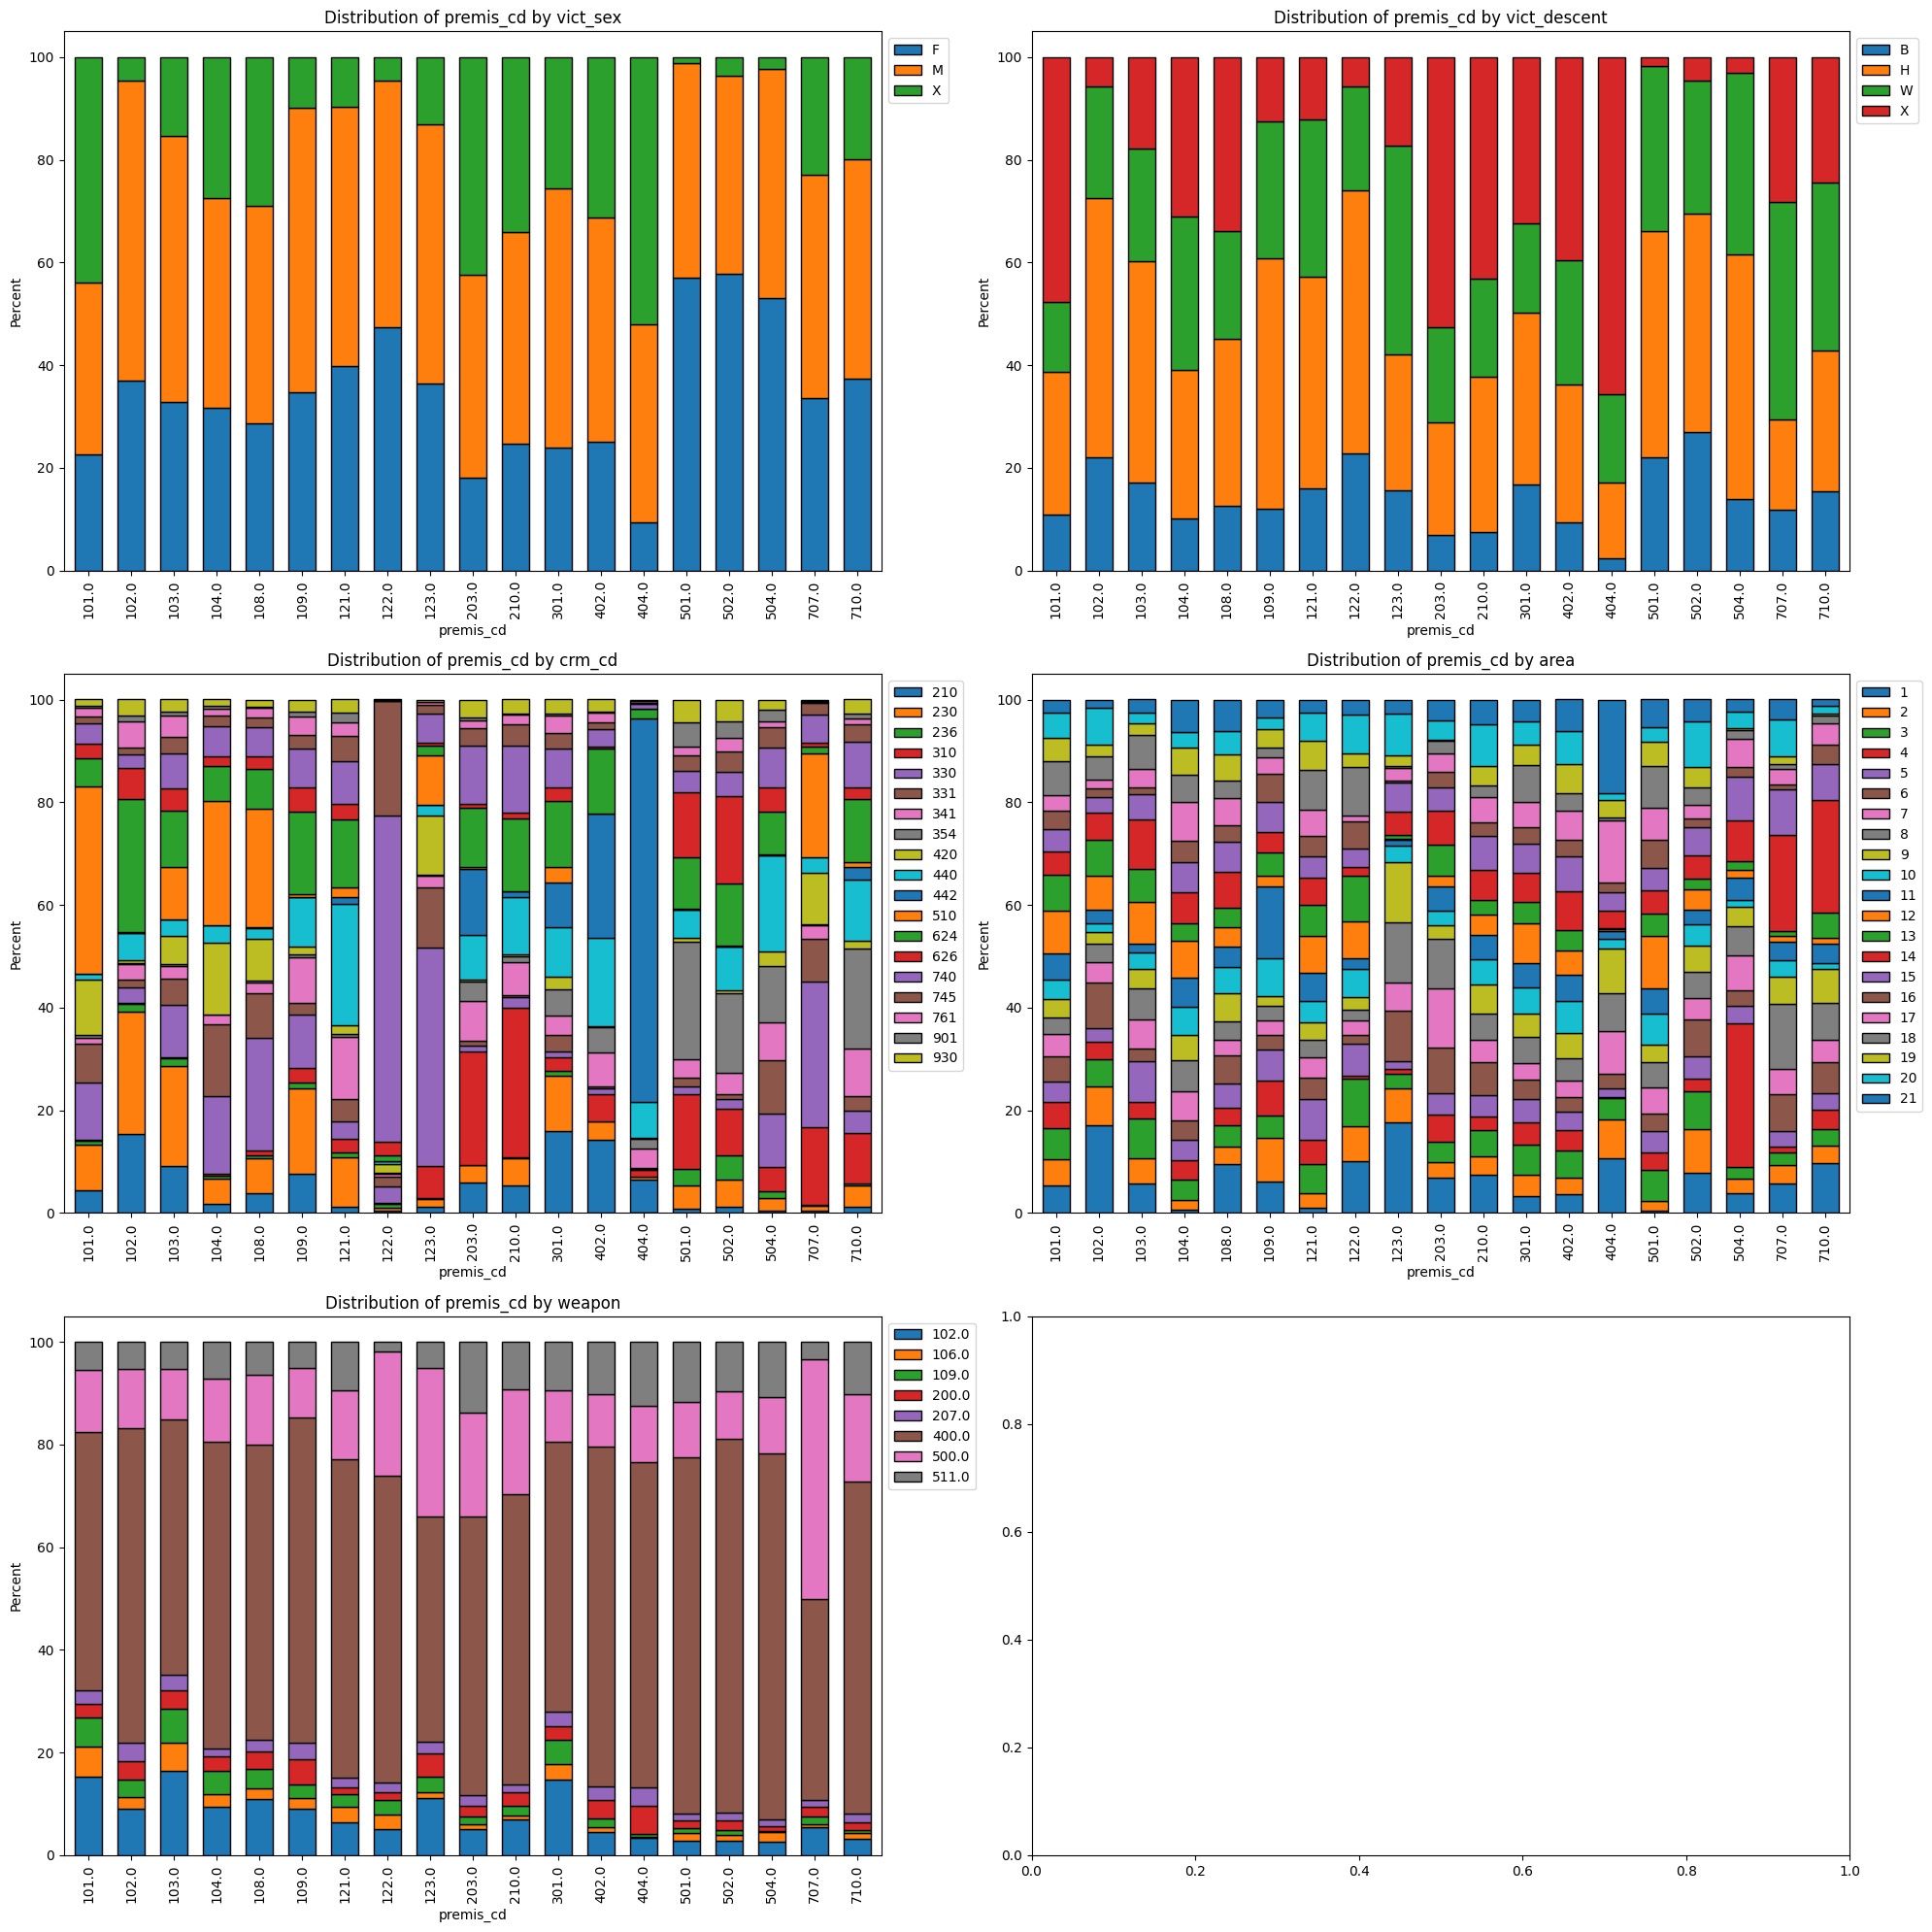

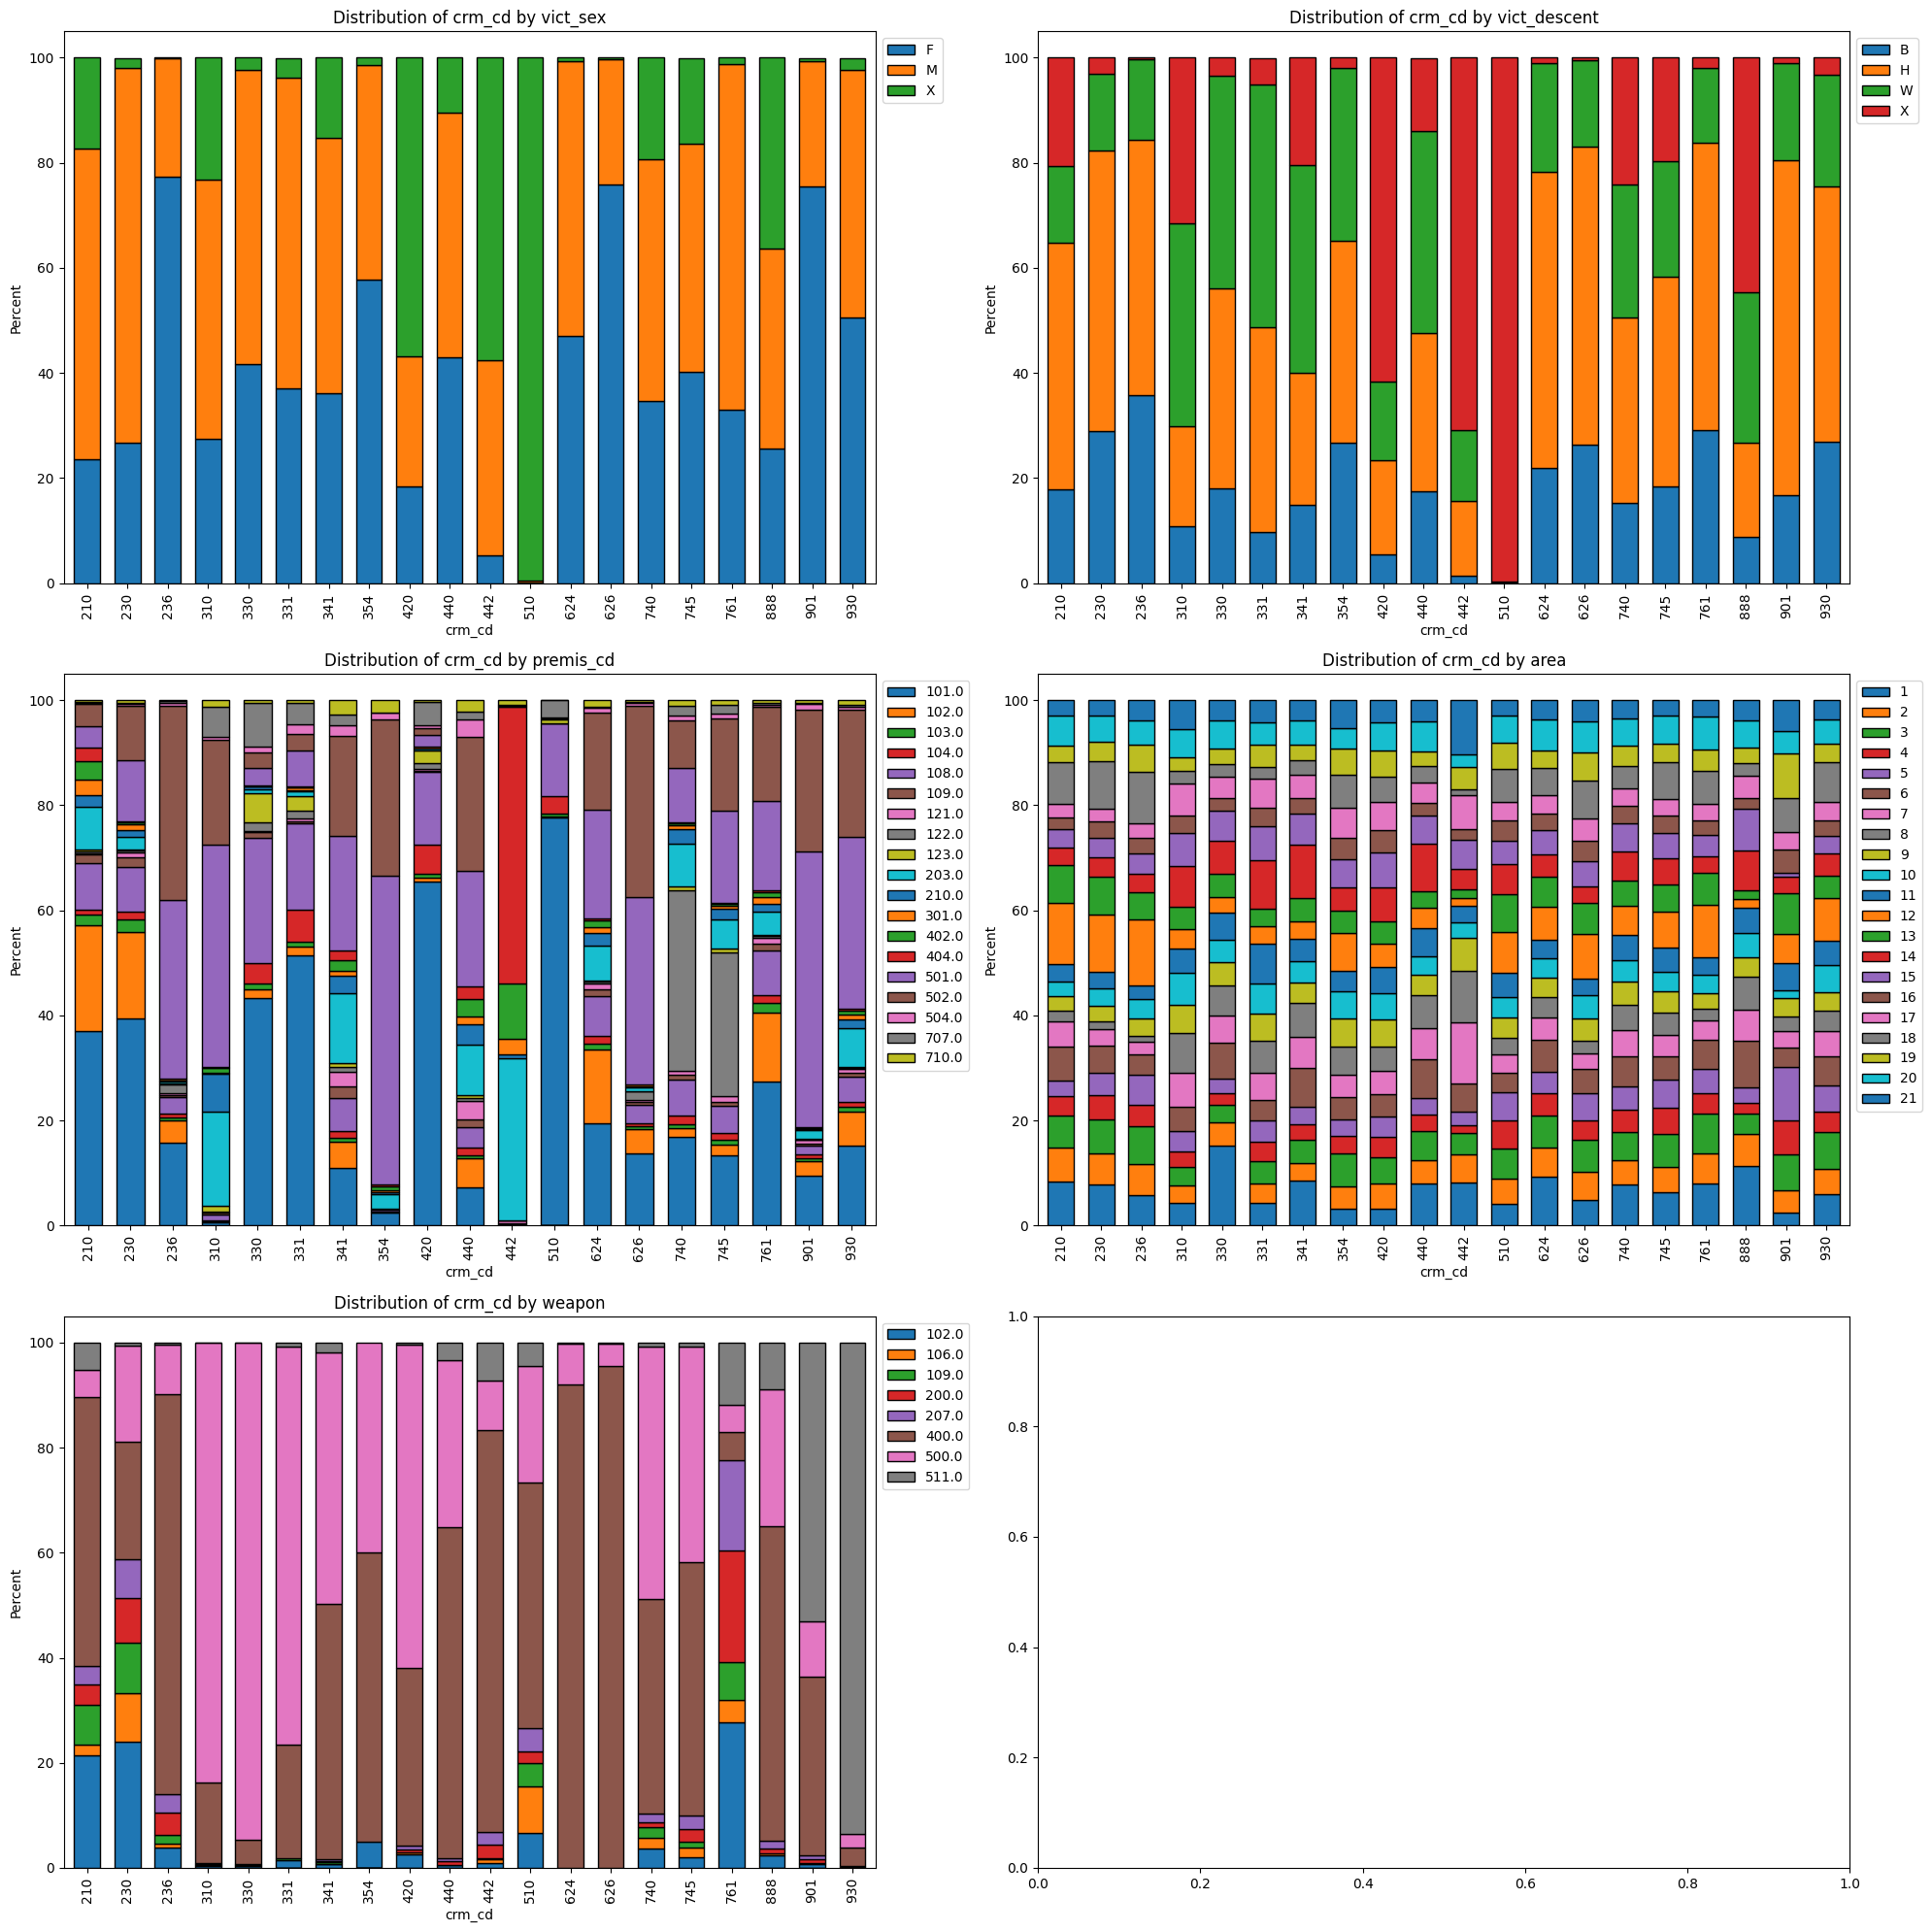

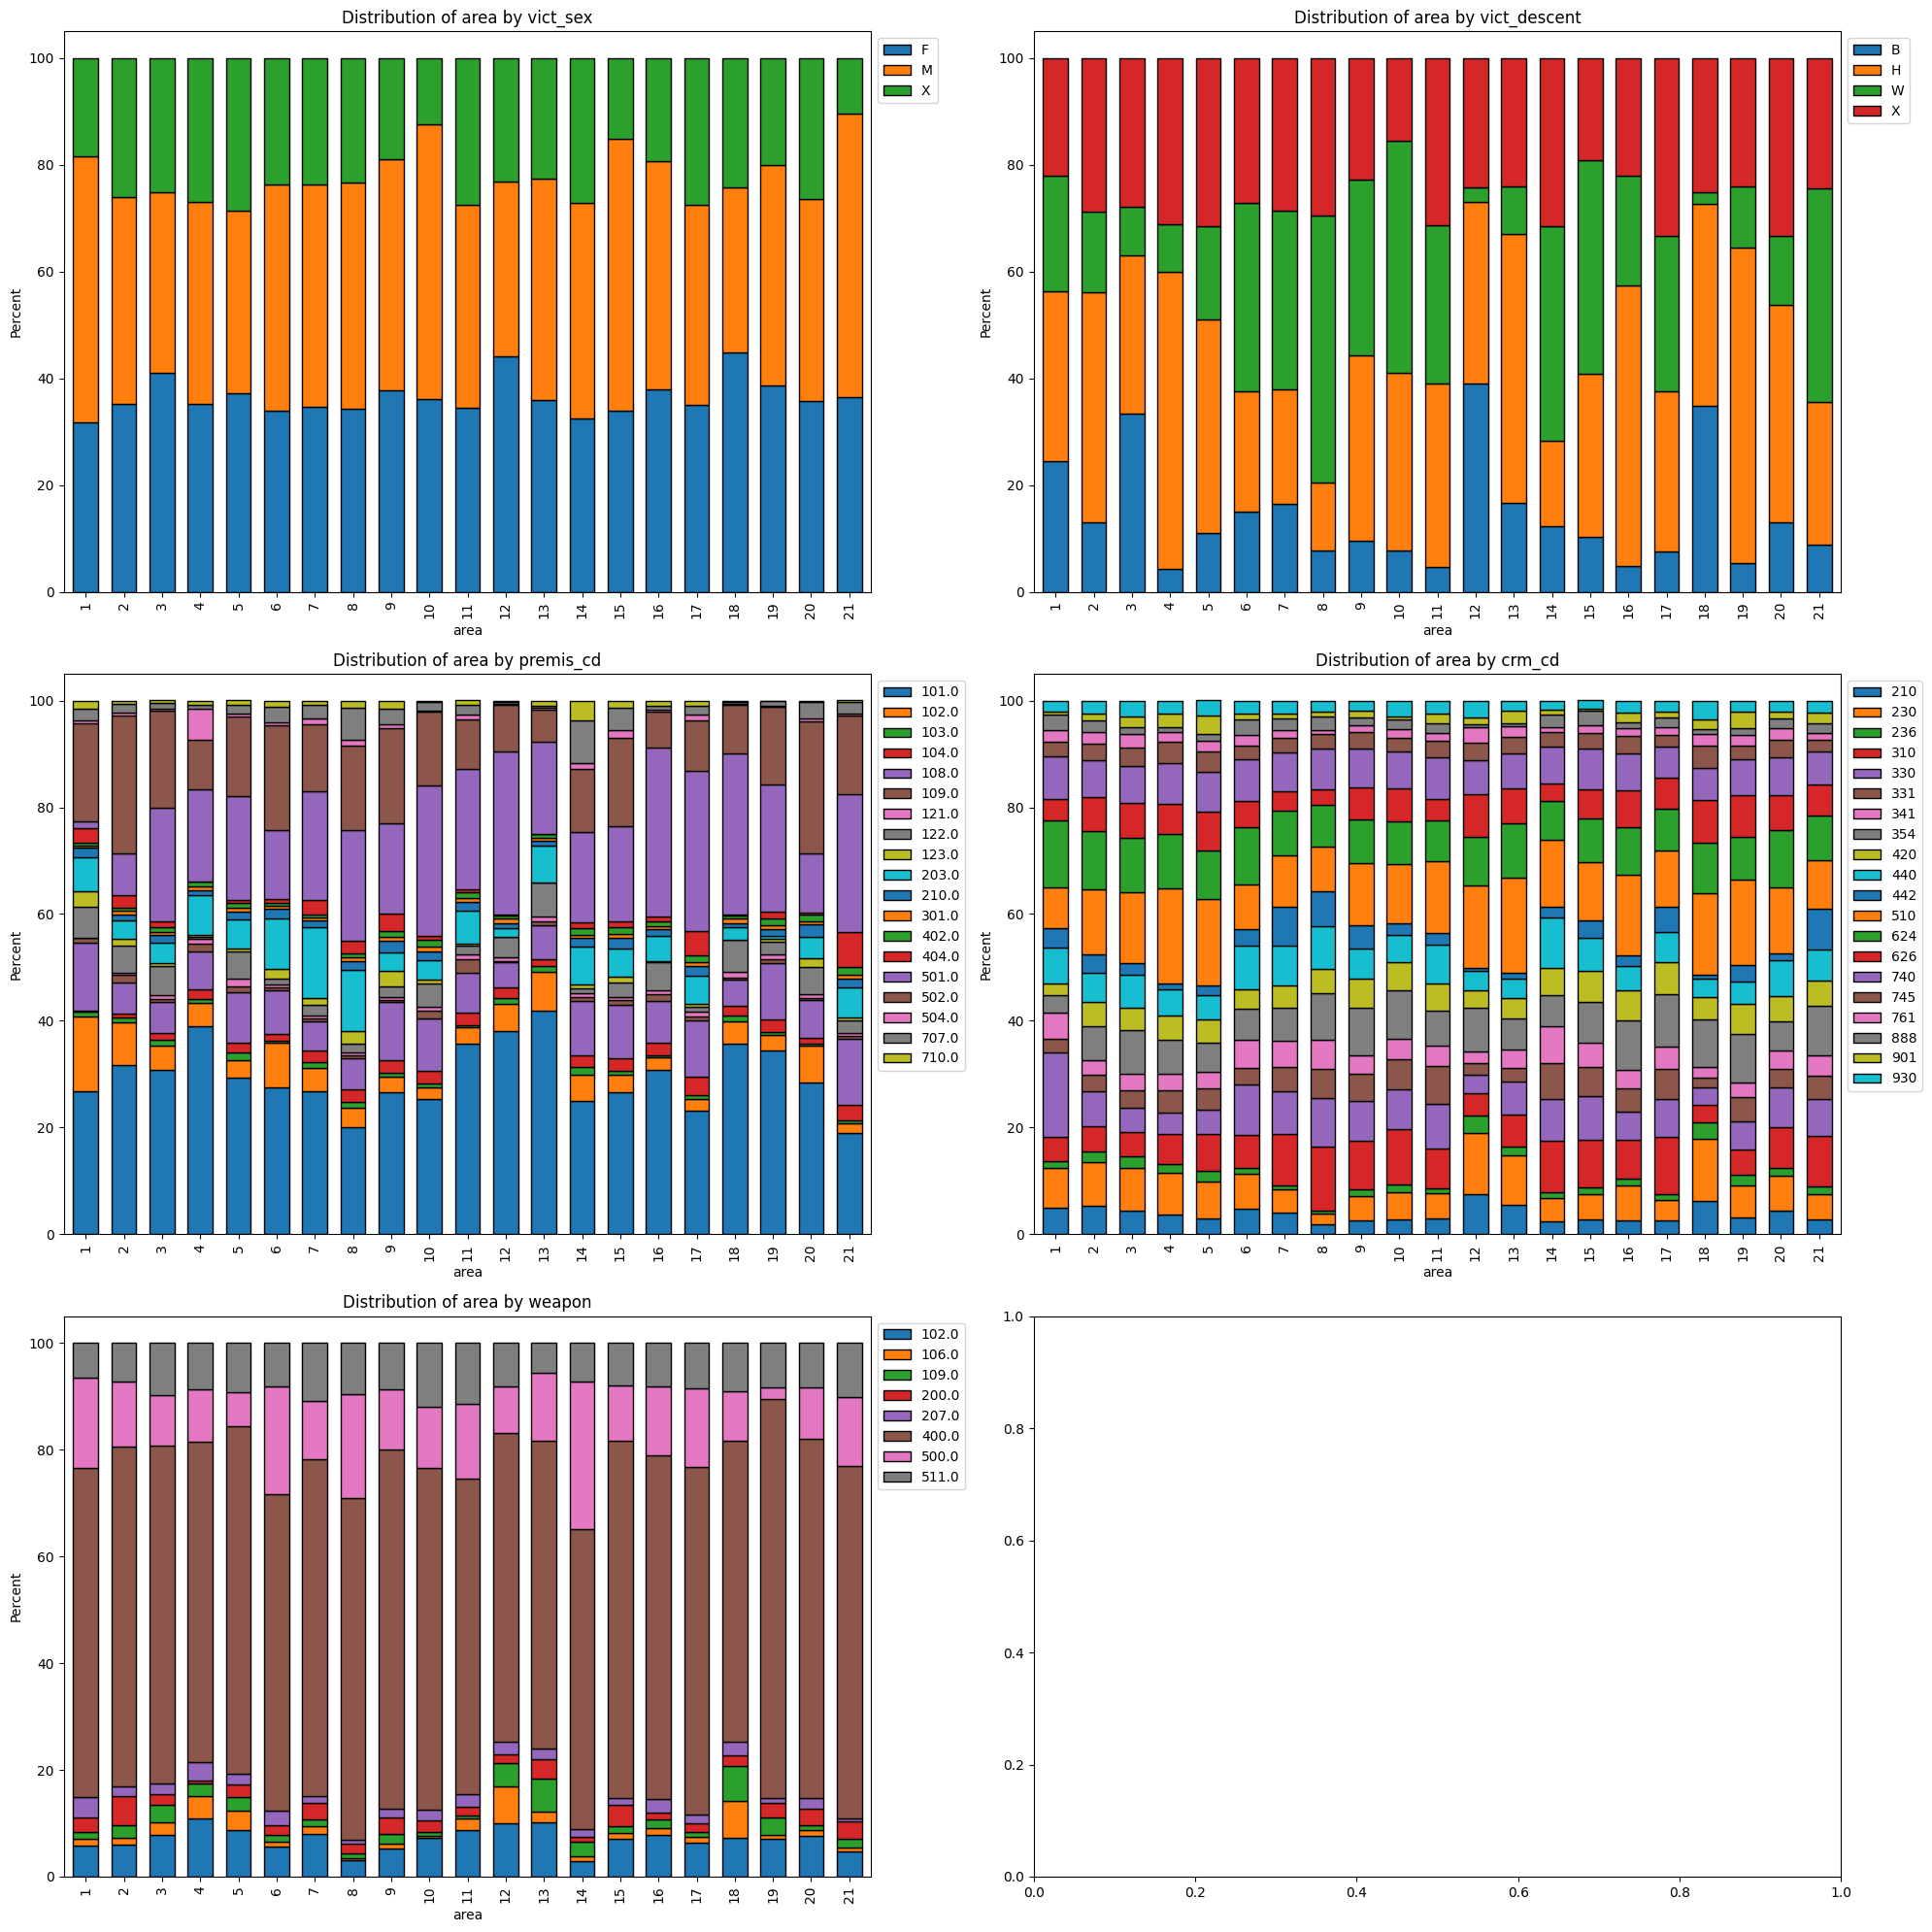

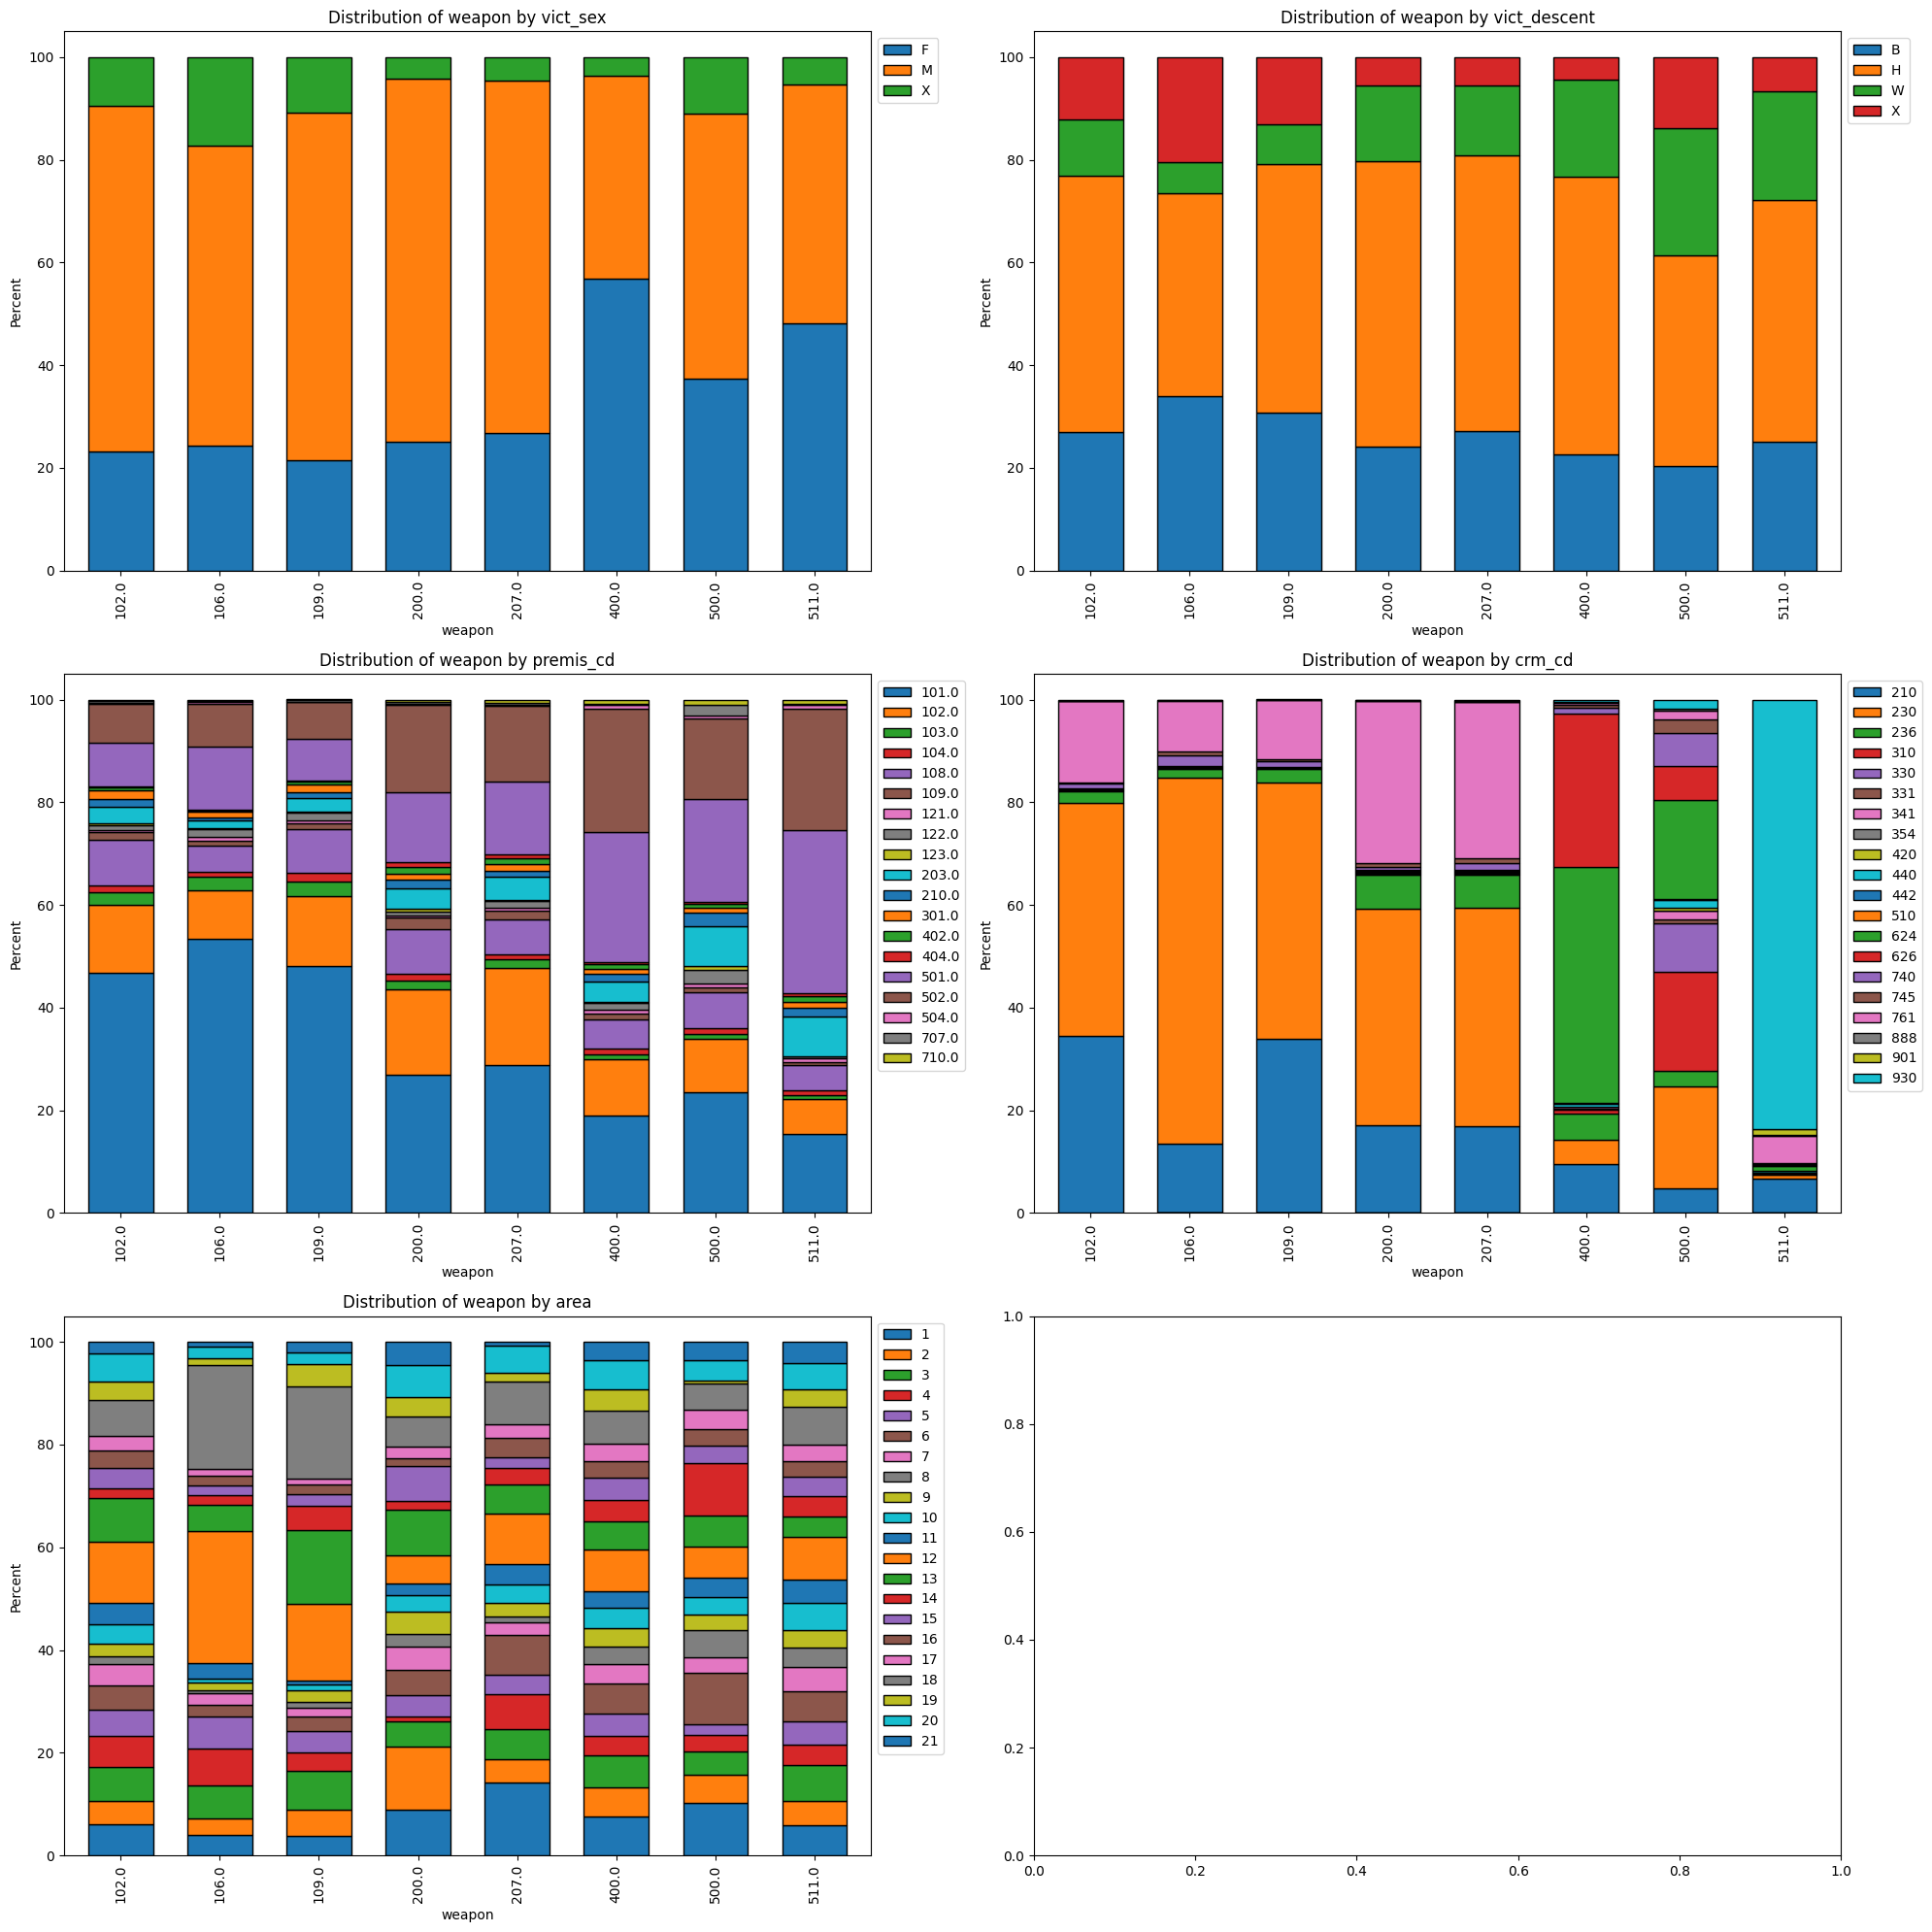

In [84]:
doBarplotWithHue(data=df_complete[cat_cols], normalize=True, filterPercentage=85)

### Heatmap for each categorical feature vs other categorical features
Colorbar is the number of combinations for the features in x and y axis

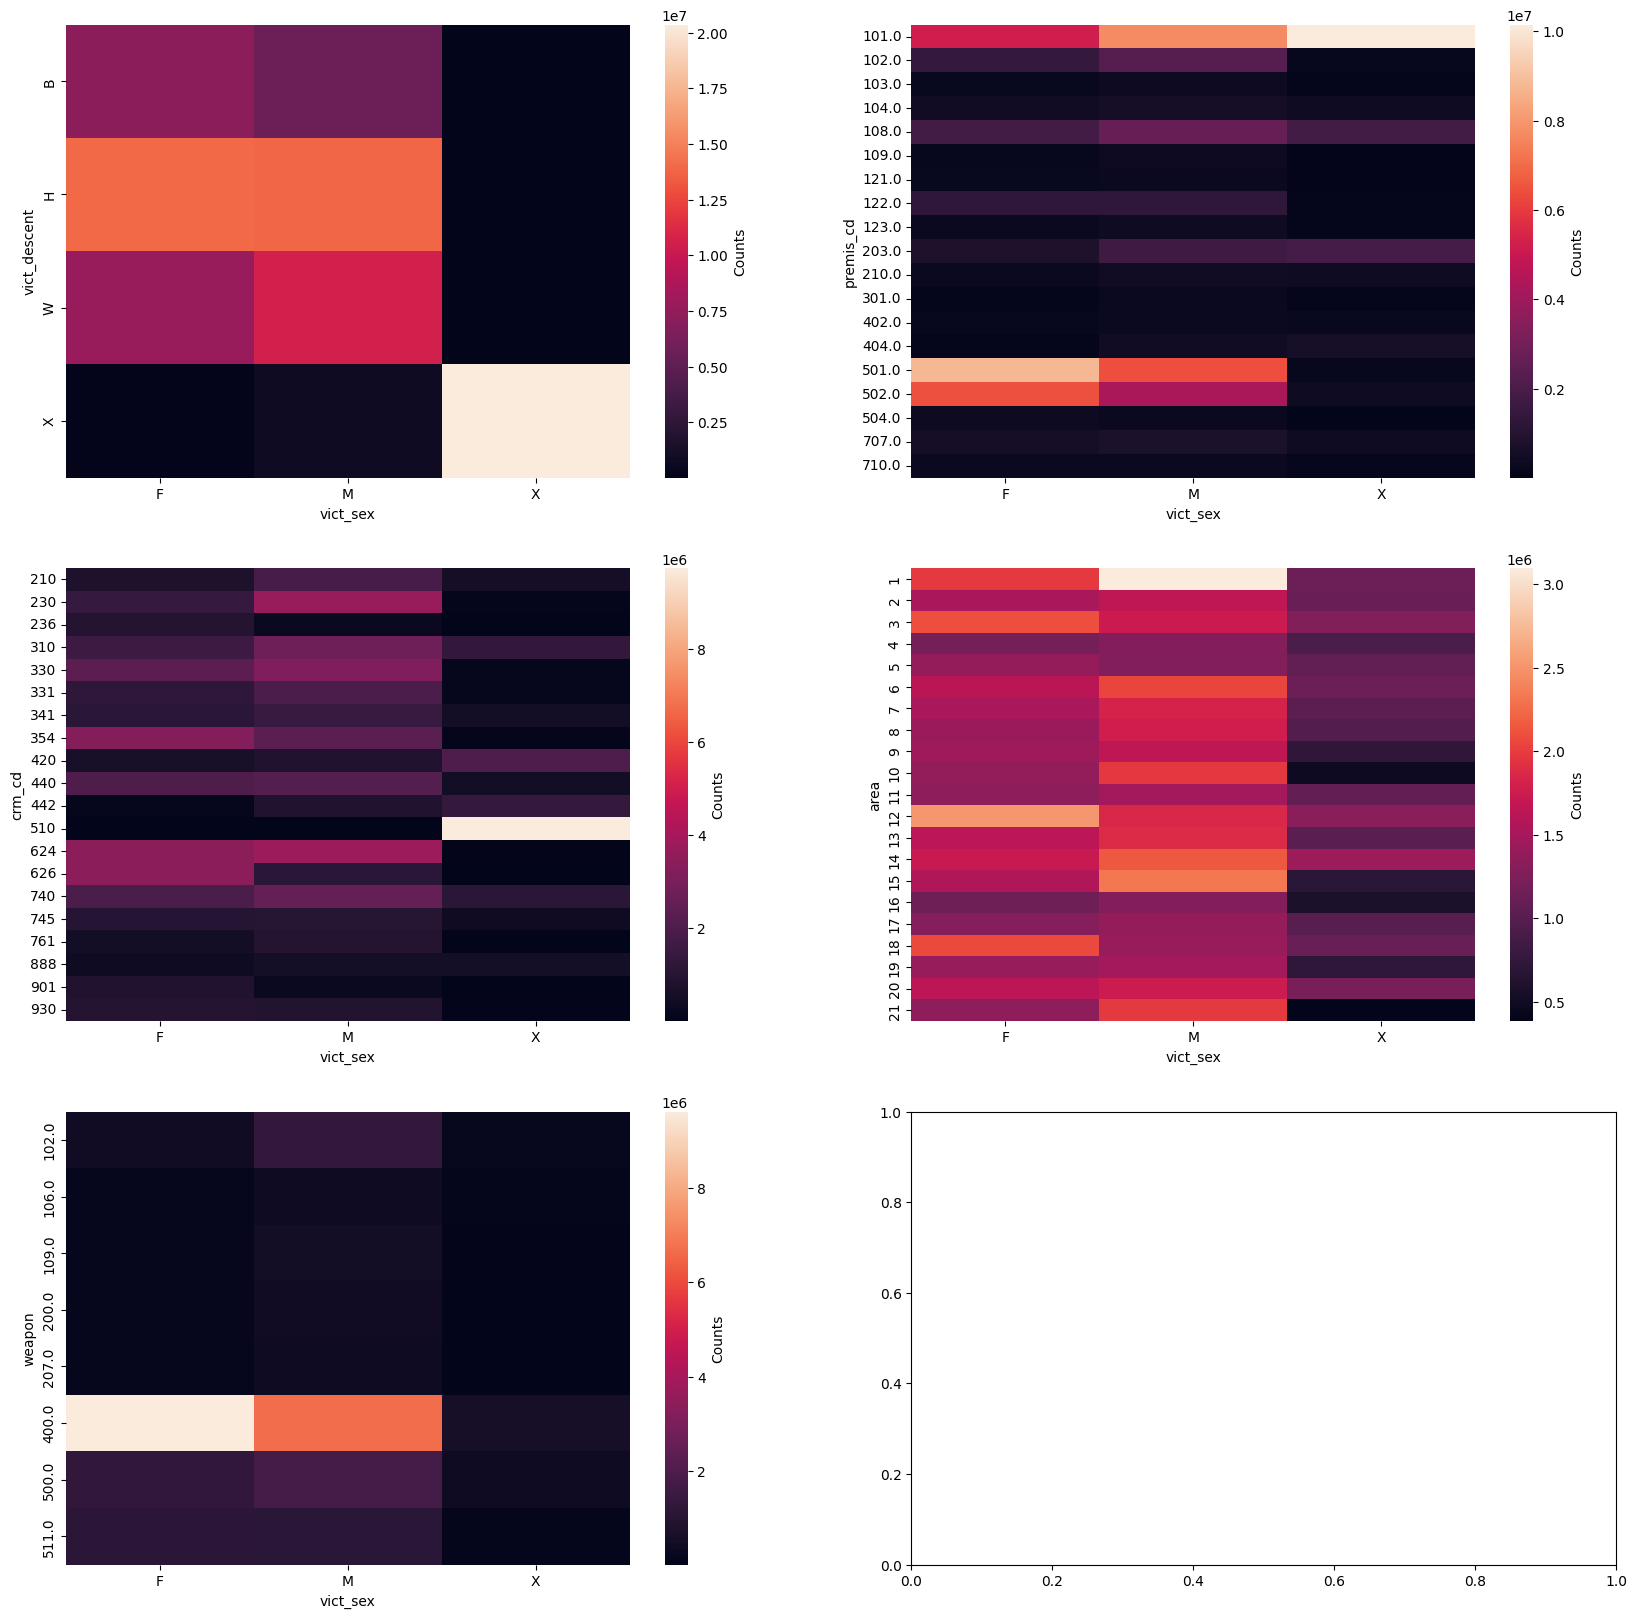

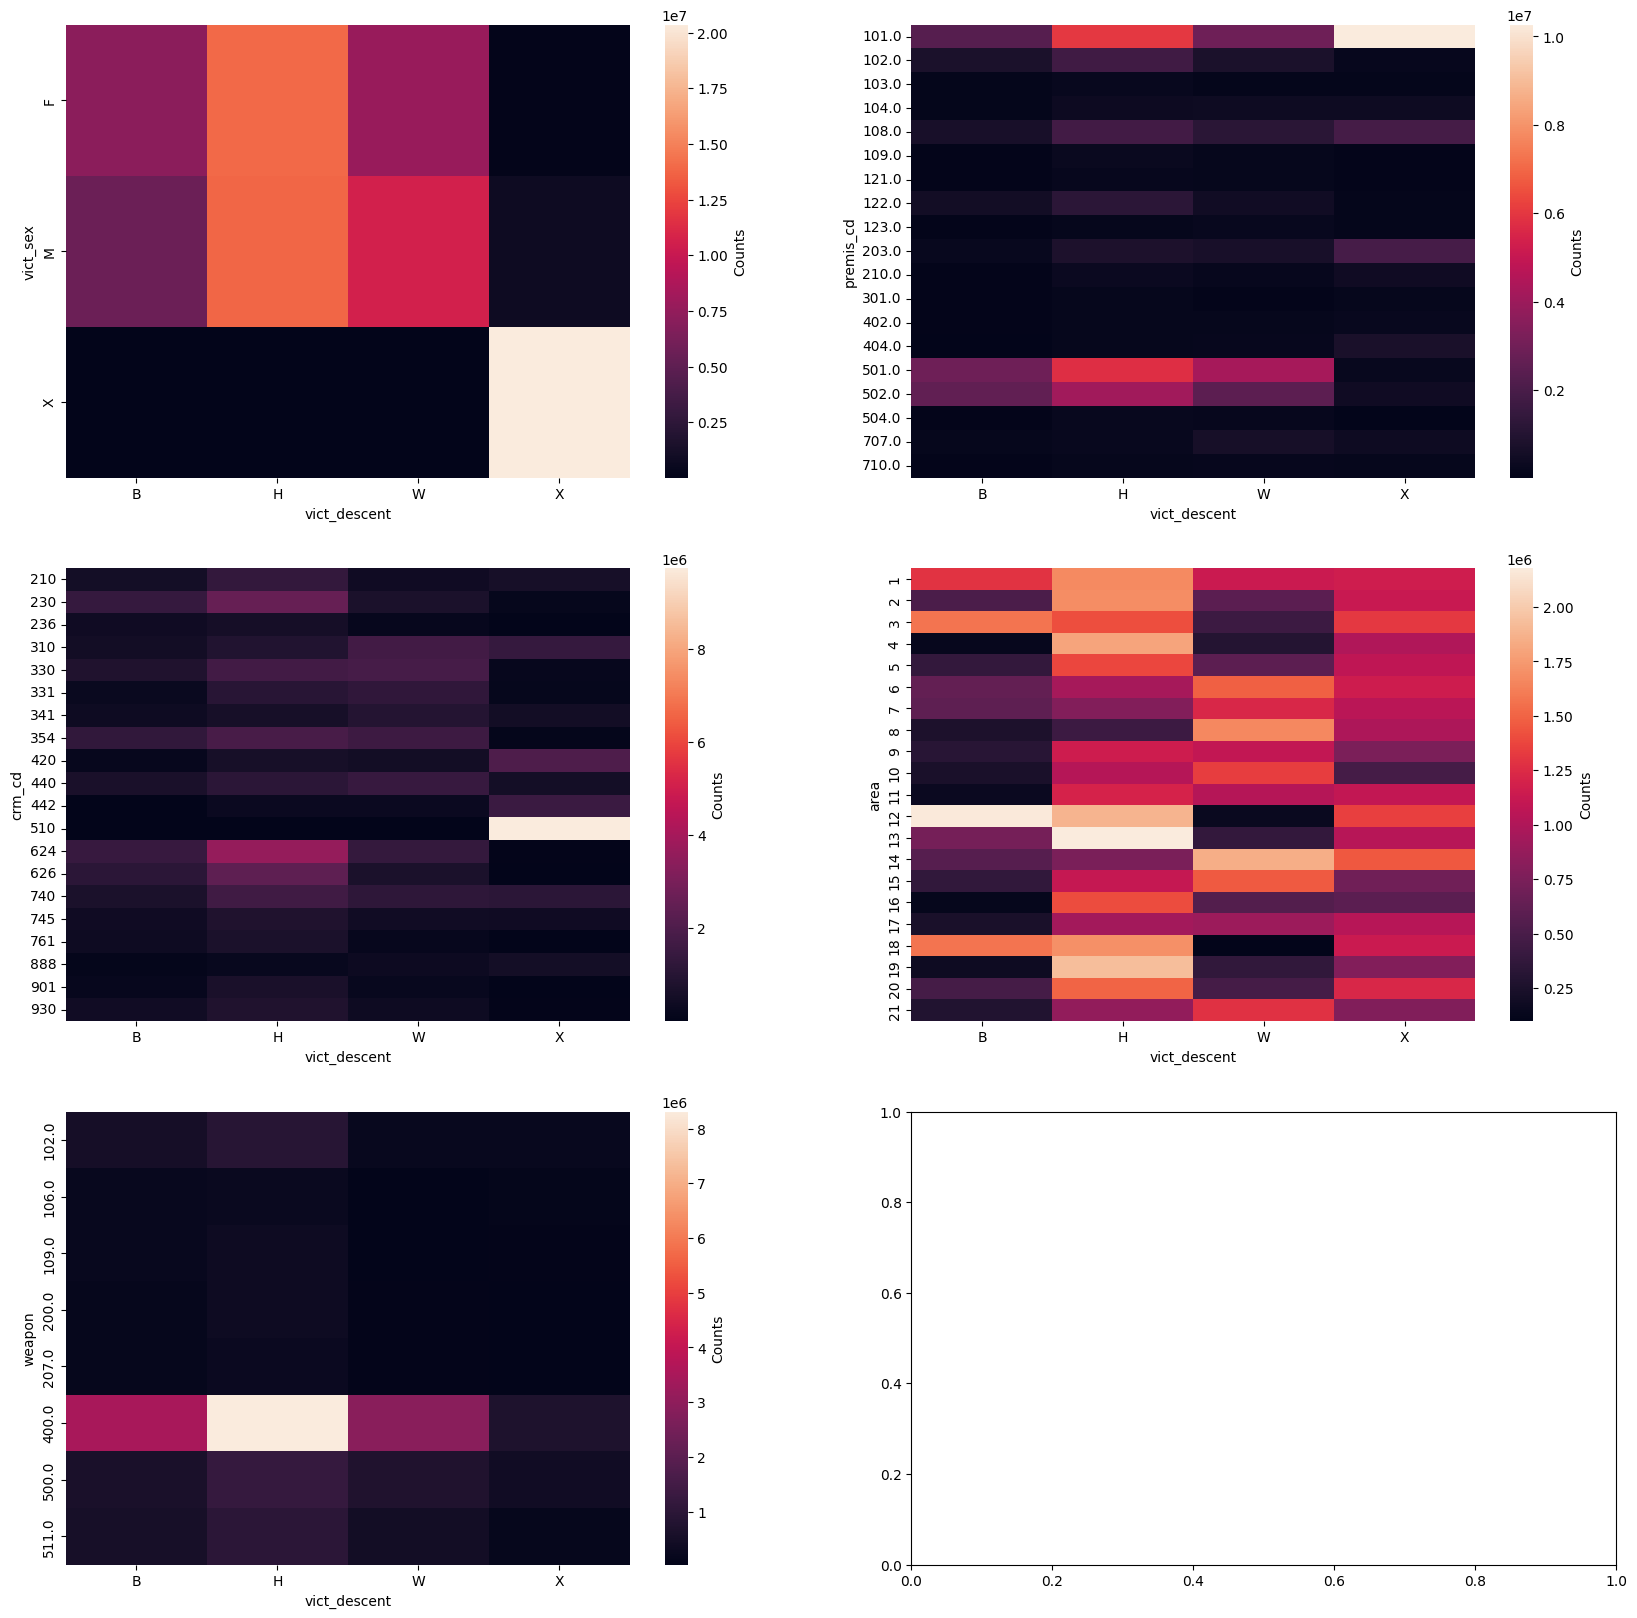

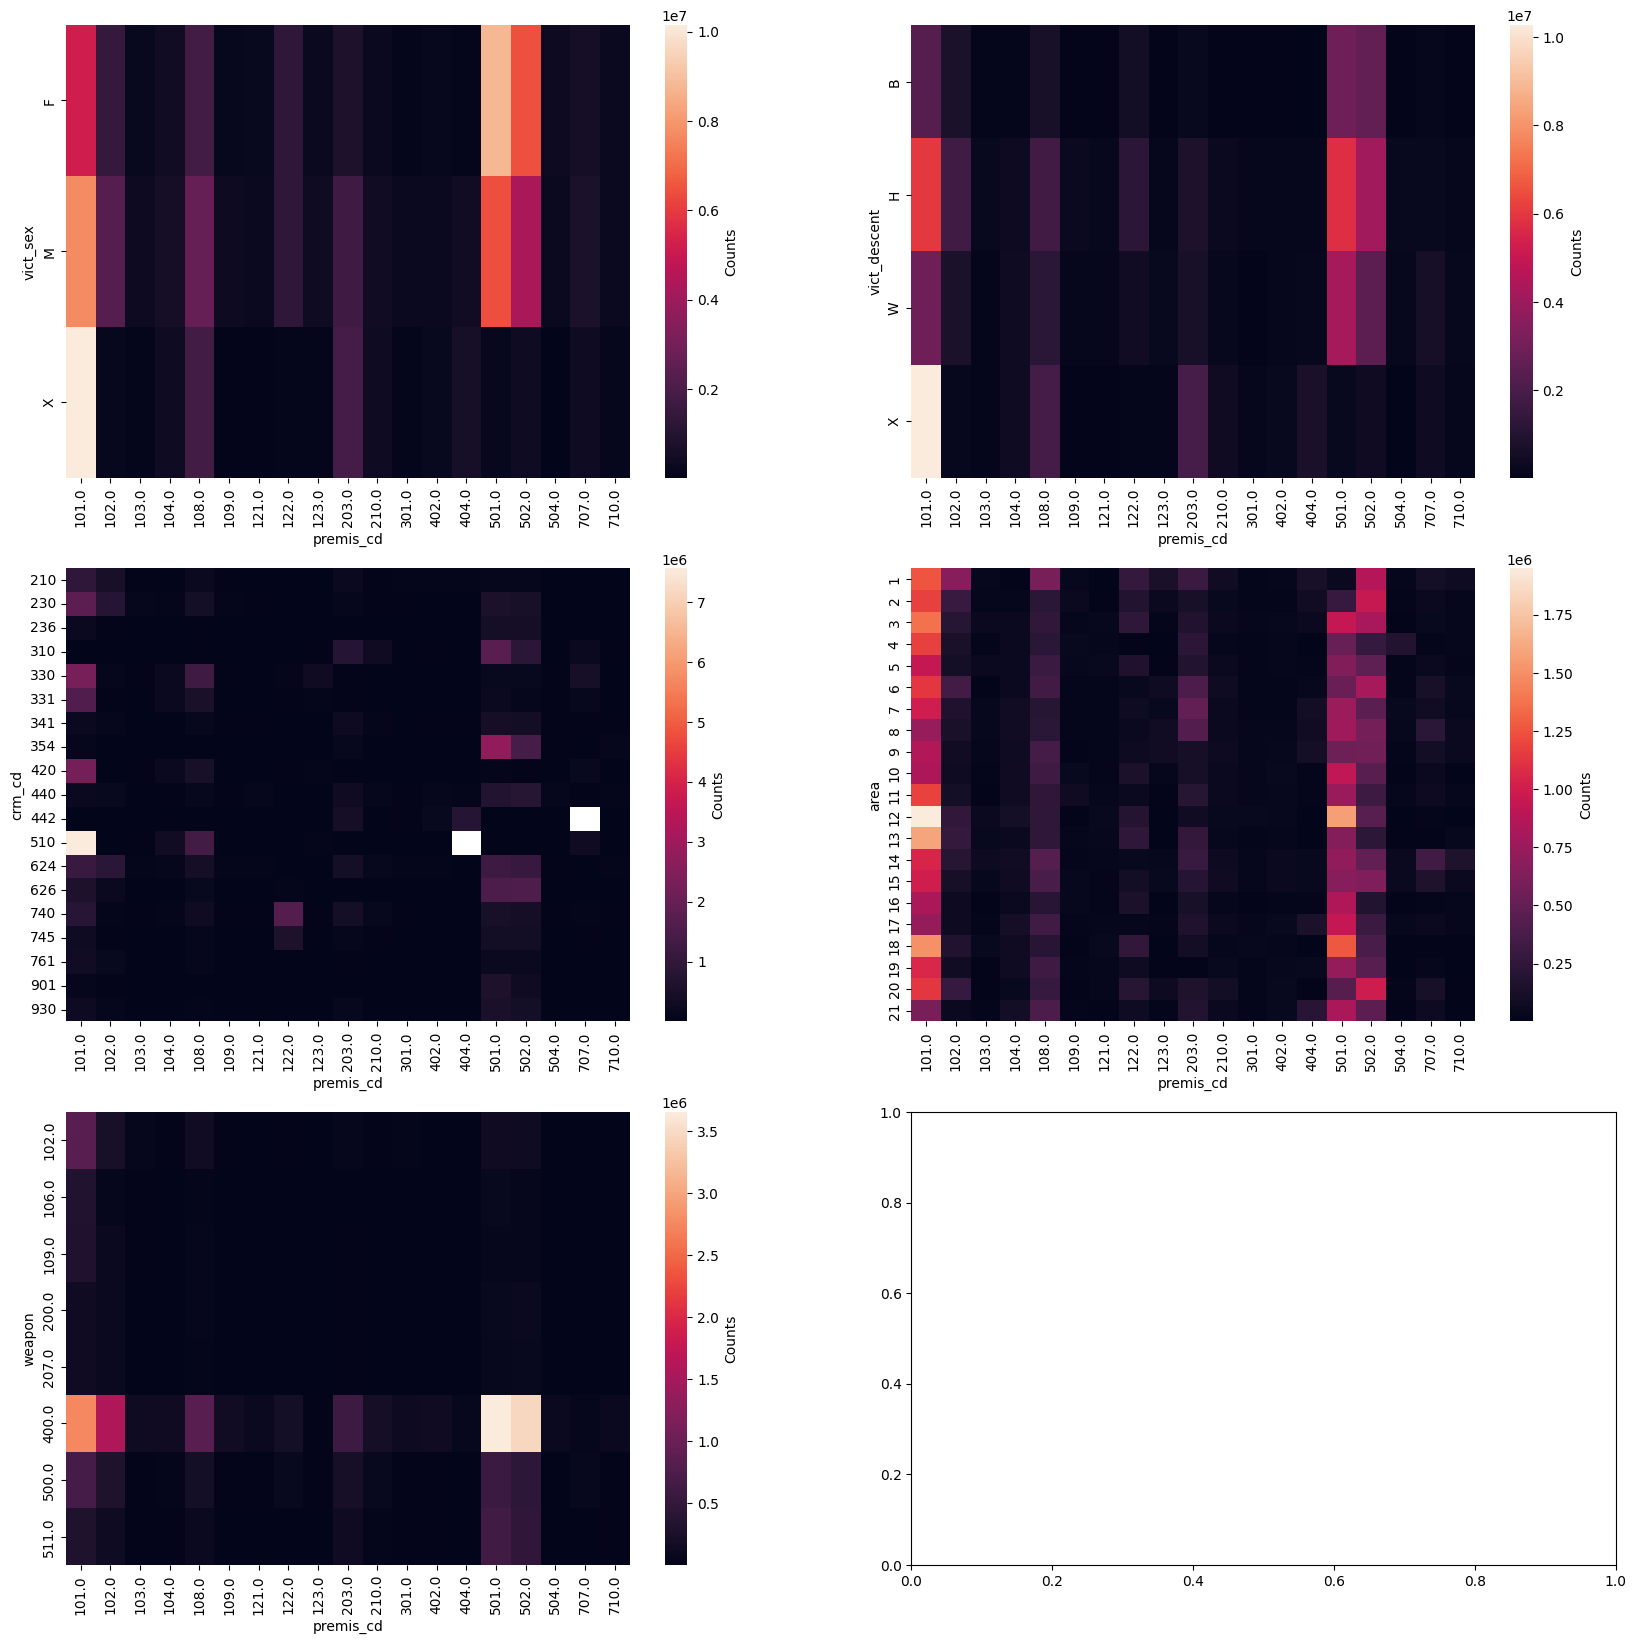

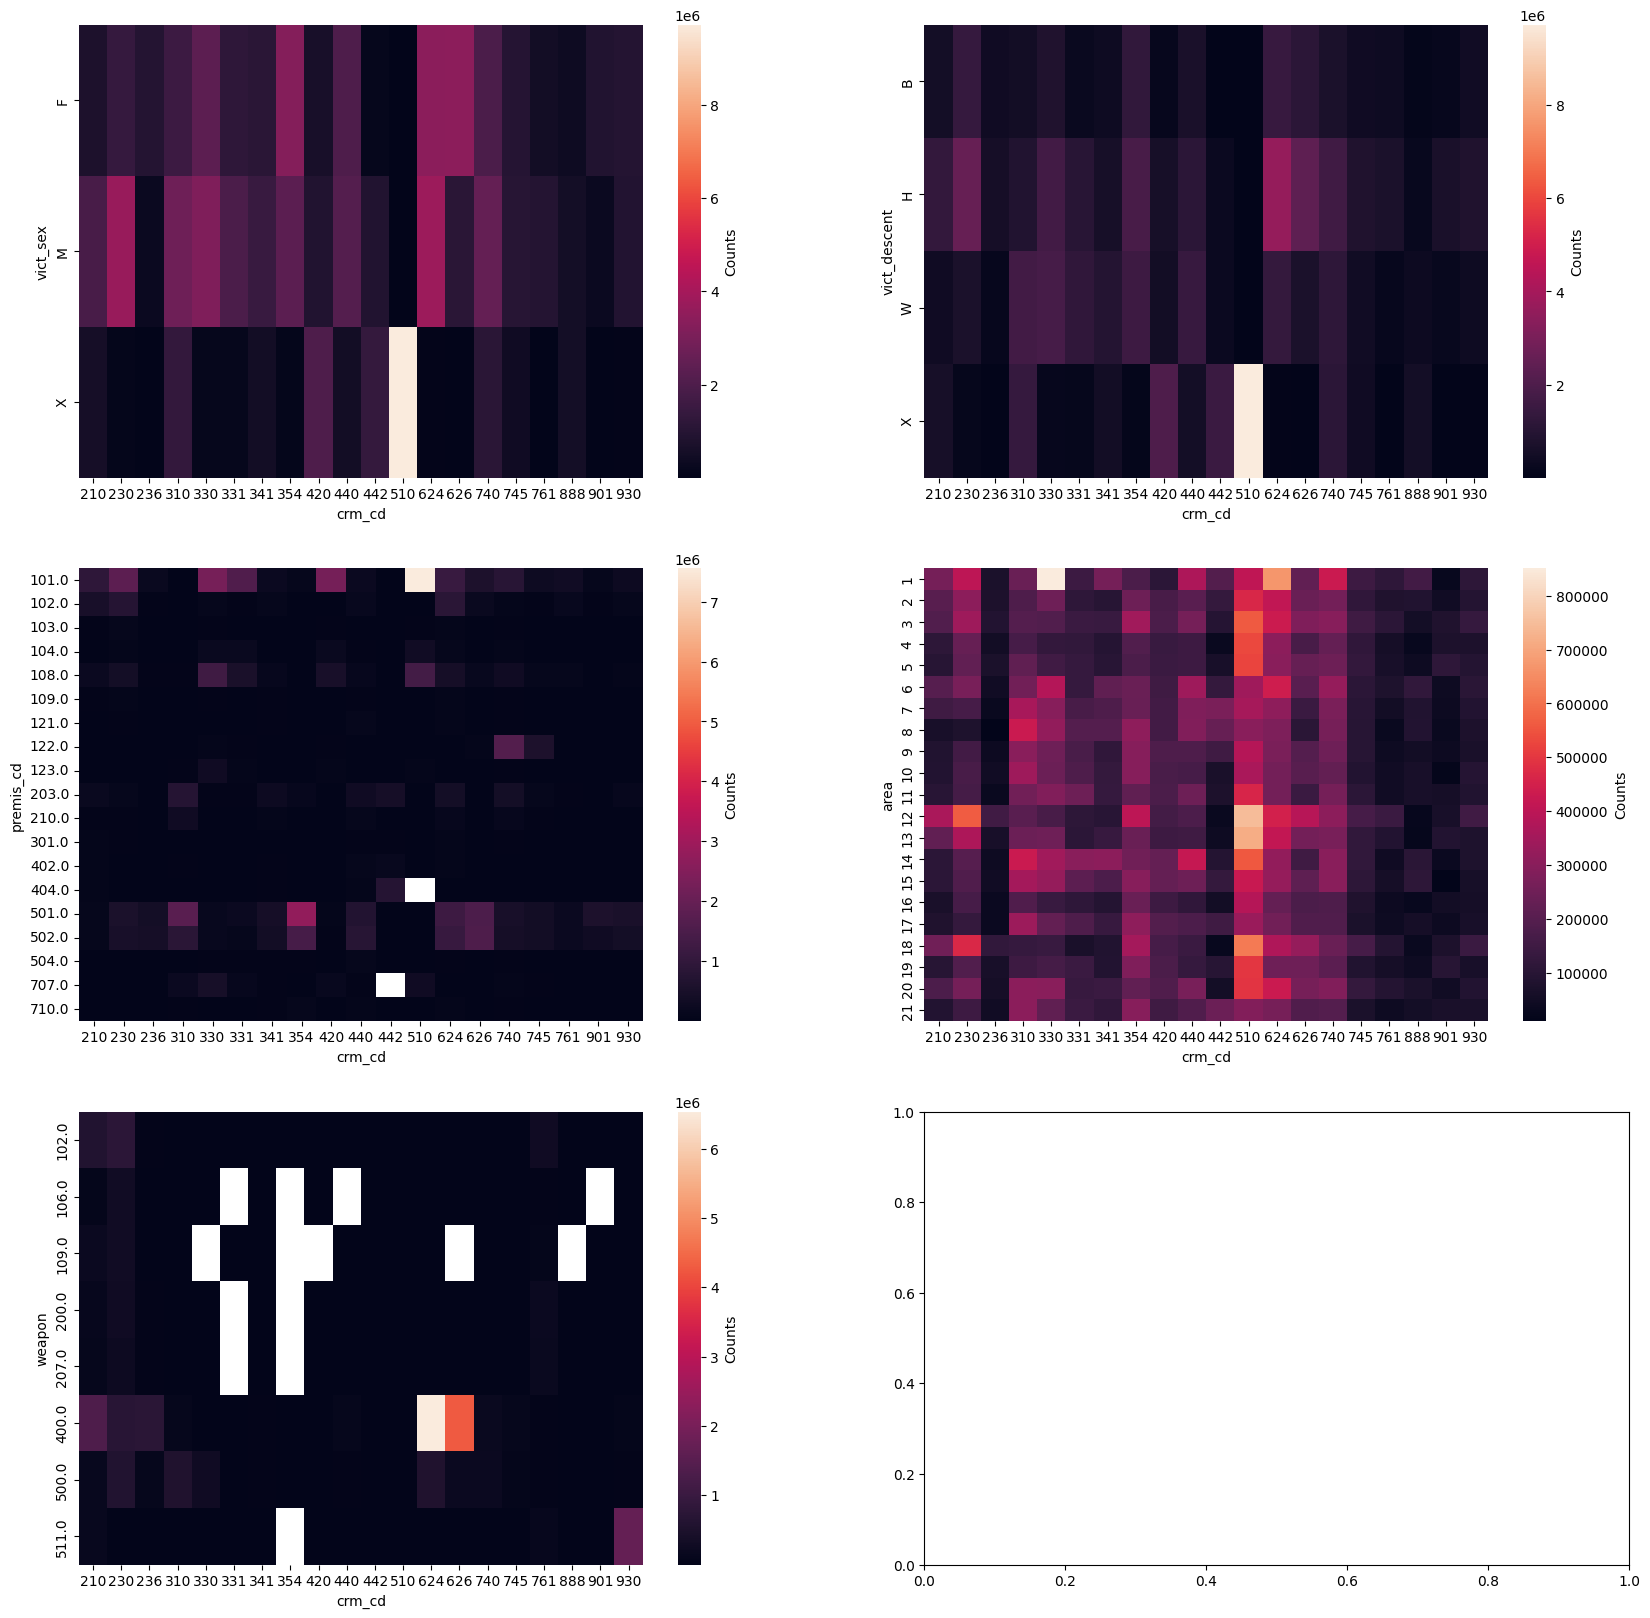

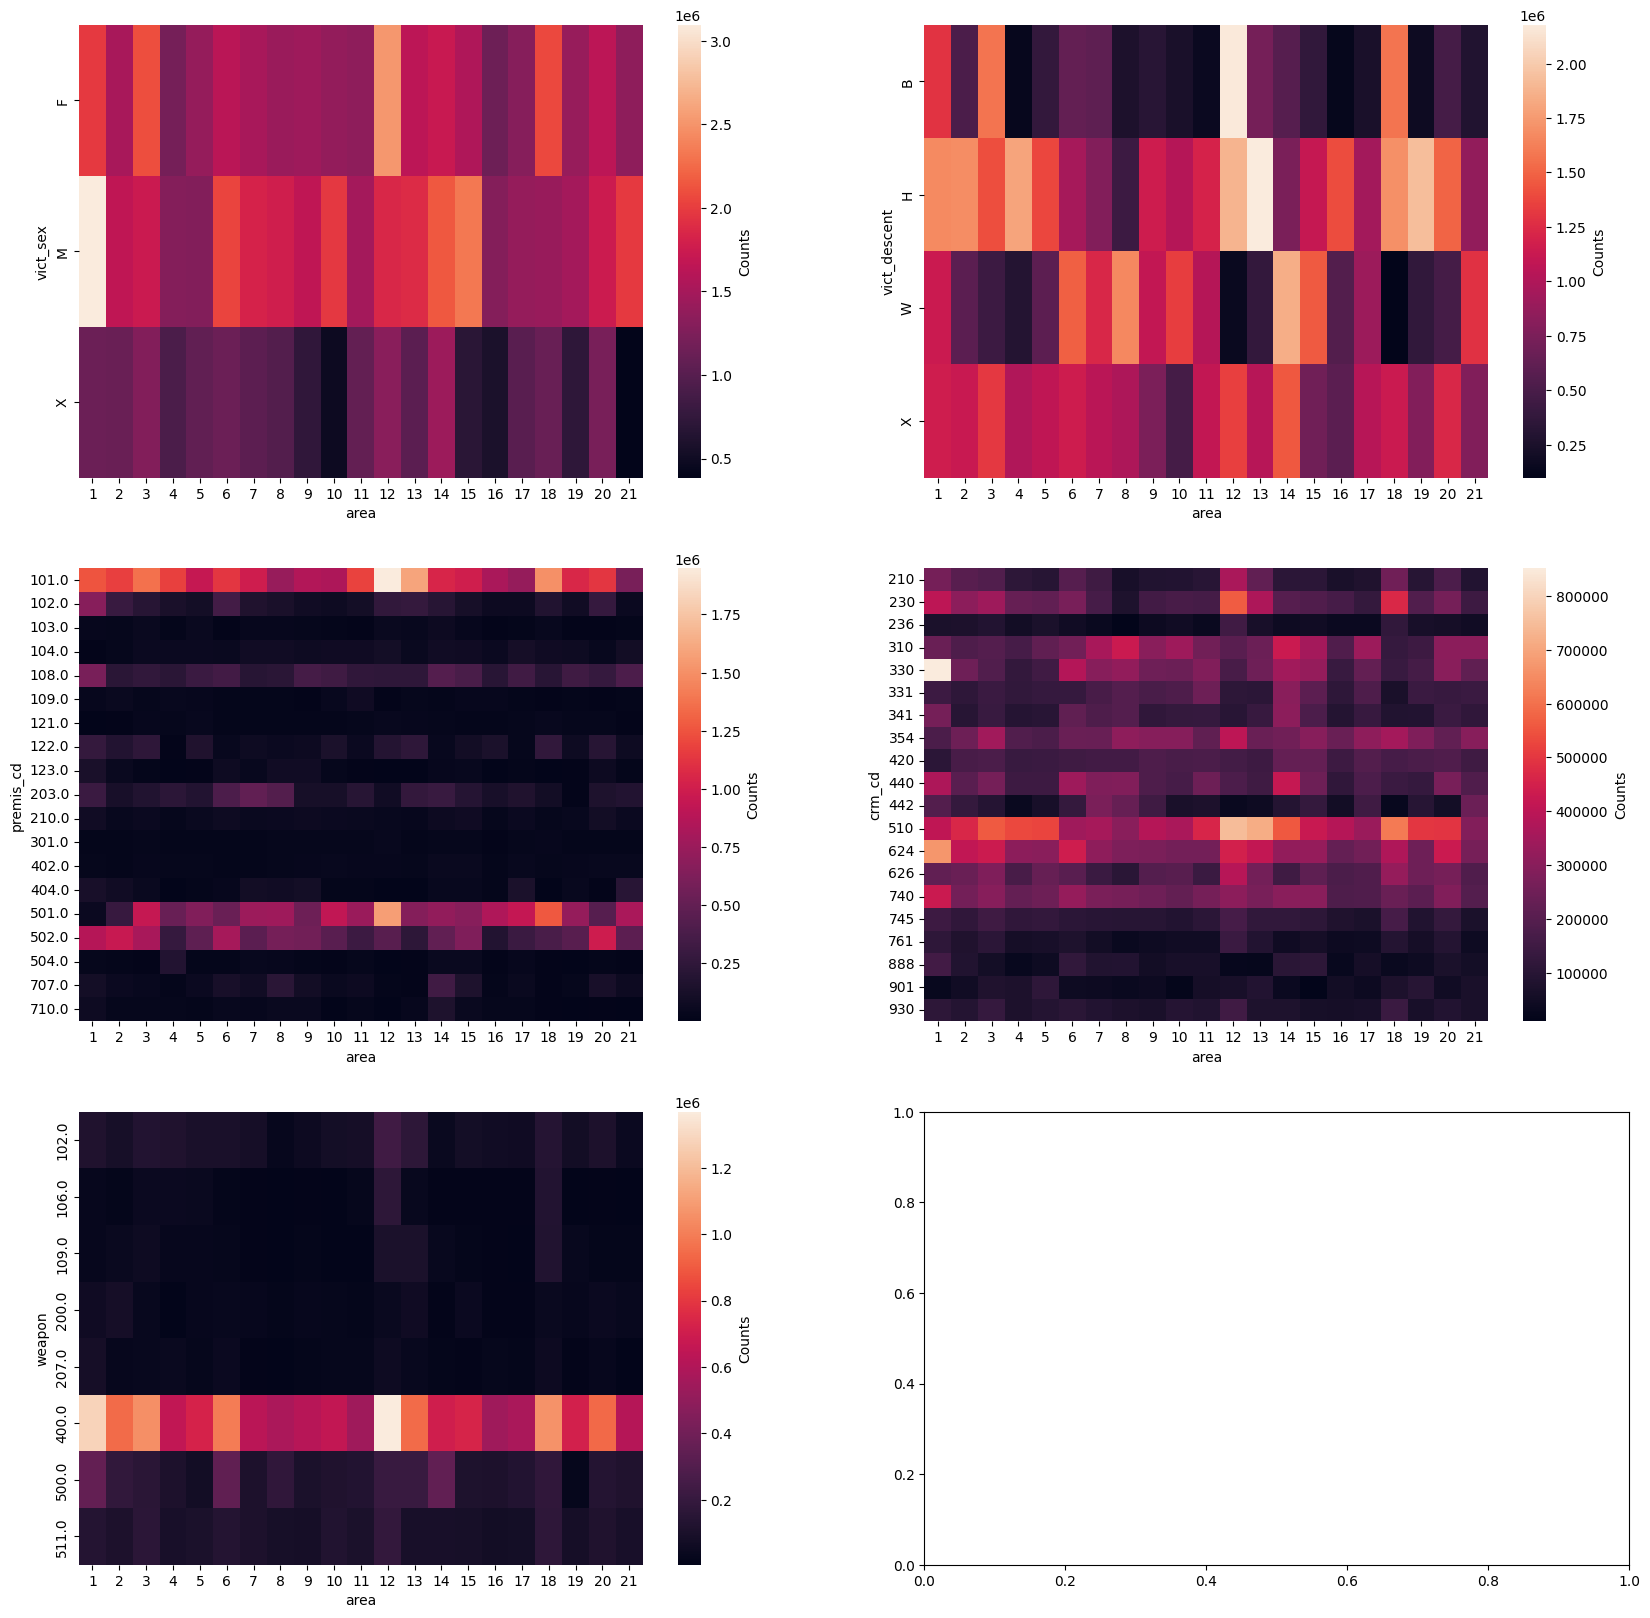

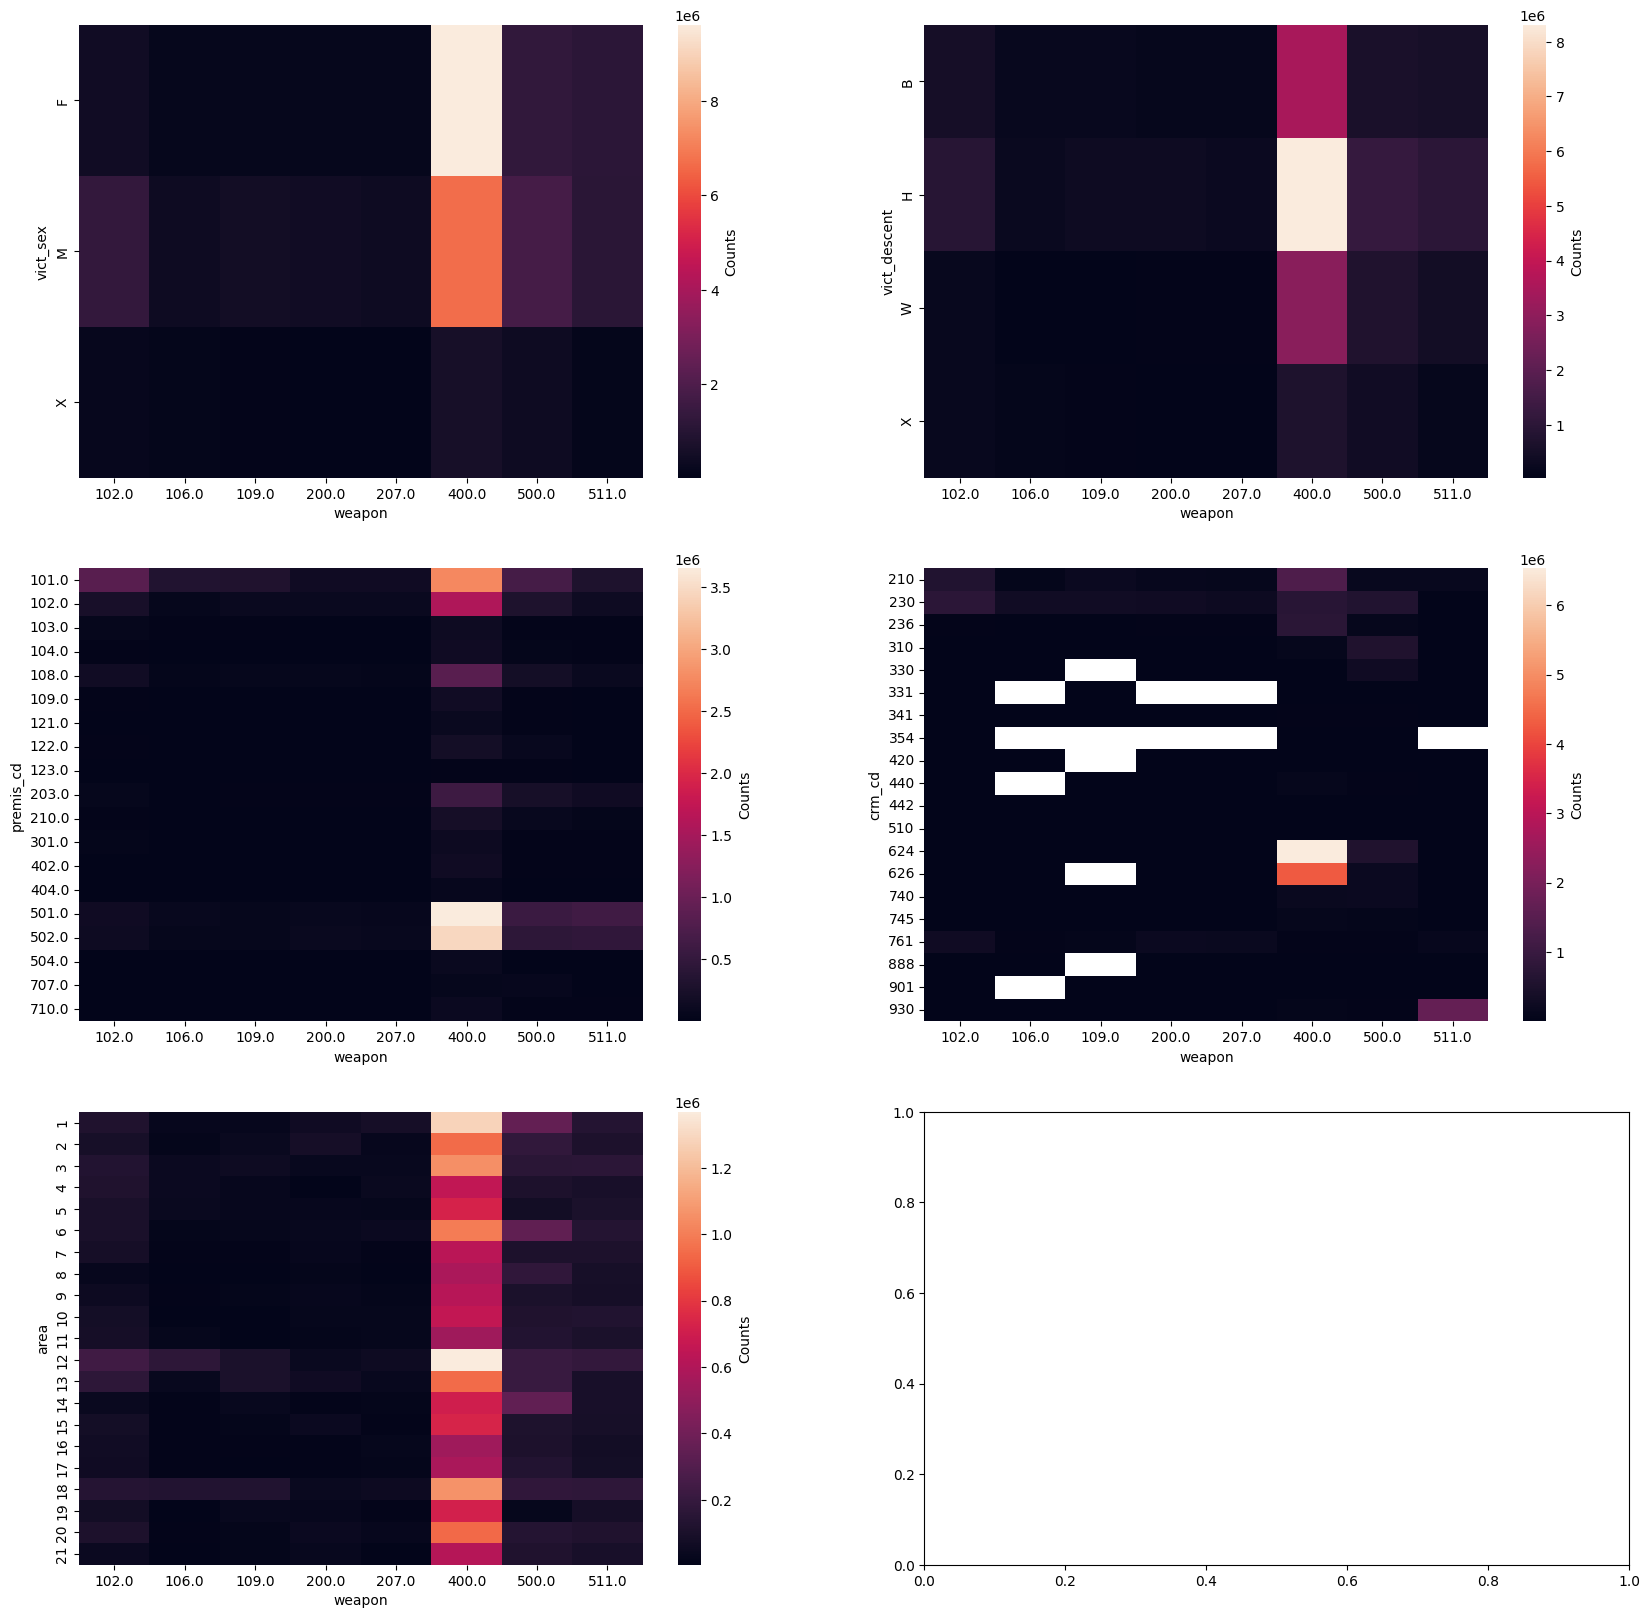

In [78]:
plotHeatmaps(data=df_complete[cat_cols], normalize=False, filterPercentage=85)

### Heatmap for each categorical feature vs other categorical features (Normalized)
Colorbar is the percentage of each combination for the feature in x-axis.

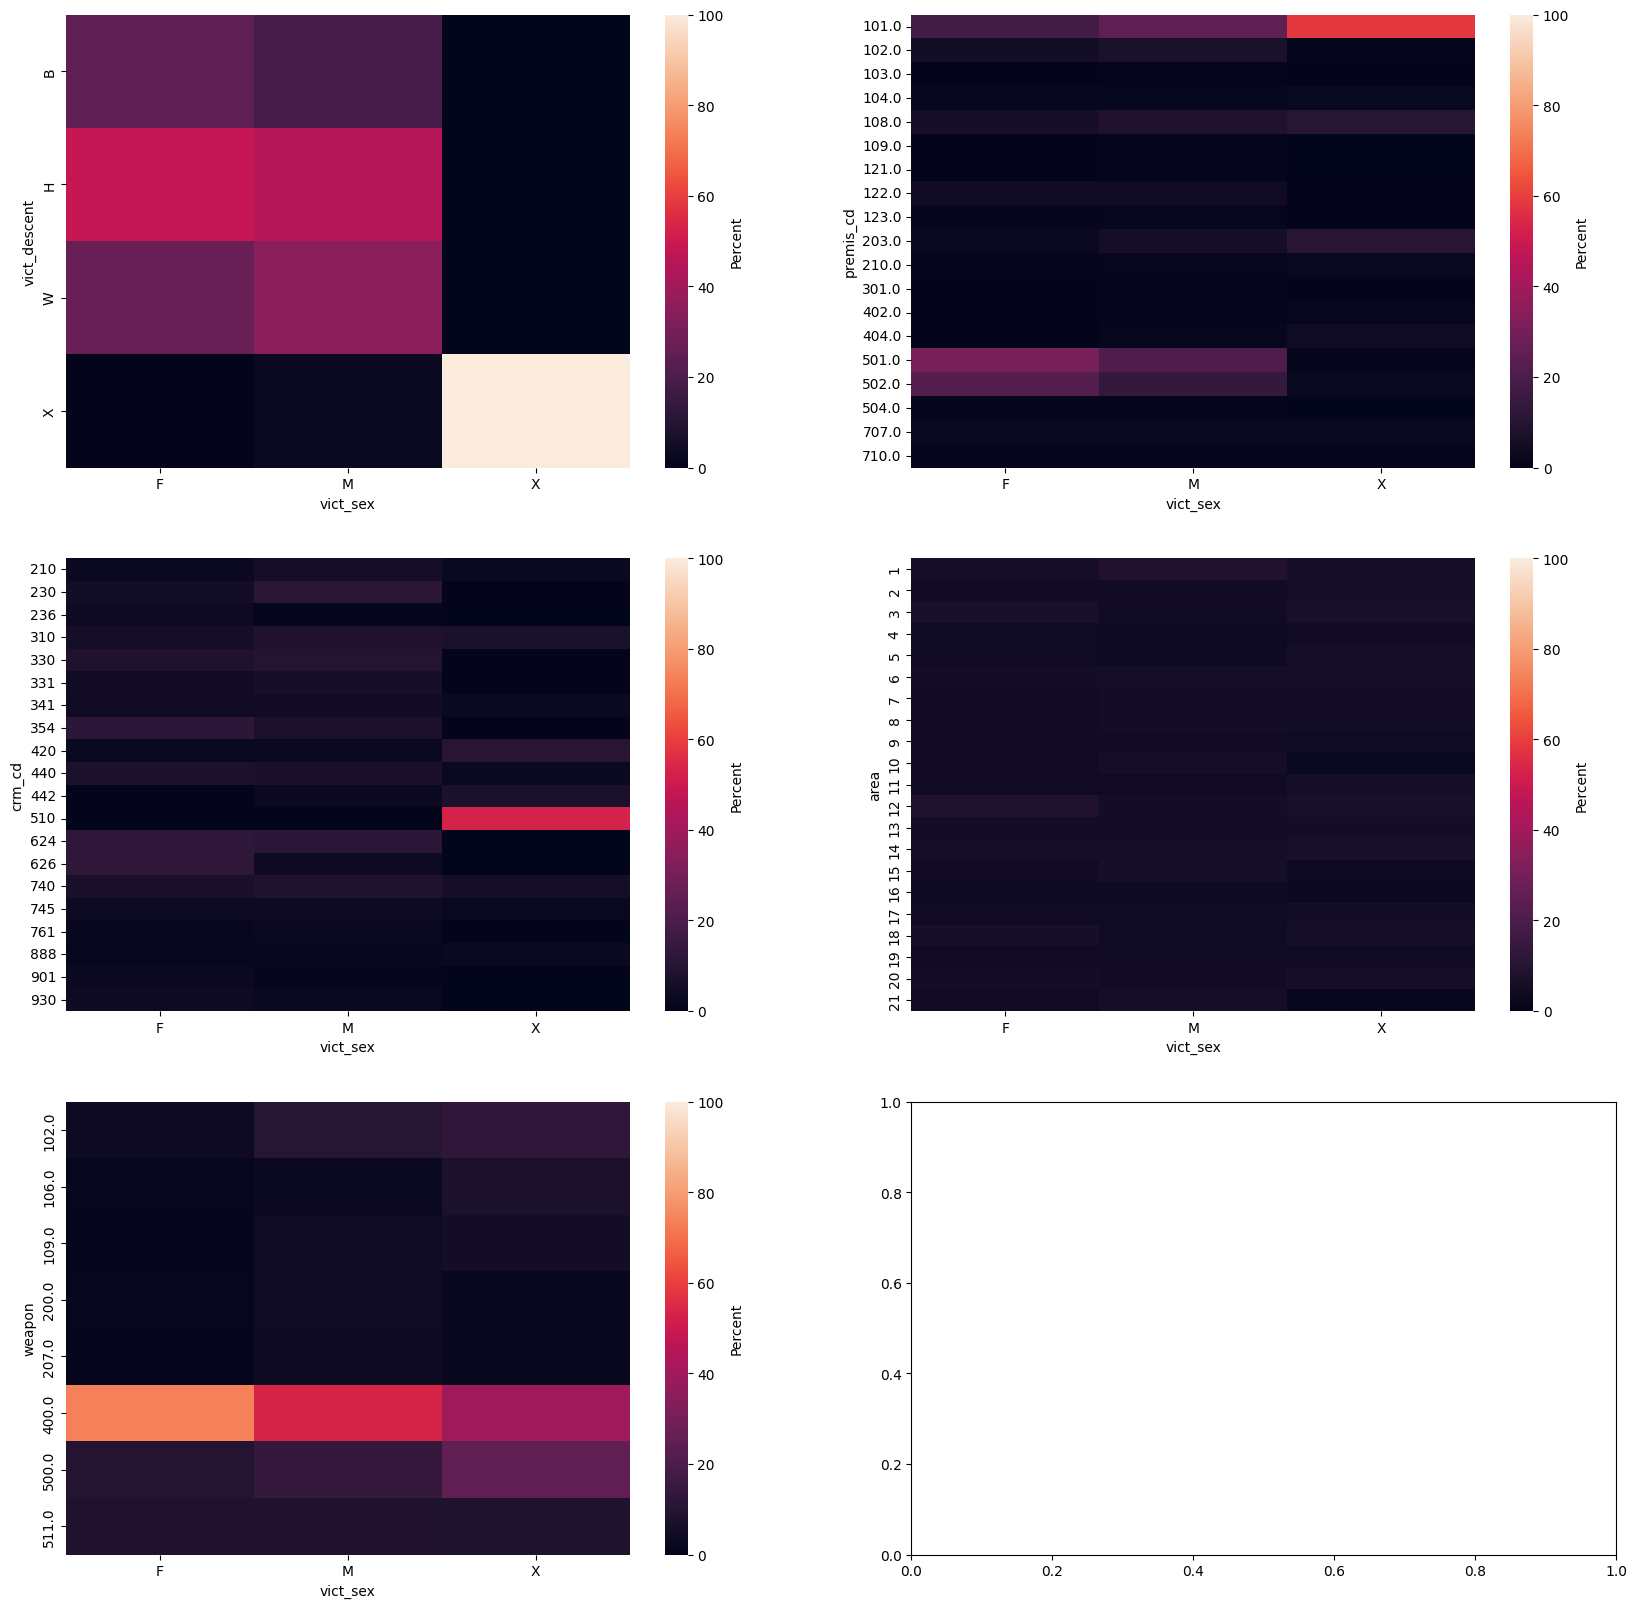

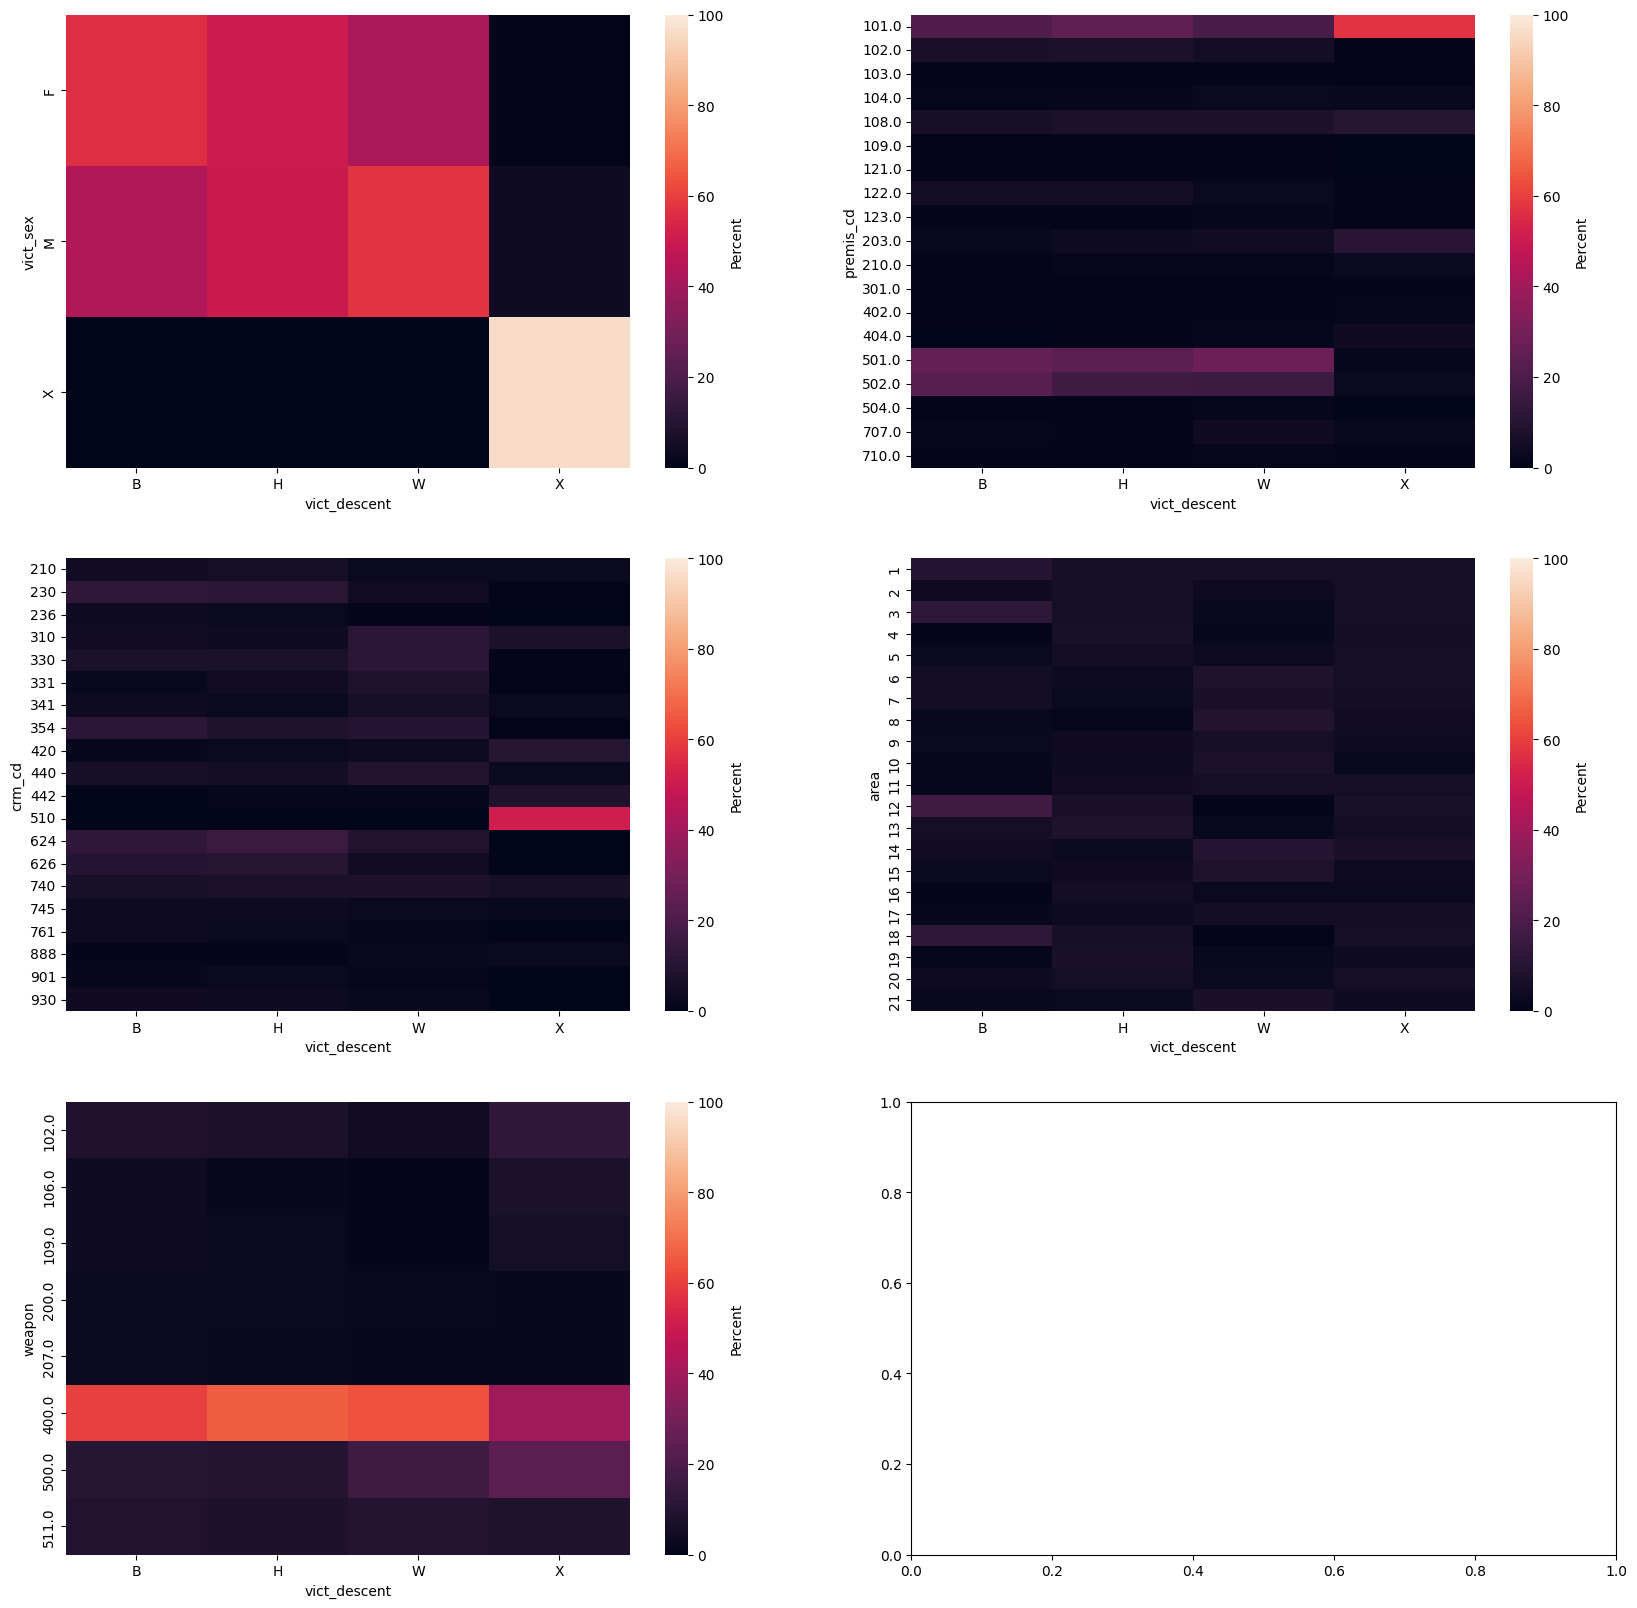

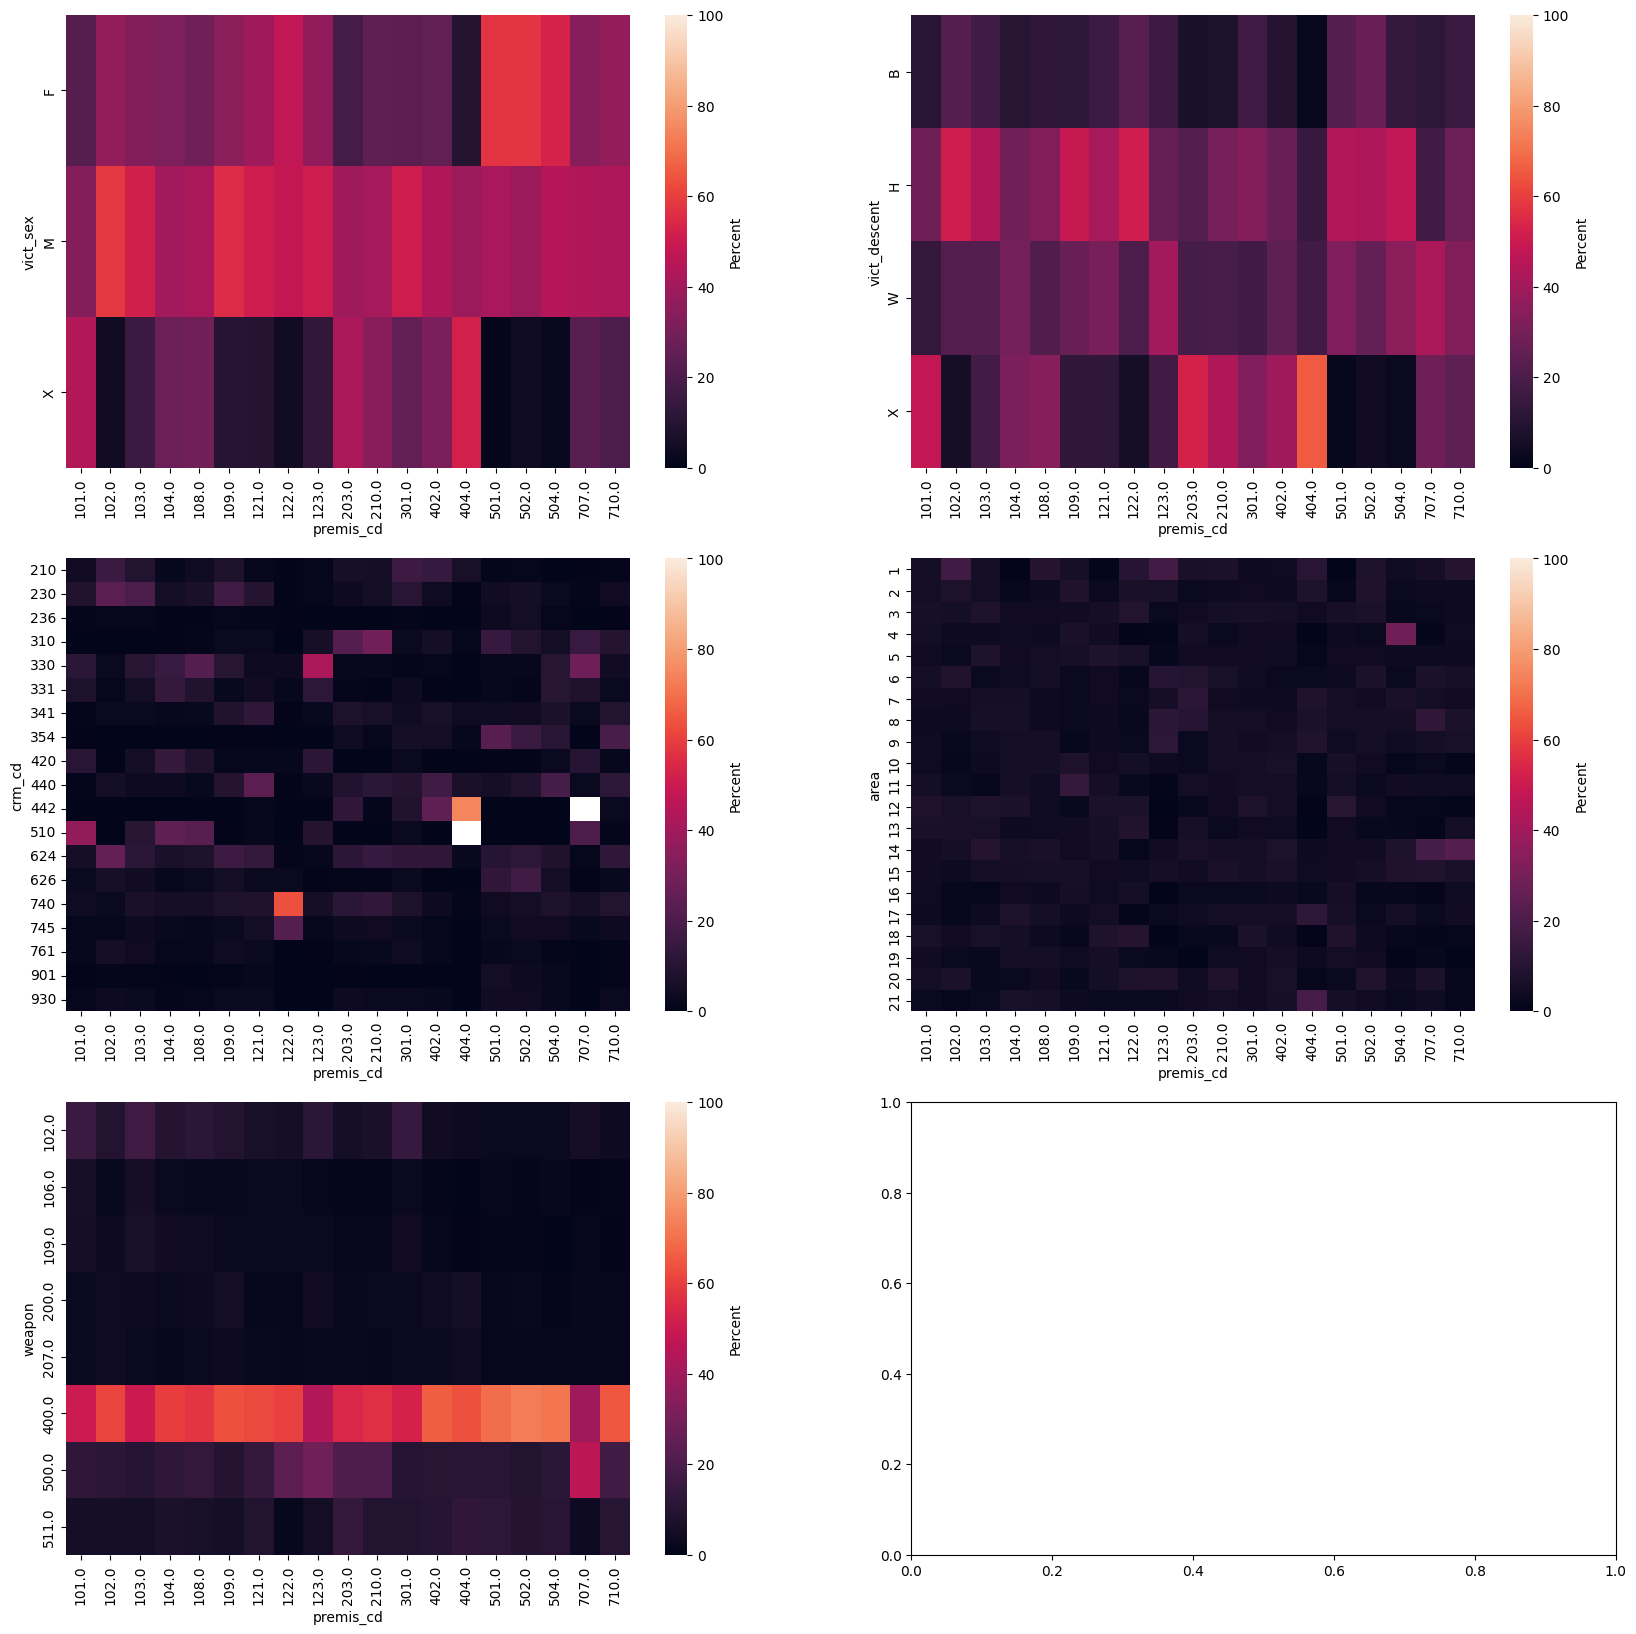

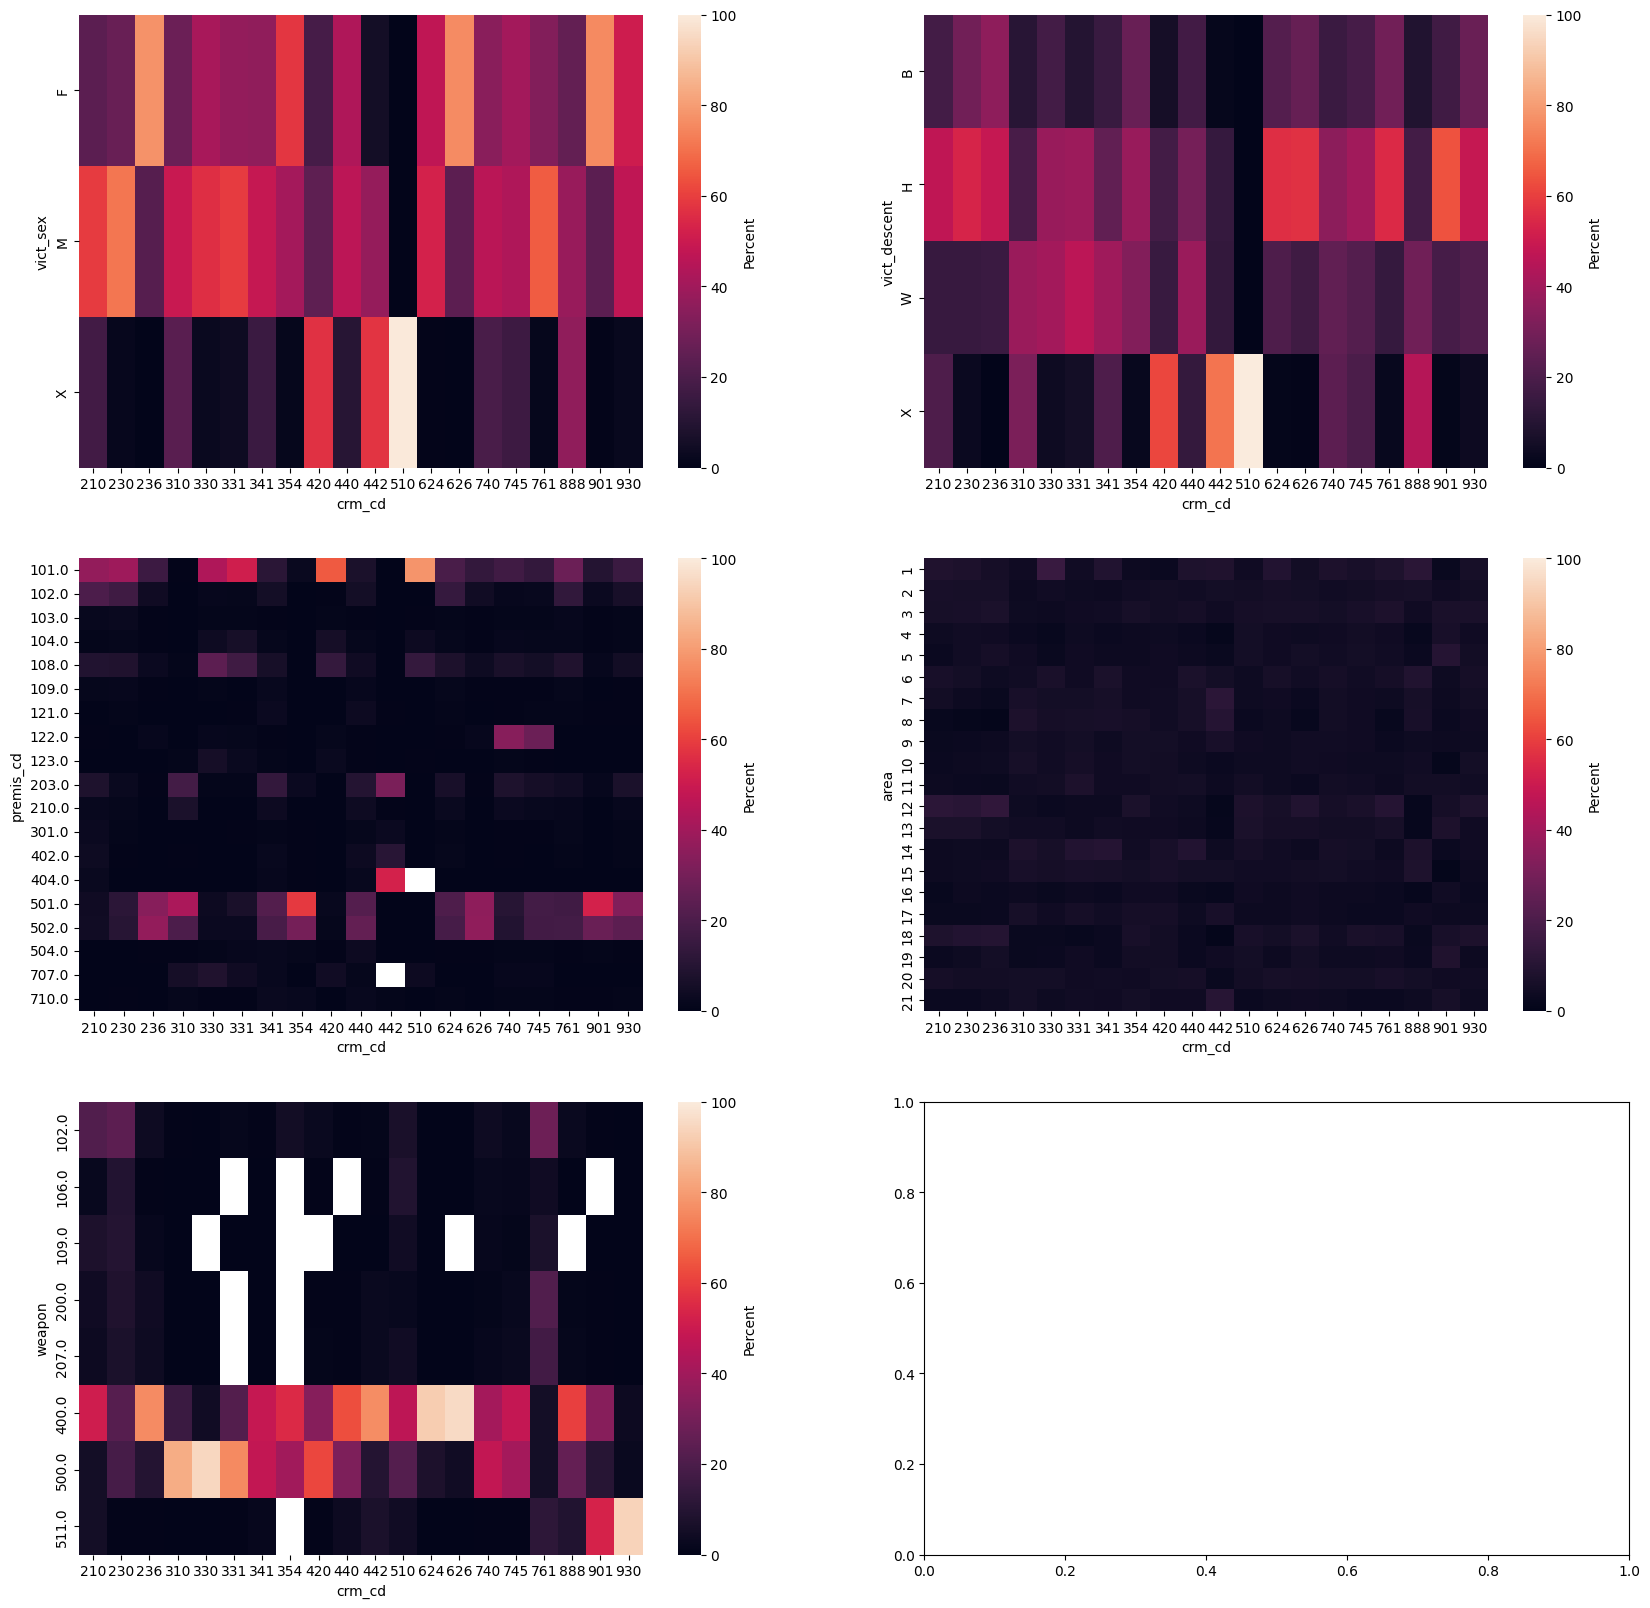

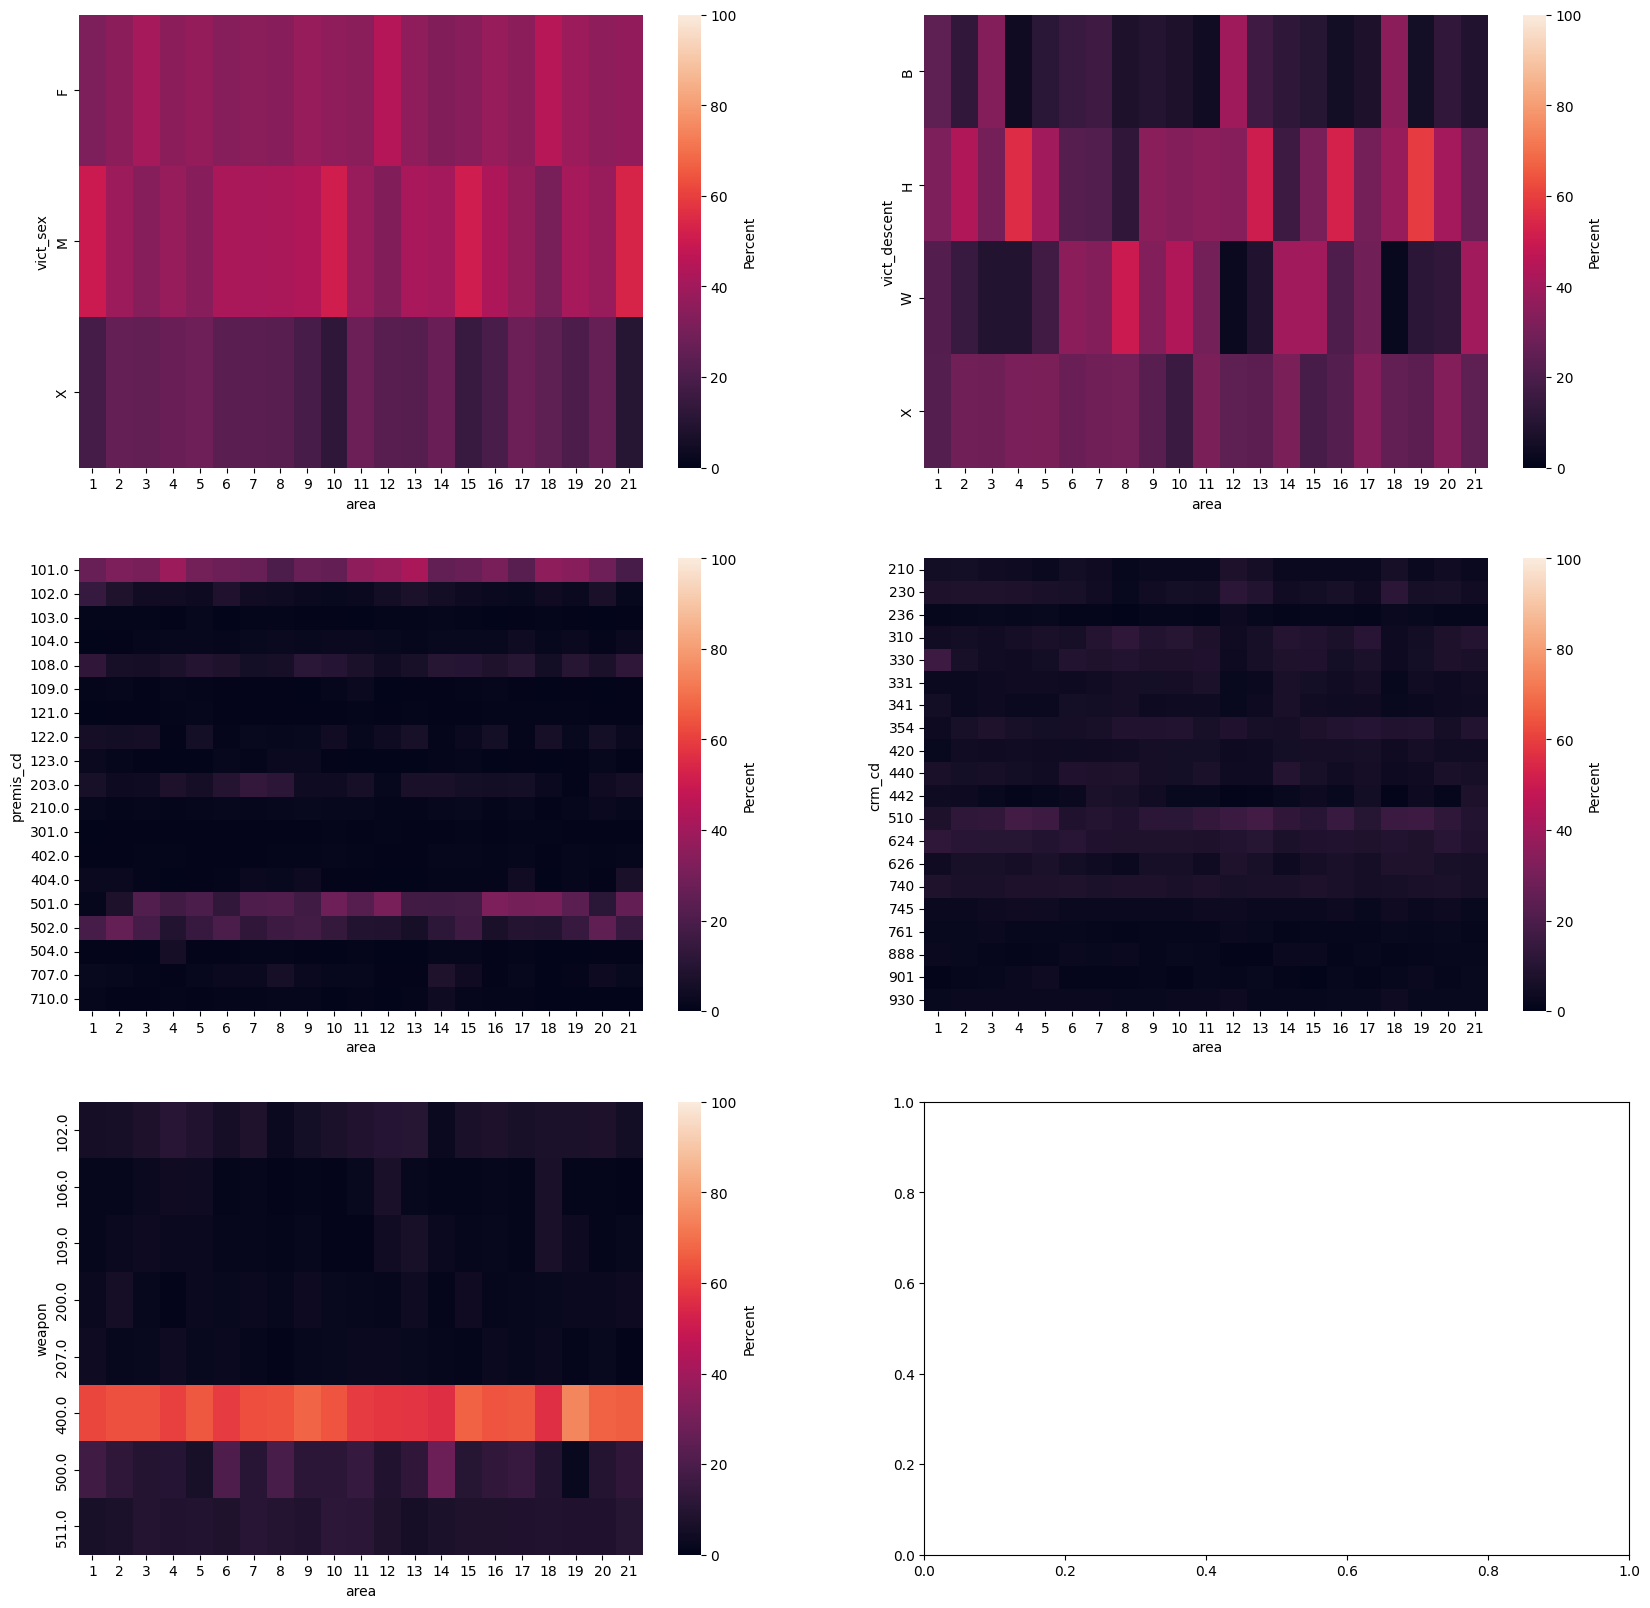

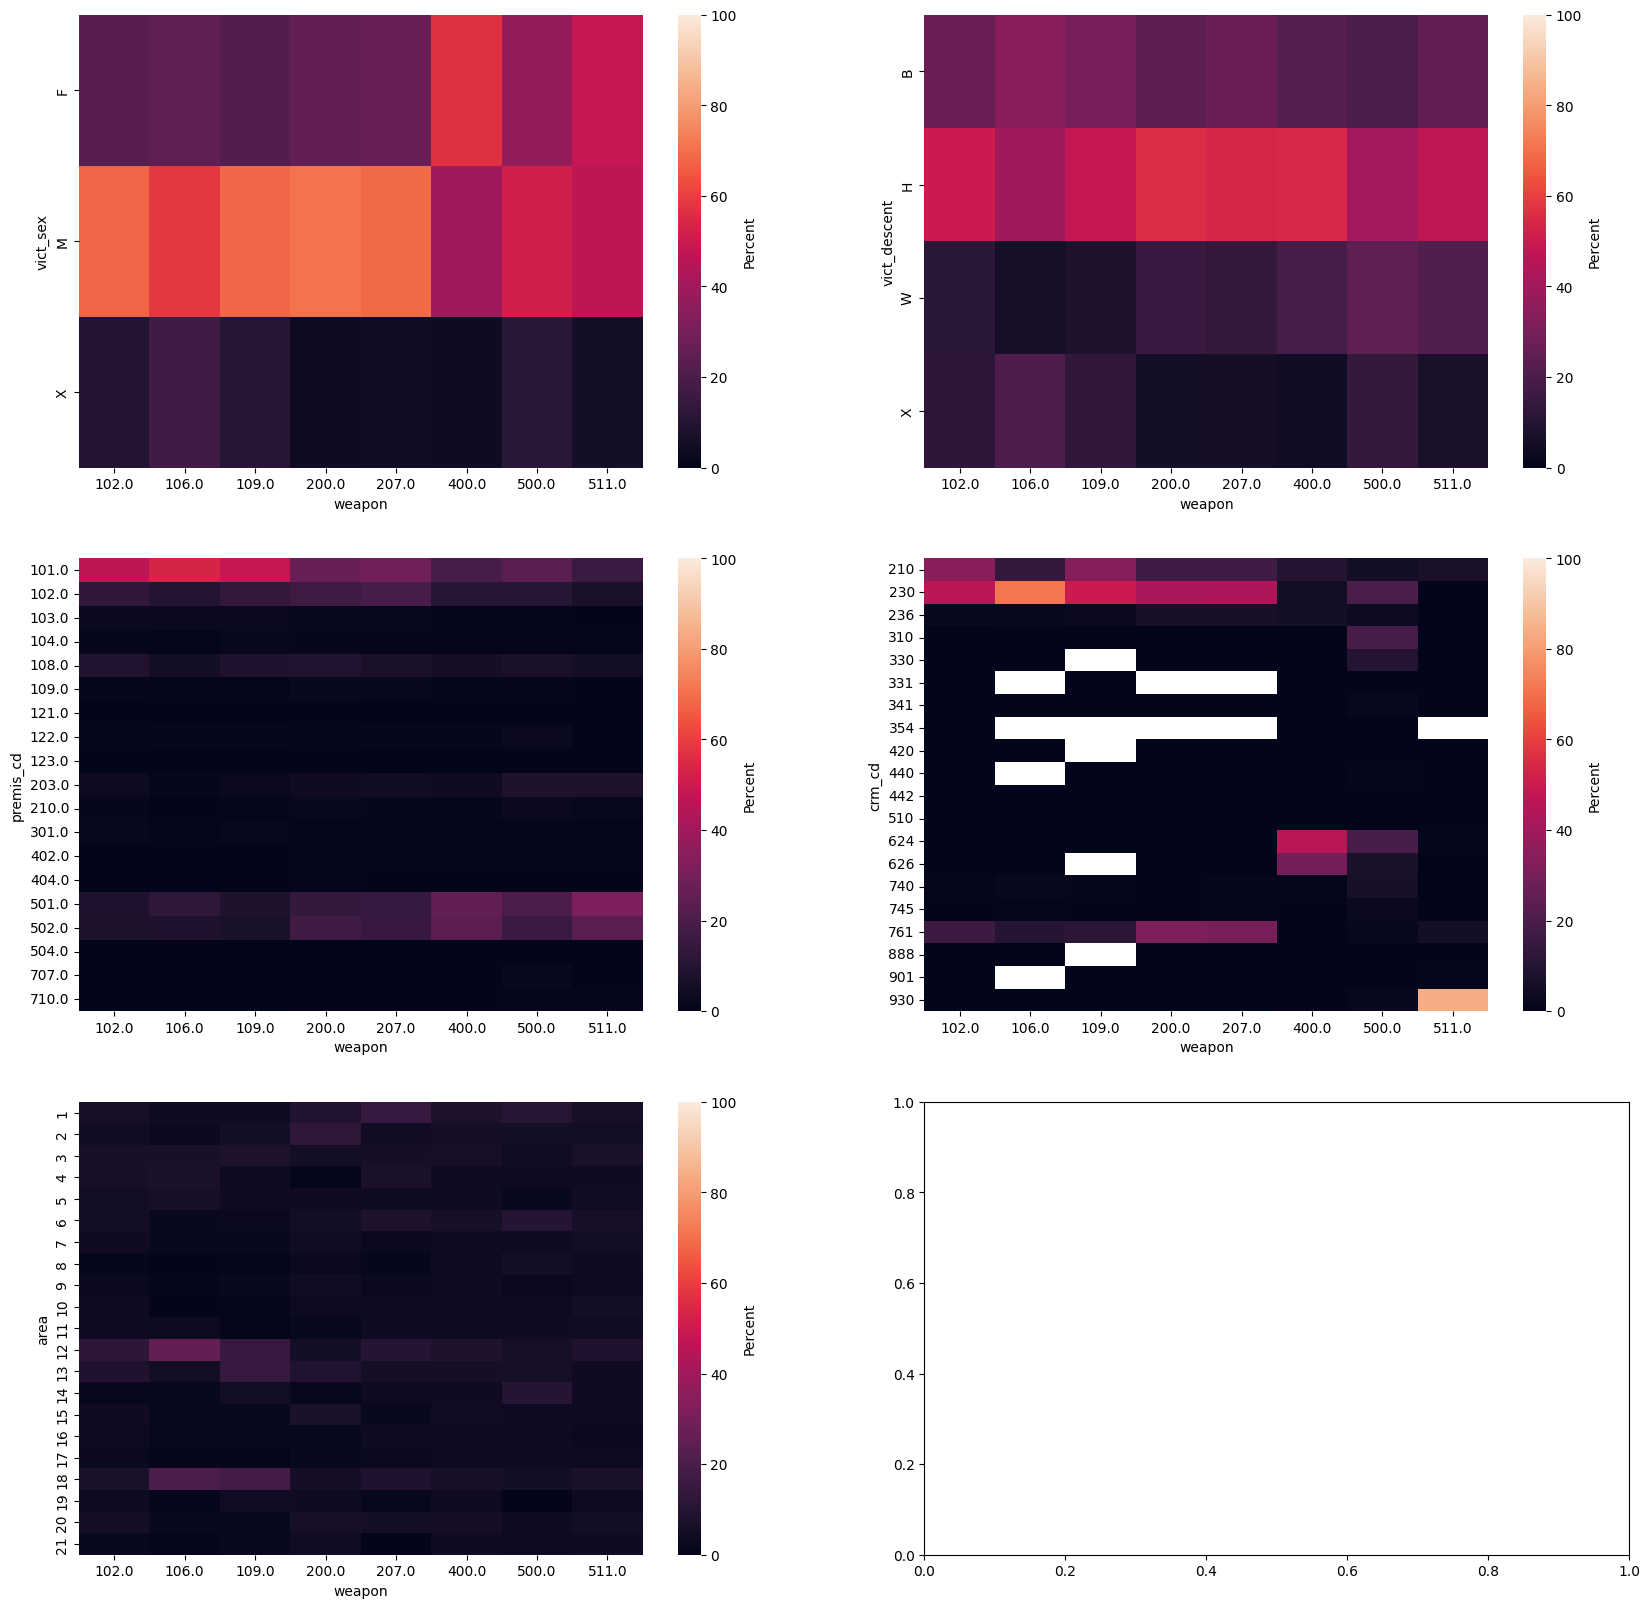

In [79]:
plotHeatmaps(data=df_complete[cat_cols], normalize=True, filterPercentage=85)

# Getting the meaning of codes in features

In [80]:
crm_codes = filterPercent(df, ['crm_cd'], 85)['crm_cd'].unique().tolist()
df_filtered = data.loc[data['Crm Cd'].isin(crm_codes), ['Crm Cd', 'Crm Cd Desc']]
crm_code_meaning = df_filtered.groupby('Crm Cd').first().reset_index()
crm_code_meaning.set_index('Crm Cd')

Crm Cd Desc
Crm Cd                                                   
210                                               ROBBERY
230        ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
236                 INTIMATE PARTNER - AGGRAVATED ASSAULT
310                                              BURGLARY
330                                 BURGLARY FROM VEHICLE
331     THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...
341     THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...
354                                     THEFT OF IDENTITY
420       THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)
440                    THEFT PLAIN - PETTY ($950 & UNDER)
442              SHOPLIFTING - PETTY THEFT ($950 & UNDER)
624                              BATTERY - SIMPLE ASSAULT
626                     INTIMATE PARTNER - SIMPLE ASSAULT
740     VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...
745              VANDALISM - MISDEAMEANOR ($399 OR UNDER)
761                                       BRANDISH WEAPON
888                                           TRESPASSING
901                        VIOLATION OF RESTRAINING ORDER
930                CRIMINAL THREATS - NO WEAPON DISPLAYED

In [81]:
premis_codes = filterPercent(df, ['premis_cd'], 85)['premis_cd'].unique().tolist()
df_filtered = data.loc[data['Premis Cd'].isin(premis_codes), ['Premis Cd', 'Premis Desc']]
premis_code_meaning = df_filtered.groupby('Premis Cd').first().reset_index()
premis_code_meaning.set_index('Premis Cd')

Premis Desc
Premis Cd                                              
101.0                                            STREET
102.0                                          SIDEWALK
103.0                                             ALLEY
104.0                                          DRIVEWAY
108.0                                       PARKING LOT
109.0                                   PARK/PLAYGROUND
121.0                       YARD (RESIDENTIAL/BUSINESS)
122.0                          VEHICLE, PASSENGER/TRUCK
123.0                      PARKING UNDERGROUND/BUILDING
203.0                                    OTHER BUSINESS
210.0                              RESTAURANT/FAST FOOD
404.0                                  DEPARTMENT STORE
501.0                            SINGLE FAMILY DWELLING
502.0      MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)
503.0                                             HOTEL
504.0                                   OTHER RESIDENCE
707.0                                    GARAGE/CARPORT
710.0                                     OTHER PREMISE

In [82]:
crm_codes = filterPercent(df, ['area'], 85)['area'].unique().tolist()
df_filtered = data.loc[data['AREA'].isin(crm_codes), ['AREA', 'AREA NAME']]
crm_code_meaning = df_filtered.groupby('AREA').first().reset_index()
crm_code_meaning.set_index('AREA')

AREA NAME
AREA             
1         Central
2         Rampart
3       Southwest
6       Hollywood
7        Wilshire
8         West LA
9        Van Nuys
10    West Valley
11      Northeast
12    77th Street
13         Newton
14        Pacific
15    N Hollywood
18      Southeast
19        Mission
20        Olympic
21        Topanga

In [83]:
weapon_codes = filterPercent(df, ['weapon'], 85)['weapon'].unique().tolist()
df_filtered = data.loc[data['Weapon Used Cd'].isin(weapon_codes), ['Weapon Used Cd', 'Weapon Desc']]
crm_code_meaning = df_filtered.groupby('Weapon Used Cd').first().reset_index()
crm_code_meaning.set_index('Weapon Used Cd')

Weapon Desc
Weapon Used Cd                                                
102.0                                                 HAND GUN
106.0                                          UNKNOWN FIREARM
109.0                                    SEMI-AUTOMATIC PISTOL
200.0                         KNIFE WITH BLADE 6INCHES OR LESS
207.0                                              OTHER KNIFE
400.0           STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
500.0                              UNKNOWN WEAPON/OTHER WEAPON
511.0                                            VERBAL THREAT

# pip install dython

from dython.nominal import theils_u

def catHeatmap(data):
    # data = data.copy()
    tmp = pd.DataFrame(columns=data.columns)

    for col1 in data.columns:
        for col2 in data.columns:
            theils_u_value = theils_u(x=data[col1], y=data[col2])
            tmp.loc[col1, col2] = theils_u_value
            
    tmp = tmp.apply(pd.to_numeric, errors='coerce')
    return tmp
                
# corr = catHeatmap(df[cat_cols])

sns.heatmap(corr)

sample_data = {
    'Column1': range(1, 11),  # Sample data for Column1
    'Column2': range(11, 21),  # Sample data for Column2
    'Column3': range(21, 31)  # Sample data for Column3
}
# sample_df = pd.DataFrame(sample_data, index=[0,9,8,7,6,5,4,3,2,1])
sample_df = pd.DataFrame(sample_data)
sample_df.index = [0,9,8,7,6,5,4,3,2,1]
sample_df